In [ ]:
# !pip uninstall openpyxl

In [1]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd 'drive/MyDrive/Colab Notebooks/marcadores/datos_pacientes'

/content/drive/.shortcut-targets-by-id/11ZhnYQGr6WztlltbOW-Gk33JjXen4pOu/marcadores/datos_pacientes


In [1]:
import numpy as np
import math
import operator
import pandas as pd
import os
import time
from datetime import datetime
from time import mktime

import matplotlib
import matplotlib.pyplot as plt

from matplotlib import style
# style.use('dark_background')


C:\Users\juanm\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
path_HCR = 'Data/datos_HRC'
print(path_HCR)
for archivo in os.listdir(path_HCR):
    if os.path.isfile(os.path.join(path_HCR, archivo)):
        print(archivo)

Data/datos_HRC
2023.09.06 Historia clínica pacientes HRyC.xlsx
2024.10.09 Historia clínica pacientes HRyC.xlsx
Código paciente HRC.xlsx
Historia clínica pacientes HRC.xlsx
HRC0001-22 limites.xls
HRC0001-22.xls
paciente_HRCP0001_BD.xlsx
paciente_HRCP0002_BD.xlsx
paciente_HRCP0003_BD.xlsx
paciente_HRCP0004_BD.xlsx
paciente_HRCP0005_BD.xlsx
paciente_HRCP0006_BD.xlsx
paciente_HRCP0007_BD.xlsx
paciente_HRCP0008_BD.xlsx
paciente_HRCP0009_BD.xlsx
paciente_HRCP0010_BD.xlsx
paciente_HRCP0011_BD.xlsx
paciente_HRCP0012_BD.xlsx
paciente_HRCP0013_BD.xlsx
paciente_HRCP0014_BD.xlsx
paciente_HRCP0015_BD.xlsx
paciente_HRCP0016_BD.xlsx


In [3]:
path_FJD = 'Data/datos_FJD/'
archivo = 'Historia clínica pacientes FJD.xlsx'
filename=(os.path.join(path_FJD, archivo))

df_FJD = pd.read_excel(filename, header=51)
dfpac_FJD= pd.read_excel(path_FJD + 'Código paciente FJD.xlsx')
# dfrecai1 = pd.read_excel('Recaidas_FJD.xlsx')

In [4]:
path_HRC = 'Data/datos_HRC/'
archivo = 'Historia clínica pacientes HRC.xlsx'
filename=(os.path.join(path_HRC, archivo))

df_HRC = pd.read_excel(filename, header=51)
dfpac_HRC= pd.read_excel(path_HRC + 'Código paciente HRC.xlsx')
# dfrecai2 = pd.read_excel('Data/Recaidas_HRC.xlsx')

In [5]:
path_HCR = 'Data/datos_HCR/'
archivo = 'Historia clínica pacientes HCR.xlsx'
filename=(os.path.join(path_HCR, archivo))

df_HCR = pd.read_excel(filename, header=51)
dfpac_HCR= pd.read_excel(path_HCR + 'Código paciente HCR.xlsx')
# dfrecai2 = pd.read_excel('Data/Recaidas_HRC.xlsx')

In [6]:
path_CSD = 'Data/datos_CSD/'
archivo = 'Historia clínica pacientes CSD.xlsx'
filename=(os.path.join(path_CSD, archivo))

df_CSD = pd.read_excel(filename, header=51)
dfpac_CSD= pd.read_excel(path_CSD + 'Código paciente CSD.xlsx')
# dfrecai2 = pd.read_excel('Data/Recaidas_HRC.xlsx')

In [7]:
path_HUT = 'Data/datos_HUT/'
archivo = 'Historia clínica pacientes HUT.xlsx'
filename=(os.path.join(path_HUT, archivo))

df_HUT = pd.read_excel(filename, header=51)
dfpac_HUT= pd.read_excel(path_HUT + 'Código paciente HUT.xlsx')
# dfrecai2 = pd.read_excel('Data/Recaidas_HRC.xlsx')

In [8]:
if 'CODIGO MUESTRA' in df_FJD.columns:
    df_FJD.set_index('CODIGO MUESTRA', inplace=True)

if 'CODIGO MUESTRA' in df_HRC.columns:
    df_HRC.set_index('CODIGO MUESTRA', inplace=True)

if 'CODIGO MUESTRA' in df_HCR.columns:
    df_HCR.set_index('CODIGO MUESTRA', inplace=True)

if 'CODIGO MUESTRA' in df_CSD.columns:
    df_CSD.set_index('CODIGO MUESTRA', inplace=True)

if 'CODIGO MUESTRA' in df_HUT.columns:
    df_HUT.set_index('CODIGO MUESTRA', inplace=True)

In [9]:
print((df_FJD.index.values))
# index_nan = dfhist2[ (dfhist2['CODIGO PACIENTE'] >= np.nan) ].index
df_FJD2 = df_FJD.dropna(subset=['CODIGO PACIENTE'])
print((df_FJD2.index.values))

print((df_HRC.index.values))
# index_nan = dfhist2[ (dfhist2['CODIGO PACIENTE'] >= np.nan) ].index
df_HRC2 = df_HRC.dropna(subset=['CODIGO PACIENTE'])
print((df_HRC2.index.values))

print((df_HCR.index.values))
# index_nan = dfhist2[ (dfhist2['CODIGO PACIENTE'] >= np.nan) ].index
df_HCR2 = df_HCR.dropna(subset=['CODIGO PACIENTE'])
print((df_HCR2.index.values))

### Si aparece el índice "CODIGO MUESTRA" se elimina
df_HCR2 = df_HCR2.drop(df_HCR2[df_HCR2.index=='CODIGO MUESTRA'].index)
df_HCR2.index.values

print((df_CSD.index.values))
# index_nan = dfhist2[ (dfhist2['CODIGO PACIENTE'] >= np.nan) ].index
df_CSD2 = df_CSD.dropna(subset=['CODIGO PACIENTE'])
print((df_CSD2.index.values))

print((df_HUT.index.values))
# index_nan = dfhist2[ (dfhist2['CODIGO PACIENTE'] >= np.nan) ].index
df_HUT2 = df_HUT.dropna(subset=['CODIGO PACIENTE'])
print((df_HUT2.index.values))

['HJD0001' 'HJD0002' 'HJD0003' 'HJD0004' 'HJD0005' 'HJD0006' 'HJD0007'
 'HJD0008' 'HJD0009' 'HJD0010' 'HJD0011' 'HJD0012' 'HJD0013' 'HJD0014'
 'HJD0015' 'HJD0016' 'HJD0017' 'HJD0018' 'HJD0019' 'HJD0020' 'HJD0021'
 'HJD0022' 'HJD0023' 'HJD0024' 'HJD0025' 'HJD0026' 'HJD0027' 'HJD0028'
 'HJD0029' 'HJD0030' 'HJD0031' 'HJD0032' 'HJD0033' 'HJD0034' 'HJD0035'
 'HJD0036' 'HJD0037' 'HJD0038' 'HJD0039' 'HJD0040' 'HJD0041' 'HJD0042'
 'HJD0043' 'HJD0044' 'HJD0045' 'HJD0046' 'HJD0047' 'HJD0048' 'HJD0049'
 'HJD0050' 'HJD0051' 'HJD0052' 'HJD0053' 'HJD0054' 'HJD0055' 'HJD0056'
 'HJD0057' 'HJD0058' 'HJD0059' 'HJD0060' 'HJD0061' 'HJD0062' 'HJD0063'
 'HJD0064' 'HJD0065' 'HJD0066' 'HJD0067' 'HJD0068' 'HJD0073' 'HJD0074'
 'HJD0075' 'HJD0076' 'HJD0077' 'HJD0078' 'HJD0079' 'HJD0080' 'HJD0081'
 'HJD0082' 'HJD0083' 'HJD0084' 'HJD0085' 'HJD0086' 'HJD0093' 'HJD0094'
 'HJD0095' 'HJD0096' 'HJD0101' nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan


In [10]:
dfhist = pd.concat([df_FJD2, df_HRC2, df_HCR2, df_CSD2, df_HUT2], axis=0, ignore_index=False)
dfpac = pd.concat([dfpac_FJD, dfpac_HRC, dfpac_HCR, dfpac_CSD, dfpac_HUT], axis=0, ignore_index=False)

In [11]:
pacien_list0=dfpac['CODIGO PACIENTE']
pacien_list = []
for p in pacien_list0:
    if (p not in pacien_list) and (p!='HJDP9999'):
        pacien_list.append(p)
print(pacien_list)
print(len(pacien_list))

['HJDP0001', 'HJDP0002', 'HJDP0003', 'HJDP0004', 'HJDP0005', 'HJDP0006', 'HJDP0007', 'HJDP0008', 'HJDP0009', 'HJDP0010', 'HJDP0011', 'HJDP0012', 'HJDP0013', 'HJDP0014', 'HJDP0015', 'HJDP0016', 'HJDP0017', 'HJDP0018', 'HJDP0019', 'HJDP0020', 'HJDP0021', 'HJDP0022', 'HJDP0023', 'HJDP0024', 'HJDP0025', 'HJDP0026', 'HJDP0027', 'HJDP0028', 'HJDP0029', 'HJDP0030', 'HJDP0031', 'HRCP0001', 'HRCP0002', 'HRCP0003', 'HRCP0004', 'HRCP0005', 'HRCP0006', 'HRCP0007', 'HRCP0008', 'HRCP0009', 'HRCP0010', 'HRCP0011', 'HRCP0012', 'HRCP0013', 'HRCP0014', 'HCRP0001', 'HCRP0002', 'HCRP0003', 'HCRP0004', 'HCRP0005', 'HCRP0006', 'HCRP0007', 'HCRP0008', 'HCRP0009', 'HCRP0010', 'HCRP0011', 'HCRP0012', 'HCRP0013', 'HCRP0014', 'HCRP0015', 'HCRP0016', 'HCRP0017', 'HCRP0018', 'HCRP0019', 'HCRP0020', 'HCRP0021', 'HCRP0022', 'HCRP0023', 'HCRP0024', 'HCRP0025', 'HCRP0026', 'HCRP0027', 'HCRP0028', 'HCRP0029', 'HCRP0030', 'HCRP0031', 'HCRP0032', 'HCRP0033', 'HCRP0034', 'HCRP0035', 'HCRP0036', 'HCRP0037', 'HCRP0038', 'HC

In [12]:

### Cambiar el PATH para cada hospital
path_list = [path_FJD, path_HRC, path_HCR, path_CSD, path_HUT]
print('path_list:', path_list)

dfdata = pd.DataFrame()
for pac in pacien_list:
    pref = pac[:3]
    print(pac, 'prefijo:', pref)
    i_path=0
    if pref == 'HJD':
        i_path=0
    elif pref == 'HRC':
        i_path=1
    elif pref == 'HCR':
        i_path=2
    elif pref == 'CSD':
        i_path=3
    elif pref == 'HUT':
        i_path=4
    print('i_path:', i_path)
    filename = path_list[i_path] + 'paciente_' + pac + '_BD.xlsx'

    print('voy a leer:',filename)
    if os.path.isfile(filename):
        data0 = pd.read_excel(filename)
        print(data0.index.values)
        print(data0['id_muestra'])
        dfdata = pd.concat([dfdata,data0])
    else:
        print(filename,'no existe\n')
print(len(dfdata.index.values))


path_list: ['Data/datos_FJD/', 'Data/datos_HRC/', 'Data/datos_HCR/', 'Data/datos_CSD/', 'Data/datos_HUT/']
HJDP0001 prefijo: HJD
i_path: 0
voy a leer: Data/datos_FJD/paciente_HJDP0001_BD.xlsx
[0 1 2 3]
0    HJD0001
1    HJD0023
2    HJD0083
3    HJD0086
Name: id_muestra, dtype: object
HJDP0002 prefijo: HJD
i_path: 0
voy a leer: Data/datos_FJD/paciente_HJDP0002_BD.xlsx
[0 1]
0    HJD0002
1    HJD0068
Name: id_muestra, dtype: object
HJDP0003 prefijo: HJD
i_path: 0
voy a leer: Data/datos_FJD/paciente_HJDP0003_BD.xlsx
[0]
0    HJD0003
Name: id_muestra, dtype: object
HJDP0004 prefijo: HJD
i_path: 0
voy a leer: Data/datos_FJD/paciente_HJDP0004_BD.xlsx
[0 1]
0    HJD0004
1    HJD0094
Name: id_muestra, dtype: object
HJDP0005 prefijo: HJD
i_path: 0
voy a leer: Data/datos_FJD/paciente_HJDP0005_BD.xlsx
[0 1 2 3 4]
0    HJD0005
1    HJD0010
2    HJD0025
3    HJD0064
4    HJD0096
Name: id_muestra, dtype: object
HJDP0006 prefijo: HJD
i_path: 0
voy a leer: Data/datos_FJD/paciente_HJDP0006_BD.xlsx
[0 

[0]
0    HCR0008
Name: id_muestra, dtype: object
HCRP0009 prefijo: HCR
i_path: 2
voy a leer: Data/datos_HCR/paciente_HCRP0009_BD.xlsx
[0]
0    HCR0009
Name: id_muestra, dtype: object
HCRP0010 prefijo: HCR
i_path: 2
voy a leer: Data/datos_HCR/paciente_HCRP0010_BD.xlsx
[0]
0    HCR0010
Name: id_muestra, dtype: object
HCRP0011 prefijo: HCR
i_path: 2
voy a leer: Data/datos_HCR/paciente_HCRP0011_BD.xlsx
[0]
0    HCR0011
Name: id_muestra, dtype: object
HCRP0012 prefijo: HCR
i_path: 2
voy a leer: Data/datos_HCR/paciente_HCRP0012_BD.xlsx
[0]
0    HCR0012
Name: id_muestra, dtype: object
HCRP0013 prefijo: HCR
i_path: 2
voy a leer: Data/datos_HCR/paciente_HCRP0013_BD.xlsx
[0]
0    HCR0013
Name: id_muestra, dtype: object
HCRP0014 prefijo: HCR
i_path: 2
voy a leer: Data/datos_HCR/paciente_HCRP0014_BD.xlsx
[0]
0    HCR0014
Name: id_muestra, dtype: object
HCRP0015 prefijo: HCR
i_path: 2
voy a leer: Data/datos_HCR/paciente_HCRP0015_BD.xlsx
[0]
0    HCR0015
Name: id_muestra, dtype: object
HCRP0016 pref

[0 1 2 3 4 5]
0    CSD0015
1    CSD0077
2    CSD0171
3    CSD0257
4    CSD0342
5    CSD0420
Name: id_muestra, dtype: object
CSDP0049 prefijo: CSD
i_path: 3
voy a leer: Data/datos_CSD/paciente_CSDP0049_BD.xlsx
Data/datos_CSD/paciente_CSDP0049_BD.xlsx no existe

CSDP0012 prefijo: CSD
i_path: 3
voy a leer: Data/datos_CSD/paciente_CSDP0012_BD.xlsx
[0 1 2 3 4 5]
0    CSD0017
1    CSD0080
2    CSD0165
3    CSD0255
4    CSD0334
5    CSD0412
Name: id_muestra, dtype: object
CSDP0015 prefijo: CSD
i_path: 3
voy a leer: Data/datos_CSD/paciente_CSDP0015_BD.xlsx
Data/datos_CSD/paciente_CSDP0015_BD.xlsx no existe

CSDP0019 prefijo: CSD
i_path: 3
voy a leer: Data/datos_CSD/paciente_CSDP0019_BD.xlsx
[0 1 2 3 4 5]
0    CSD0019
1    CSD0072
2    CSD0211
3    CSD0295
4    CSD0384
5    CSD0445
Name: id_muestra, dtype: object
CSDP0032 prefijo: CSD
i_path: 3
voy a leer: Data/datos_CSD/paciente_CSDP0032_BD.xlsx
[0 1 2 3 4 5]
0    CSD0020
1    CSD0074
2    CSD0155
3    CSD0246
4    CSD0331
5    CSD0413
Name: i

Data/datos_CSD/paciente_CSDP0007_BD.xlsx no existe

CSDP0078 prefijo: CSD
i_path: 3
voy a leer: Data/datos_CSD/paciente_CSDP0078_BD.xlsx
[0 1 2 3 4]
0    CSD0068
1    CSD0161
2    CSD0247
3    CSD0332
4    CSD0417
Name: id_muestra, dtype: object
CSDP0018 prefijo: CSD
i_path: 3
voy a leer: Data/datos_CSD/paciente_CSDP0018_BD.xlsx
[0 1 2 3 4]
0    CSD0075
1    CSD0215
2    CSD0305
3    CSD0383
4    CSD0455
Name: id_muestra, dtype: object
CSDP0094 prefijo: CSD
i_path: 3
voy a leer: Data/datos_CSD/paciente_CSDP0094_BD.xlsx
Data/datos_CSD/paciente_CSDP0094_BD.xlsx no existe

CSDP0098 prefijo: CSD
i_path: 3
voy a leer: Data/datos_CSD/paciente_CSDP0098_BD.xlsx
[0 1 2 3 4]
0    CSD0084
1    CSD0188
2    CSD0271
3    CSD0357
4    CSD0441
Name: id_muestra, dtype: object
CSDP0085 prefijo: CSD
i_path: 3
voy a leer: Data/datos_CSD/paciente_CSDP0085_BD.xlsx
Data/datos_CSD/paciente_CSDP0085_BD.xlsx no existe

CSDP0096 prefijo: CSD
i_path: 3
voy a leer: Data/datos_CSD/paciente_CSDP0096_BD.xlsx
[0 1 2 

HUTP0011 prefijo: HUT
i_path: 4
voy a leer: Data/datos_HUT/paciente_HUTP0011_BD.xlsx
[0 1]
0    HUT0011
1    HUT0042
Name: id_muestra, dtype: object
HUTP0012 prefijo: HUT
i_path: 4
voy a leer: Data/datos_HUT/paciente_HUTP0012_BD.xlsx
Data/datos_HUT/paciente_HUTP0012_BD.xlsx no existe

HUTP0013 prefijo: HUT
i_path: 4
voy a leer: Data/datos_HUT/paciente_HUTP0013_BD.xlsx
[0 1]
0    HUT0013
1    HUT0053
Name: id_muestra, dtype: object
HUTP0014 prefijo: HUT
i_path: 4
voy a leer: Data/datos_HUT/paciente_HUTP0014_BD.xlsx
Data/datos_HUT/paciente_HUTP0014_BD.xlsx no existe

HUTP0015 prefijo: HUT
i_path: 4
voy a leer: Data/datos_HUT/paciente_HUTP0015_BD.xlsx
Data/datos_HUT/paciente_HUTP0015_BD.xlsx no existe

HUTP0016 prefijo: HUT
i_path: 4
voy a leer: Data/datos_HUT/paciente_HUTP0016_BD.xlsx
Data/datos_HUT/paciente_HUTP0016_BD.xlsx no existe

HUTP0017 prefijo: HUT
i_path: 4
voy a leer: Data/datos_HUT/paciente_HUTP0017_BD.xlsx
[0 1]
0    HUT0017
1    HUT0051
Name: id_muestra, dtype: object
HUTP0

In [14]:
df2 = dfdata.copy()
df2.rename(columns={'id_muestra': 'CODIGO MUESTRA'}, inplace=True)
# print(df2.columns)
df2.set_index('CODIGO MUESTRA', inplace=True)
print(df2.columns)

Index(['Unnamed: 0', 'id_caso', 'fecha_muestra', 'nombre_facultativo',
       'ruta_carpeta', 'fluoroforo_BCRP1', 'limite_fluoroforo_BCRP1',
       'voltaje_BCRP1', 'porcentaje_BCRP1', 'media_BCRP1', 'mediana_BCRP1',
       'fluoroforo_AC133', 'limite_fluoroforo_AC133', 'voltaje_AC133',
       'porcentaje_AC133', 'media_AC133', 'mediana_AC133',
       'porcentaje_BCRP1 AC133', 'fluoroforo_CD133', 'limite_fluoroforo_CD133',
       'voltaje_CD133', 'porcentaje_CD133', 'media_CD133', 'mediana_CD133',
       'fluoroforo_LGR5', 'limite_fluoroforo_LGR5', 'voltaje_LGR5',
       'porcentaje_LGR5', 'media_LGR5', 'mediana_LGR5',
       'porcentaje_CD133 LGR5', 'fluoroforo_CD34', 'limite_fluoroforo_CD34',
       'voltaje_CD34', 'porcentaje_CD34', 'media_CD34', 'mediana_CD34',
       'fluoroforo_EPCAM', 'limite_fluoroforo_EPCAM', 'voltaje_EPCAM',
       'porcentaje_EPCAM', 'media_EPCAM', 'mediana_EPCAM',
       'porcentaje_CD34 EPCAM', 'fluoroforo_CD166', 'limite_fluoroforo_CD166',
       'voltaje

In [15]:
# Hay muestras que NO tienen su correspondiente HISTORIAL
id_muestra_ok=[]
for i in df2.index:
    if i in dfhist.index:
        id_muestra_ok.append(i)

print(id_muestra_ok)

['HJD0001', 'HJD0023', 'HJD0083', 'HJD0086', 'HJD0002', 'HJD0068', 'HJD0003', 'HJD0004', 'HJD0094', 'HJD0005', 'HJD0010', 'HJD0025', 'HJD0064', 'HJD0096', 'HJD0006', 'HJD0022', 'HJD0045', 'HJD0101', 'HJD0007', 'HJD0008', 'HJD0026', 'HJD0034', 'HJD0042', 'HJD0056', 'HJD0077', 'HJD0009', 'HJD0018', 'HJD0047', 'HJD0011', 'HJD0020', 'HJD0050', 'HJD0061', 'HJD0012', 'HJD0019', 'HJD0013', 'HJD0052', 'HJD0062', 'HJD0095', 'HJD0014', 'HJD0074', 'HJD0015', 'HJD0063', 'HJD0016', 'HJD0030', 'HJD0040', 'HJD0017', 'HJD0024', 'HJD0033', 'HJD0021', 'HJD0043', 'HJD0053', 'HJD0078', 'HJD0037', 'HJD0051', 'HJD0028', 'HJD0044', 'HJD0073', 'HJD0029', 'HJD0041', 'HJD0079', 'HJD0031', 'HJD0039', 'HJD0046', 'HJD0066', 'HJD0032', 'HJD0038', 'HJD0035', 'HJD0057', 'HJD0036', 'HJD0048', 'HJD0049', 'HJD0059', 'HJD0054', 'HJD0055', 'HJD0084', 'HJD0058', 'HJD0093', 'HJD0060', 'HJD0082', 'HJD0065', 'HJD0067', 'HRC0023', 'HRC0036', 'HRC0030', 'HRC0043', 'HRC0001', 'HRC0044', 'HRC0002', 'HRC0019', 'HRC0040', 'HRC0008'

In [16]:
df3 = df2.loc[id_muestra_ok,:].copy()


In [19]:
df3.columns
dfhist.columns

Index(['CODIGO PACIENTE', 'FECHA NAC', 'GENERO', 'MEDICO',
       'ANTECEDENTES FAMILIARES', 'FECHA MUESTRA', 'ULTIMO SEGUIMIENTO',
       'ESTADO', 'ESTADIO AL DX', 'FUMADOR',
       ...
       'MANDARD 1L', 'Unnamed: 136', 'CIPA', 'IMC', 'Columna1', 'Columna2',
       'Columna3', 'Columna4', 'Columna5', 'Unnamed: 171'],
      dtype='object', length=183)

In [ ]:
dfhist5.columns

Index(['CODIGO PACIENTE', 'FECHA NAC', 'GENERO', 'MEDICO',
       'ANTECEDENTES FAMILIARES', 'CODIGO MUESTRA', 'FECHA MUESTRA',
       'ULTIMO SEGUIMIENTO', 'ESTADO', 'ESTADIO AL DX',
       ...
       'C3 6L POST', 'BIOL 6L', 'INICIO BIOL 6L', 'FINAL BIOL 6L',
       'CONCENTRACIÓN BIOL 6L', 'TOXICIDAD 6L', 'FECHA TOXICIDAD 6L',
       'REDUCCION DOSIS 6L', 'FECHA REDUCCION DOSIS 6L', 'EC6L'],
      dtype='object', length=268)

In [33]:
# prompt: quiero eliminar las filas cuyo index sea nan

# dfhist = dfhist.drop(dfhist.index==np.nan)


In [ ]:
dfhist.index.values

array(['HJD0001', 'HJD0002', 'HJD0003', 'HJD0004', 'HJD0005', 'HJD0006',
       'HJD0007', 'HJD0008', 'HJD0009', 'HJD0010', 'HJD0011', 'HJD0012',
       'HJD0013', 'HJD0014', 'HJD0015', 'HJD0016', 'HJD0017', 'HJD0018',
       'HJD0019', 'HJD0020', 'HJD0021', 'HJD0022', 'HJD0023', 'HJD0024',
       'HJD0025', 'HJD0026', 'HJD0027', 'HJD0028', 'HJD0029', 'HJD0030',
       'HJD0031', 'HJD0032', 'HJD0033', 'HJD0034', 'HJD0035', 'HJD0036',
       'HJD0037', 'HJD0038', 'HJD0039', 'HJD0040', 'HJD0041', 'HJD0042',
       'HJD0043', 'HJD0044', 'HJD0045', 'HJD0046', 'HJD0047', 'HJD0048',
       'HJD0049', 'HJD0050', 'HJD0051', 'HJD0052', 'HJD0053', 'HJD0054',
       'HJD0055', 'HJD0056', 'HJD0057', 'HJD0058', 'HJD0059', 'HJD0060',
       'HJD0061', 'HJD0062', 'HJD0063', 'HJD0064', 'HJD0065', 'HJD0066',
       'HJD0067', 'HJD0068', 'HJD0073', 'HJD0074', 'HJD0075', 'HJD0076',
       'HJD0077', 'HJD0078', 'HJD0079', 'HJD0080', 'HJD0081', 'HJD0082',
       'HJD0083', 'HJD0084', 'HJD0085', 'HJD0086', 

In [21]:
df3.head(5)

,Unnamed: 0,id_caso,fecha_muestra,nombre_facultativo,ruta_carpeta,fluoroforo_BCRP1,limite_fluoroforo_BCRP1,voltaje_BCRP1,porcentaje_BCRP1,media_BCRP1,...,porcentaje_CD44,media_CD44,mediana_CD44,porcentaje_TROP2 CD44,fluoroforo_CD36,limite_fluoroforo_CD36,voltaje_CD36,porcentaje_CD36,media_CD36,mediana_CD36
CODIGO MUESTRA,,,,,,,,,,,,,,,,,,,,,
HJD0001,0.0,HJDP0001,17/02/2021,Marta Sánchez,NaN,PE,197.0,400,92.839,2077.0,...,24.8,180.0,164.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HJD0023,1.0,HJDP0001,15/06/2021,Marta Sánchez,NaN,PE,146.0,400,78.500,629.0,...,100.0,8921.0,9059.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HJD0083,2.0,HJDP0001,08/02/2022,Marta Sánchez,NaN,PE,197.0,400,0.098,517.0,...,97.4,4680.0,4389.0,0.0,PE,197.0,400.0,3.03,4295.0,1345.0
HJD0086,3.0,HJDP0001,22/02/2022,Marta Sánchez,NaN,PE,197.0,400,0.000,NaN,...,97.3,4624.0,4108.0,0.0,PE,197.0,400.0,7.94,4329.0,3716.0
HJD0002,0.0,HJDP0002,17/02/2021,Marta Sánchez,NaN,PE,197.0,400,99.200,2042.0,...,11.6,164.0,156.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Lee los archivos de base de datos de los pacientes con los valores de los marcadores

Hay muestras que NO tienen su correspondiente HISTORIAL

In [57]:
## MARTA: he metido muchas más columnas que nos interesan para analizar otras cosas que no es solo el Trecaída.
cols_hist = ['ESTADO','CODIGO PACIENTE','FECHA MUESTRA','FECHA DX EL','FECHA DX 1L', 'FECHA DX 2L', 'QT EL PRE']
cols_tiempos = ['INICIO QUIMIO PRE EL', 'FINAL QUIMIO PRE EL', 'INICIO QUIMIO POST EL', 'FINAL QUIMIO POST EL', 'INICIO QUIMIO PRE 1L','FINAL QUIMIO PRE 1L','INICIO QUIMIO POST 1L', 'FINAL QUIMIO POST 1L']
dfhist_T = dfhist.loc[id_muestra_ok, cols_hist+cols_tiempos]
dfhist_T.head(8)

,ESTADO,CODIGO PACIENTE,FECHA MUESTRA,FECHA DX EL,FECHA DX 1L,FECHA DX 2L,QT EL PRE,INICIO QUIMIO PRE EL,FINAL QUIMIO PRE EL,INICIO QUIMIO POST EL,FINAL QUIMIO POST EL,INICIO QUIMIO PRE 1L,FINAL QUIMIO PRE 1L,INICIO QUIMIO POST 1L,FINAL QUIMIO POST 1L
CODIGO MUESTRA,,,,,,,,,,,,,,,
HJD0001,Tratamiento,HJDP0001,2021-02-17 00:00:00,2021-01-27 00:00:00,NaT,NaT,NaN,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
HJD0023,Tratamiento,HJDP0001,2021-06-15 00:00:00,2021-01-27 00:00:00,NaT,NaT,Capecitabina / 5FU,2021-02-25 00:00:00,2021-04-01 00:00:00,2021-04-19 00:00:00,NaT,NaT,NaT,NaT,NaT
HJD0083,Revisiones,HJDP0001,2022-02-08 00:00:00,2021-01-27 00:00:00,2022-02-04 00:00:00,NaT,Capecitabina / 5FU,2021-02-25 00:00:00,2021-04-01 00:00:00,2021-04-19 00:00:00,2021-06-29 00:00:00,NaT,NaT,NaT,NaT
HJD0086,Revisiones,HJDP0001,2022-02-22 00:00:00,2021-01-27 00:00:00,2022-02-04 00:00:00,NaT,Capecitabina / 5FU,2021-02-25 00:00:00,2021-04-01 00:00:00,2021-04-19 00:00:00,2021-06-29 00:00:00,NaT,NaT,NaT,NaT
HJD0002,Tratamiento,HJDP0002,2021-02-17 00:00:00,2021-02-01 00:00:00,NaT,NaT,NaN,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
HJD0068,Revisiones,HJDP0002,2021-12-20 00:00:00,2021-02-01 00:00:00,NaT,NaT,NaN,NaT,NaT,2021-03-16 00:00:00,2021-05-25 00:00:00,NaT,NaT,NaT,NaT
HJD0003,Alta,HJDP0003,2021-02-18 00:00:00,2020-12-09 00:00:00,NaT,NaT,NaN,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
HJD0004,Alta,HJDP0004,2021-02-18 00:00:00,2021-01-28 00:00:00,NaT,NaT,NaN,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT


In [41]:
cols_dat = ['porcentaje_BCRP1', 'porcentaje_AC133',
       'porcentaje_CD133', 'porcentaje_LGR5',
       'porcentaje_CD34', 'porcentaje_EPCAM',
       'porcentaje_CD166','porcentaje_CD44V6',
       'porcentaje_TROP2','porcentaje_CD44', 'porcentaje_CD36', 'porcentaje_RAGE', 'porcentaje_DCLK1']


In [25]:
dfdata_hist = pd.merge(dfhist_T, df3[cols_dat], left_index=True, right_index=True)
len(dfdata_hist)

550

In [26]:
dfdata_hist = dfdata_hist.drop_duplicates()
len(dfdata_hist)

550

In [27]:
dfdata_hist.columns

Index(['ESTADO', 'CODIGO PACIENTE', 'FECHA MUESTRA', 'FECHA DX EL',
       'FECHA DX 1L', 'FECHA DX 2L', 'QT EL PRE', 'INICIO QUIMIO PRE EL',
       'FINAL QUIMIO PRE EL', 'QT EL POST', 'INICIO QUIMIO POST EL',
       'FINAL QUIMIO POST EL', 'QT 1L PRE', 'INICIO QUIMIO PRE 1L',
       'FINAL QUIMIO PRE 1L', 'QT 1L POST', 'INICIO QUIMIO POST 1L',
       'FINAL QUIMIO POST 1L', 'porcentaje_BCRP1', 'porcentaje_AC133',
       'porcentaje_CD133', 'porcentaje_LGR5', 'porcentaje_CD34',
       'porcentaje_EPCAM', 'porcentaje_CD166', 'porcentaje_CD44V6',
       'porcentaje_TROP2', 'porcentaje_CD44', 'porcentaje_CD36',
       'porcentaje_RAGE', 'porcentaje_DCLK1'],
      dtype='object')

In [ ]:
# dfdata_hist.to_excel('cito_histo_FJD_HRC_HCR_CSD_HUT_versionMSD.xlsx')

In [43]:
dfdata_hist[cols_dat].head()

,porcentaje_BCRP1,porcentaje_AC133,porcentaje_CD133,porcentaje_LGR5,porcentaje_CD34,porcentaje_EPCAM,porcentaje_CD166,porcentaje_CD44V6,porcentaje_TROP2,porcentaje_CD44,porcentaje_CD36,porcentaje_RAGE,porcentaje_DCLK1
CODIGO MUESTRA,,,,,,,,,,,,,
HJD0001,92.839,58.139,63.939,NaN,NaN,10.80,NaN,NaN,NaN,24.8,NaN,NaN,NaN
HJD0023,78.500,4.170,23.400,80.00,76.10,0.00,15.50,86.20,8.250,100.0,NaN,NaN,14.40
HJD0083,0.098,0.200,0.480,40.10,0.14,0.14,0.28,0.00,0.000,97.4,3.03,0.0,15.40
HJD0086,0.000,0.000,0.000,0.23,0.00,0.00,1.28,1.62,0.072,97.3,7.94,0.0,1.36
HJD0002,99.200,52.600,56.800,NaN,NaN,6.43,NaN,NaN,NaN,11.6,NaN,NaN,NaN



# Hasta aquí prepara la base de datos con parte del historial y marcadores elegidos

In [28]:
dfdata_hist.columns

Index(['ESTADO', 'CODIGO PACIENTE', 'FECHA MUESTRA', 'FECHA DX EL',
       'FECHA DX 1L', 'FECHA DX 2L', 'QT EL PRE', 'INICIO QUIMIO PRE EL',
       'FINAL QUIMIO PRE EL', 'QT EL POST', 'INICIO QUIMIO POST EL',
       'FINAL QUIMIO POST EL', 'QT 1L PRE', 'INICIO QUIMIO PRE 1L',
       'FINAL QUIMIO PRE 1L', 'QT 1L POST', 'INICIO QUIMIO POST 1L',
       'FINAL QUIMIO POST 1L', 'porcentaje_BCRP1', 'porcentaje_AC133',
       'porcentaje_CD133', 'porcentaje_LGR5', 'porcentaje_CD34',
       'porcentaje_EPCAM', 'porcentaje_CD166', 'porcentaje_CD44V6',
       'porcentaje_TROP2', 'porcentaje_CD44', 'porcentaje_CD36',
       'porcentaje_RAGE', 'porcentaje_DCLK1'],
      dtype='object')

In [ ]:
dfdata_hist.head(20)

,ESTADO,CODIGO PACIENTE,FECHA MUESTRA,FECHA DX EL,FECHA DX 1L,FECHA DX 2L,FECHA DX 3L,FECHA DX 4L,FECHA DX 5L,FECHA DX 6L,...,porcentaje_LGR5,porcentaje_CD34,porcentaje_EPCAM,porcentaje_CD166,porcentaje_CD44V6,porcentaje_TROP2,porcentaje_CD44,porcentaje_CD36,porcentaje_RAGE,porcentaje_DCLK1
HJD0001,Tratamiento,HJDP0001,2021-02-17,2021-01-27,NaT,NaT,NaT,NaT,NaT,NaT,...,NaN,NaN,10.800,NaN,NaN,NaN,24.800,NaN,NaN,NaN
HJD0023,Tratamiento,HJDP0001,2021-06-15,2021-01-27,NaT,NaT,NaT,NaT,NaT,NaT,...,80.000,76.100,0.000,15.500,86.200,8.250,100.000,NaN,NaN,14.400
HJD0083,Revisiones,HJDP0001,2022-02-08,2021-01-27,2022-02-04,NaT,NaT,NaT,NaT,NaT,...,40.100,0.140,0.140,0.280,0.000,0.000,97.400,3.030,0.000,15.400
HJD0086,Revisiones,HJDP0001,2022-02-22,2021-01-27,2022-02-04,NaT,NaT,NaT,NaT,NaT,...,0.230,0.000,0.000,1.280,1.620,0.072,97.300,7.940,0.000,1.360
HJD0002,Tratamiento,HJDP0002,2021-02-17,2021-02-01,NaT,NaT,NaT,NaT,NaT,NaT,...,NaN,NaN,6.430,NaN,NaN,NaN,11.600,NaN,NaN,NaN
HJD0068,Revisiones,HJDP0002,2021-12-20,2021-02-01,NaT,NaT,NaT,NaT,NaT,NaT,...,2.640,0.200,0.049,0.510,0.045,0.000,92.900,14.400,0.022,0.650
HJD0003,Alta,HJDP0003,2021-02-18,2020-12-09,NaT,NaT,NaT,NaT,NaT,NaT,...,NaN,NaN,14.300,NaN,NaN,NaN,34.800,NaN,NaN,NaN
HJD0004,Alta,HJDP0004,2021-02-18,2021-01-28,NaT,NaT,NaT,NaT,NaT,NaT,...,NaN,NaN,13.709,NaN,NaN,NaN,24.409,NaN,NaN,NaN
HJD0094,Alta,HJDP0004,2022-02-24,2021-01-28,NaT,NaT,NaT,NaT,NaT,NaT,...,0.131,0.326,0.051,0.566,0.161,0.000,99.031,2.136,0.000,5.881
HJD0005,Tratamiento,HJDP0005,2021-02-18,NaT,2021-01-15,NaT,NaT,NaT,NaT,NaT,...,NaN,NaN,6.820,NaN,NaN,NaN,8.020,NaN,NaN,NaN


In [29]:
# prompt: eliminar filas con los mismos valores de índice

dfdata_hist = dfdata_hist[~dfdata_hist.index.duplicated(keep='last')]


In [61]:
dfdata_hist['dif_mark_max']=np.nan
dfdata_hist['dif_mark_min']=np.nan
dfdata_hist['dif_mark_mean']=np.nan
dfdata_hist['En TTO']=np.nan
# dfdata = pd.DataFrame()
for pac in pacien_list[:5]:
    muestras_pac = dfdata_hist[dfdata_hist['CODIGO PACIENTE']== pac].index.values
    print('pac:', pac, 'muestras:', muestras_pac)
    tiempos_pac = dfdata_hist.loc[muestras_pac[-1], cols_tiempos].values
    print('tiempos:', tiempos_pac)
    n_muestras = len(muestras_pac)
    if n_muestras >1:
        for i in range(n_muestras-1):
            t1 = dfdata_hist.loc[muestras_pac[i], 'FECHA MUESTRA']
            t2 = dfdata_hist.loc[muestras_pac[i+1], 'FECHA MUESTRA']
            print('t1:', t1, 't2:', t2)
            Delta_t = (t2 - t1).days
            print('Delta_t:', Delta_t, 'dias')
            for tQ in tiempos_pac:
                en_tto = False
                if (tQ >= t1) and (tQ <=t2):
                    print('tQ:', tQ, 'entre t1:', t1, 'y t2:', t2) 
                    en_tto=True
            dfdata_hist['En TTO'] = en_tto
            
            markers1 = dfdata_hist.loc[muestras_pac[i], cols_dat]
            markers2 = dfdata_hist.loc[muestras_pac[i+1], cols_dat]
#             print('markers1:', markers1)
#             print('markers2:', markers2)
            dif_markers = markers2-markers1
            print('dif_markers_:', dif_markers)
            dif_mean = dif_markers.mean()
            dif_max = dif_markers.max()
            dif_min = dif_markers.min()
            print('dif:',dif_mean, 'max:', dif_max, 'min:', dif_min)
            dfdata_hist.loc[muestras_pac[i+1], 'dif_mark_max']=dif_max
            dfdata_hist.loc[muestras_pac[i+1], 'dif_mark_min']=dif_min
            dfdata_hist.loc[muestras_pac[i+1], 'dif_mark_mean']=dif_mean


pac: HJDP0001 muestras: ['HJD0001' 'HJD0023' 'HJD0083' 'HJD0086']
tiempos: [Timestamp('2021-02-25 00:00:00') Timestamp('2021-04-01 00:00:00')
 Timestamp('2021-04-19 00:00:00') Timestamp('2021-06-29 00:00:00') NaT NaT
 NaT NaT]
t1: 2021-02-17 00:00:00 t2: 2021-06-15 00:00:00
Delta_t: 118 dias
tQ: 2021-02-25 00:00:00 entre t1: 2021-02-17 00:00:00 y t2: 2021-06-15 00:00:00
tQ: 2021-04-01 00:00:00 entre t1: 2021-02-17 00:00:00 y t2: 2021-06-15 00:00:00
tQ: 2021-04-19 00:00:00 entre t1: 2021-02-17 00:00:00 y t2: 2021-06-15 00:00:00
dif_markers_: porcentaje_BCRP1    -14.339
porcentaje_AC133    -53.969
porcentaje_CD133    -40.539
porcentaje_LGR5         NaN
porcentaje_CD34         NaN
porcentaje_EPCAM      -10.8
porcentaje_CD166        NaN
porcentaje_CD44V6       NaN
porcentaje_TROP2        NaN
porcentaje_CD44        75.2
porcentaje_CD36         NaN
porcentaje_RAGE         NaN
porcentaje_DCLK1        NaN
dtype: object
dif: -8.889399999999998 max: 75.2 min: -53.969
t1: 2021-06-15 00:00:00 t2: 

In [55]:
dfdata_hist.head()

,ESTADO,CODIGO PACIENTE,FECHA MUESTRA,FECHA DX EL,FECHA DX 1L,FECHA DX 2L,QT EL PRE,INICIO QUIMIO PRE EL,FINAL QUIMIO PRE EL,QT EL POST,...,porcentaje_CD44,porcentaje_CD36,porcentaje_RAGE,porcentaje_DCLK1,T_recaida1,T_recaida2,dif_markers,dif_mark_max,dif_mark_min,dif_mark_mean
CODIGO MUESTRA,,,,,,,,,,,,,,,,,,,,,
HJD0001,Tratamiento,HJDP0001,2021-02-17,2021-01-27 00:00:00,2022-02-04 00:00:00,,NaN,NaT,NaT,NaN,...,24.8,NaN,NaN,NaN,352.0,NaN,0.000000,NaN,NaN,NaN
HJD0023,Tratamiento,HJDP0001,2021-06-15,2021-01-27 00:00:00,2022-02-04 00:00:00,,Capecitabina / 5FU,2021-02-25 00:00:00,2021-04-01 00:00:00,FOLFOX / CapeOx,...,100.0,NaN,NaN,14.40,234.0,NaN,-1.519273,75.20,-53.969,-8.889400
HJD0083,Revisiones,HJDP0001,2022-02-08,2021-01-27 00:00:00,2022-02-04 00:00:00,,Capecitabina / 5FU,2021-02-25 00:00:00,2021-04-01 00:00:00,FOLFOX / CapeOx,...,97.4,3.03,0.0,15.40,-4.0,NaN,-1.519273,1.00,-86.200,-30.207455
HJD0086,Revisiones,HJDP0001,2022-02-22,2021-01-27 00:00:00,2022-02-04 00:00:00,,Capecitabina / 5FU,2021-02-25 00:00:00,2021-04-01 00:00:00,FOLFOX / CapeOx,...,97.3,7.94,0.0,1.36,-18.0,NaN,-1.519273,4.91,-39.870,-3.651231
HJD0002,Tratamiento,HJDP0002,2021-02-17,2021-02-01 00:00:00,,,NaN,NaT,NaT,NaN,...,11.6,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN


In [32]:
## Este programa lo hizo Juanma para calcular el Trecaída (diferencia entre fecha de muestra y recaída). Lo hizo solo con EL, 1L y 2L. Añado hasta 6L (es el máximo que tenemos).
nat = pd.NaT
dfdata_hist['FECHA MUESTRA'] = pd.to_datetime(dfdata_hist['FECHA MUESTRA'])

# dfdata_hist.loc[dfdata_hist['FECHA MUESTRA']=='NaT','FECHA DX 1L']=''
dfdata_hist['FECHA DX 1L'] = dfdata_hist['FECHA DX 1L'].astype(str)
dfdata_hist.loc[dfdata_hist['FECHA DX 1L']=='NaT','FECHA DX 1L']=''

dfdata_hist['FECHA DX 2L'] = dfdata_hist['FECHA DX 2L'].astype(str)
dfdata_hist.loc[dfdata_hist['FECHA DX 2L']=='NaT','FECHA DX 2L']=''

# dfdata_hist['FECHA DX 3L'] = dfdata_hist['FECHA DX 3L'].astype(str)
# dfdata_hist.loc[dfdata_hist['FECHA DX 3L']=='NaT','FECHA DX 3L']=''

# dfdata_hist['FECHA DX 4L'] = dfdata_hist['FECHA DX 4L'].astype(str)
# dfdata_hist.loc[dfdata_hist['FECHA DX 4L']=='NaT','FECHA DX 4L']=''

# dfdata_hist['FECHA DX 5L'] = dfdata_hist['FECHA DX 5L'].astype(str)
# dfdata_hist.loc[dfdata_hist['FECHA DX 5L']=='NaT','FECHA DX 5L']=''

# dfdata_hist['FECHA DX 6L'] = dfdata_hist['FECHA DX 6L'].astype(str)
# dfdata_hist.loc[dfdata_hist['FECHA DX 6L']=='NaT','FECHA DX 6L']=''

# dfdata_hist['FECHA DX 1L'] = pd.to_datetime(dfdata_hist['FECHA DX 1L'], infer_datetime_format=True).dt.date

pacientes_recaida1=[]
pacientes_recaida2=[]
pacientes_recaida3=[]
pacientes_recaida4=[]
pacientes_recaida5=[]
pacientes_recaida6=[]

for p in pacien_list:
    print('\n\nPaciente:',p)
    for m in dfdata_hist.index.values:
      # print('muestra:', m, 'dfdata_hist:', dfdata_hist.loc[m,'CODIGO PACIENTE'])
      if dfdata_hist.loc[m,'CODIGO PACIENTE']==p:
        # print('muestra:',m)
        # print(m, 'FECHA DX 1L:', dfdata_hist.loc[m, 'FECHA DX 1L'], type(dfdata_hist.loc[m, 'FECHA DX 1L']))
        bool_DX1L = (dfdata_hist.loc[m, 'FECHA DX 1L'])!=''
        bool_norec = p not in pacientes_recaida1
        # print('bool_DX:', bool_DX1L, 'bool_norec:', bool_norec)
        if (bool_DX1L) and(bool_norec) :
            print('encuentro recaída en muestra:',m)
            m_p = list(dfdata_hist['CODIGO PACIENTE']==p)
            m_p_rec = [i for i in range(len(m_p)) if m_p[i]]
            print('lista de otras muestras del paciente',p,':',m_p_rec,'para muestra: ', dfdata_hist.index[m_p_rec])
            for i in m_p_rec:
                m0 = dfdata_hist.index[i]
                ### .days para pasarlo a type(int)
                dfdata_hist.loc[m0, 'FECHA DX 1L'] = dfdata_hist.loc[m, 'FECHA DX 1L']
                print('Fecha DX1L en m0:', dfdata_hist.loc[m0, 'FECHA DX 1L'])
                fecha_muestra = pd.to_datetime(dfdata_hist.loc[m0,'FECHA MUESTRA'])
                fecha_DX1L = pd.to_datetime(dfdata_hist.loc[m,'FECHA DX 1L'])

                dif_time = fecha_DX1L - fecha_muestra
                print('fecha_DX1L:', fecha_DX1L, 'dif_time:', dif_time)
                dfdata_hist.loc[m0, 'T_recaida1'] = dif_time.days
                print('paciente:',dfdata_hist.loc[m0,'CODIGO PACIENTE'],'muestra:',m0,'t=',dfdata_hist.loc[m0,'FECHA MUESTRA'],'tiempo 1ª recaída:', dfdata_hist.loc[m, 'FECHA DX 1L'], 'días:', dfdata_hist.loc[m0,'T_recaida1'])
            if p not in pacientes_recaida1:
                pacientes_recaida1.append(p)

print(pacientes_recaida1)
print('\n\n\n\nAhora calculamos tiempos para la 2ª RECAÍDA')

for p in pacien_list:
    print('\n\nPaciente:',p)
    for m in dfdata_hist.index.values:
      if dfdata_hist.loc[m,'CODIGO PACIENTE']==p:
        # print('muestra:',m)
        if (dfdata_hist.loc[m, 'FECHA DX 2L']!='')  and (p not in pacientes_recaida2) :
            print('encuentro 2ª recaída en muestra:',m, 'en t=',dfdata_hist.loc[m, 'FECHA DX 2L'], 'codigo_paciente:',dfdata_hist.loc[m,'CODIGO PACIENTE'])
            m_p = list(dfdata_hist['CODIGO PACIENTE']==p)
            m_p_rec = [i for i in range(len(m_p)) if m_p[i]]
            print('lista de otras muestras del paciente',p,':',m_p_rec, 'para muestra: ', dfdata_hist.index[m_p_rec])
            for i in m_p_rec:
                m0 = dfdata_hist.index[i]
                ### .days para pasarlo a type(int)
                dfdata_hist.loc[m0, 'FECHA DX 2L'] = dfdata_hist.loc[m, 'FECHA DX 2L']
                t1 = pd.to_datetime(dfdata_hist.loc[m,'FECHA DX 1L'])
                t2 = pd.to_datetime(dfdata_hist.loc[m,'FECHA DX 2L'])
                print('m:', m, 'm0:', m0, 't1:', t1, 't2:', t2)
                print('df_hist_loc[m, FECHA DX 1L]:', dfdata_hist.loc[m,'FECHA DX 1L'])
                t = dfdata_hist.loc[m0,'FECHA MUESTRA']
                print(t1,t2,'t:',t)
                if t>t1:
                    dfdata_hist.loc[m0, 'T_recaida2'] = (t2 - t).days
                    print('paciente:',dfdata_hist.loc[m0,'CODIGO PACIENTE'],'muestra:',m0,'t=',dfdata_hist.loc[m0,'FECHA MUESTRA'],'t_1ª recaída:', t1,'t_2ª recaída:', t2, 'días:', dfdata_hist.loc[m0,'T_recaida2'])
            if p not in pacientes_recaida2:
                pacientes_recaida2.append(p)

print(pacientes_recaida2)

# print('\n\n\n\nAhora calculamos tiempos para la 3ª RECAÍDA')

# for p in pacien_list:
#     print('\n\nPaciente:',p)
#     for m in dfdata_hist.index.values:
#       if dfdata_hist.loc[m,'CODIGO PACIENTE']==p:
#         # print('muestra:',m)
#         if (dfdata_hist.loc[m, 'FECHA DX 3L']!='')  and (p not in pacientes_recaida3) :
#             print('encuentro 3ª recaída en muestra:',m, 'en t=',dfdata_hist.loc[m, 'FECHA DX 3L'], 'codigo_paciente:',dfdata_hist.loc[m,'CODIGO PACIENTE'])
#             m_p = list(dfdata_hist['CODIGO PACIENTE']==p)
#             m_p_rec = [i for i in range(len(m_p)) if m_p[i]]
#             print('lista de otras muestras del paciente',p,':',m_p_rec, 'para muestra: ', dfdata_hist.index[m_p_rec])
#             for i in m_p_rec:
#                 m0 = dfdata_hist.index[i]
#                 ### .days para pasarlo a type(int)
#                 dfdata_hist.loc[m0, 'FECHA DX 3L'] = dfdata_hist.loc[m, 'FECHA DX 3L']
#                 t1 = pd.to_datetime(dfdata_hist.loc[m,'FECHA DX 1L'])
#                 t2 = pd.to_datetime(dfdata_hist.loc[m,'FECHA DX 2L'])
#                 t3 = pd.to_datetime(dfdata_hist.loc[m,'FECHA DX 3L'])
#                 print('m:', m, 'm0:', m0, 't1:', t1, 't2:', t2, 't3:', t3)
#                 print('df_hist_loc[m, FECHA DX 1L]:', dfdata_hist.loc[m,'FECHA DX 1L'])
#                 t = dfdata_hist.loc[m0,'FECHA MUESTRA']
#                 print(t1,t2, t3,'t:',t)
#                 if t>t2:
#                     dfdata_hist.loc[m0, 'T_recaida3'] = (t3 - t).days
#                     print('paciente:',dfdata_hist.loc[m0,'CODIGO PACIENTE'],'muestra:',m0,'t=',dfdata_hist.loc[m0,'FECHA MUESTRA'],'t_1ª recaída:', t1,'t_2ª recaída:', t2, 't_3ª recaída:', t3, 'días:', dfdata_hist.loc[m0,'T_recaida3'])
#             if p not in pacientes_recaida3:
#                 pacientes_recaida3.append(p)

# print(pacientes_recaida3)

# print('\n\n\n\nAhora calculamos tiempos para la 4ª RECAÍDA')

# for p in pacien_list:
#     print('\n\nPaciente:',p)
#     for m in dfdata_hist.index.values:
#       if dfdata_hist.loc[m,'CODIGO PACIENTE']==p:
#         # print('muestra:',m)
#         if (dfdata_hist.loc[m, 'FECHA DX 4L']!='')  and (p not in pacientes_recaida4) :
#             print('encuentro 4ª recaída en muestra:',m, 'en t=',dfdata_hist.loc[m, 'FECHA DX 4L'], 'codigo_paciente:',dfdata_hist.loc[m,'CODIGO PACIENTE'])
#             m_p = list(dfdata_hist['CODIGO PACIENTE']==p)
#             m_p_rec = [i for i in range(len(m_p)) if m_p[i]]
#             print('lista de otras muestras del paciente',p,':',m_p_rec, 'para muestra: ', dfdata_hist.index[m_p_rec])
#             for i in m_p_rec:
#                 m0 = dfdata_hist.index[i]
#                 ### .days para pasarlo a type(int)
#                 dfdata_hist.loc[m0, 'FECHA DX 4L'] = dfdata_hist.loc[m, 'FECHA DX 4L']
#                 t1 = pd.to_datetime(dfdata_hist.loc[m,'FECHA DX 1L'])
#                 t2 = pd.to_datetime(dfdata_hist.loc[m,'FECHA DX 2L'])
#                 t3 = pd.to_datetime(dfdata_hist.loc[m,'FECHA DX 3L'])
#                 t4 = pd.to_datetime(dfdata_hist.loc[m,'FECHA DX 4L'])
#                 print('m:', m, 'm0:', m0, 't1:', t1, 't2:', t2, 't3:', t3, 't4:', t4)
#                 print('df_hist_loc[m, FECHA DX 1L]:', dfdata_hist.loc[m,'FECHA DX 1L'])
#                 t = dfdata_hist.loc[m0,'FECHA MUESTRA']
#                 print(t1,t2, t3, t4,'t:',t)
#                 if t>t3:
#                     dfdata_hist.loc[m0, 'T_recaida4'] = (t4 - t).days
#                     print('paciente:',dfdata_hist.loc[m0,'CODIGO PACIENTE'],'muestra:',m0,'t=',dfdata_hist.loc[m0,'FECHA MUESTRA'],'t_1ª recaída:', t1,'t_2ª recaída:', t2, 't_3ª recaída:', t3, 't_4ª recaída:', t4, 'días:', dfdata_hist.loc[m0,'T_recaida3'])
#             if p not in pacientes_recaida4:
#                 pacientes_recaida4.append(p)

# print(pacientes_recaida4)

# print('\n\n\n\nAhora calculamos tiempos para la 5ª RECAÍDA')

# for p in pacien_list:
#     print('\n\nPaciente:',p)
#     for m in dfdata_hist.index.values:
#       if dfdata_hist.loc[m,'CODIGO PACIENTE']==p:
#         # print('muestra:',m)
#         if (dfdata_hist.loc[m, 'FECHA DX 5L']!='')  and (p not in pacientes_recaida5) :
#             print('encuentro 5ª recaída en muestra:',m, 'en t=',dfdata_hist.loc[m, 'FECHA DX 5L'], 'codigo_paciente:',dfdata_hist.loc[m,'CODIGO PACIENTE'])
#             m_p = list(dfdata_hist['CODIGO PACIENTE']==p)
#             m_p_rec = [i for i in range(len(m_p)) if m_p[i]]
#             print('lista de otras muestras del paciente',p,':',m_p_rec, 'para muestra: ', dfdata_hist.index[m_p_rec])
#             for i in m_p_rec:
#                 m0 = dfdata_hist.index[i]
#                 ### .days para pasarlo a type(int)
#                 dfdata_hist.loc[m0, 'FECHA DX 5L'] = dfdata_hist.loc[m, 'FECHA DX 5L']
#                 t1 = pd.to_datetime(dfdata_hist.loc[m,'FECHA DX 1L'])
#                 t2 = pd.to_datetime(dfdata_hist.loc[m,'FECHA DX 2L'])
#                 t3 = pd.to_datetime(dfdata_hist.loc[m,'FECHA DX 3L'])
#                 t4 = pd.to_datetime(dfdata_hist.loc[m,'FECHA DX 4L'])
#                 t5 = pd.to_datetime(dfdata_hist.loc[m,'FECHA DX 5L'])
#                 print('m:', m, 'm0:', m0, 't1:', t1, 't2:', t2, 't3:', t3, 't4:', t4,'t5:', t5)
#                 print('df_hist_loc[m, FECHA DX 1L]:', dfdata_hist.loc[m,'FECHA DX 1L'])
#                 t = dfdata_hist.loc[m0,'FECHA MUESTRA']
#                 print(t1,t2, t3, t4, t5,'t:',t)
#                 if t>t4:
#                     dfdata_hist.loc[m0, 'T_recaida5'] = (t5 - t).days
#                     print('paciente:',dfdata_hist.loc[m0,'CODIGO PACIENTE'],'muestra:',m0,'t=',dfdata_hist.loc[m0,'FECHA MUESTRA'],'t_1ª recaída:', t1,'t_2ª recaída:', t2, 't_3ª recaída:', t3, 't_4ª recaída:', t4, 't_5ª recaída:', t5, 'días:', dfdata_hist.loc[m0,'T_recaida3'])
#             if p not in pacientes_recaida5:
#                 pacientes_recaida5.append(p)

# print(pacientes_recaida5)

# print('\n\n\n\nAhora calculamos tiempos para la 6ª RECAÍDA')

# for p in pacien_list:
#     print('\n\nPaciente:',p)
#     for m in dfdata_hist.index.values:
#       if dfdata_hist.loc[m,'CODIGO PACIENTE']==p:
#         # print('muestra:',m)
#         if (dfdata_hist.loc[m, 'FECHA DX 6L']!='')  and (p not in pacientes_recaida6) :
#             print('encuentro 6ª recaída en muestra:',m, 'en t=',dfdata_hist.loc[m, 'FECHA DX 6L'], 'codigo_paciente:',dfdata_hist.loc[m,'CODIGO PACIENTE'])
#             m_p = list(dfdata_hist['CODIGO PACIENTE']==p)
#             m_p_rec = [i for i in range(len(m_p)) if m_p[i]]
#             print('lista de otras muestras del paciente',p,':',m_p_rec, 'para muestra: ', dfdata_hist.index[m_p_rec])
#             for i in m_p_rec:
#                 m0 = dfdata_hist.index[i]
#                 ### .days para pasarlo a type(int)
#                 dfdata_hist.loc[m0, 'FECHA DX 6L'] = dfdata_hist.loc[m, 'FECHA DX 6L']
#                 t1 = pd.to_datetime(dfdata_hist.loc[m,'FECHA DX 1L'])
#                 t2 = pd.to_datetime(dfdata_hist.loc[m,'FECHA DX 2L'])
#                 t3 = pd.to_datetime(dfdata_hist.loc[m,'FECHA DX 3L'])
#                 t4 = pd.to_datetime(dfdata_hist.loc[m,'FECHA DX 4L'])
#                 t5 = pd.to_datetime(dfdata_hist.loc[m,'FECHA DX 5L'])
#                 t6 = pd.to_datetime(dfdata_hist.loc[m,'FECHA DX 6L'])
#                 print('m:', m, 'm0:', m0, 't1:', t1, 't2:', t2, 't3:', t3, 't4:', t4,'t5:', t5,'t6:', t6)
#                 print('df_hist_loc[m, FECHA DX 1L]:', dfdata_hist.loc[m,'FECHA DX 1L'])
#                 t = dfdata_hist.loc[m0,'FECHA MUESTRA']
#                 print(t1,t2, t3, t4, t5, t6,'t:',t)
#                 if t>t5:
#                     dfdata_hist.loc[m0, 'T_recaida6'] = (t6 - t).days
#                     print('paciente:',dfdata_hist.loc[m0,'CODIGO PACIENTE'],'muestra:',m0,'t=',dfdata_hist.loc[m0,'FECHA MUESTRA'],'t_1ª recaída:', t1,'t_2ª recaída:', t2, 't_3ª recaída:', t3, 't_4ª recaída:', t4, 't_5ª recaída:', t5, 't_6ª recaída:', t6,'días:', dfdata_hist.loc[m0,'T_recaida3'])
#             if p not in pacientes_recaida6:
#                 pacientes_recaida6.append(p)

# print(pacientes_recaida6)



Paciente: HJDP0001
encuentro recaída en muestra: HJD0083
lista de otras muestras del paciente HJDP0001 : [0, 1, 2, 3] para muestra:  Index(['HJD0001', 'HJD0023', 'HJD0083', 'HJD0086'], dtype='object', name='CODIGO MUESTRA')
Fecha DX1L en m0: 2022-02-04 00:00:00
fecha_DX1L: 2022-02-04 00:00:00 dif_time: 352 days 00:00:00
paciente: HJDP0001 muestra: HJD0001 t= 2021-02-17 00:00:00 tiempo 1ª recaída: 2022-02-04 00:00:00 días: 352.0
Fecha DX1L en m0: 2022-02-04 00:00:00
fecha_DX1L: 2022-02-04 00:00:00 dif_time: 234 days 00:00:00
paciente: HJDP0001 muestra: HJD0023 t= 2021-06-15 00:00:00 tiempo 1ª recaída: 2022-02-04 00:00:00 días: 234.0
Fecha DX1L en m0: 2022-02-04 00:00:00
fecha_DX1L: 2022-02-04 00:00:00 dif_time: -4 days +00:00:00
paciente: HJDP0001 muestra: HJD0083 t= 2022-02-08 00:00:00 tiempo 1ª recaída: 2022-02-04 00:00:00 días: -4.0
Fecha DX1L en m0: 2022-02-04 00:00:00
fecha_DX1L: 2022-02-04 00:00:00 dif_time: -18 days +00:00:00
paciente: HJDP0001 muestra: HJD0086 t= 2022-02-22 00



Paciente: HJDP0026


Paciente: HJDP0027


Paciente: HJDP0028
encuentro recaída en muestra: HJD0093
lista de otras muestras del paciente HJDP0028 : [75, 76] para muestra:  Index(['HJD0058', 'HJD0093'], dtype='object', name='CODIGO MUESTRA')
Fecha DX1L en m0: 2023-01-11 00:00:00
fecha_DX1L: 2023-01-11 00:00:00 dif_time: 449 days 00:00:00
paciente: HJDP0028 muestra: HJD0058 t= 2021-10-19 00:00:00 tiempo 1ª recaída: 2023-01-11 00:00:00 días: 449.0
Fecha DX1L en m0: 2023-01-11 00:00:00
fecha_DX1L: 2023-01-11 00:00:00 dif_time: 322 days 00:00:00
paciente: HJDP0028 muestra: HJD0093 t= 2022-02-23 00:00:00 tiempo 1ª recaída: 2023-01-11 00:00:00 días: 322.0


Paciente: HJDP0029


Paciente: HJDP0030
encuentro recaída en muestra: HJD0065
lista de otras muestras del paciente HJDP0030 : [79] para muestra:  Index(['HJD0065'], dtype='object', name='CODIGO MUESTRA')
Fecha DX1L en m0: 2023-04-18 00:00:00
fecha_DX1L: 2023-04-18 00:00:00 dif_time: 495 days 00:00:00
paciente: HJDP0030 muestra: HJD0065 t=

fecha_DX1L: NaT dif_time: NaT
paciente: HCRP0021 muestra: HCR0021 t= 2022-09-27 00:00:00 tiempo 1ª recaída: nan días: nan


Paciente: HCRP0022
encuentro recaída en muestra: HCR0022
lista de otras muestras del paciente HCRP0022 : [142] para muestra:  Index(['HCR0022'], dtype='object', name='CODIGO MUESTRA')
Fecha DX1L en m0: 2020-01-20 00:00:00
fecha_DX1L: 2020-01-20 00:00:00 dif_time: -981 days +00:00:00
paciente: HCRP0022 muestra: HCR0022 t= 2022-09-27 00:00:00 tiempo 1ª recaída: 2020-01-20 00:00:00 días: -981.0


Paciente: HCRP0023
encuentro recaída en muestra: HCR0023
lista de otras muestras del paciente HCRP0023 : [143] para muestra:  Index(['HCR0023'], dtype='object', name='CODIGO MUESTRA')
Fecha DX1L en m0: 2020-04-30 00:00:00
fecha_DX1L: 2020-04-30 00:00:00 dif_time: -880 days +00:00:00
paciente: HCRP0023 muestra: HCR0023 t= 2022-09-27 00:00:00 tiempo 1ª recaída: 2020-04-30 00:00:00 días: -880.0


Paciente: HCRP0024
encuentro recaída en muestra: HCR0024
lista de otras muestras d

paciente: CSDP0023 muestra: CSD0011 t= 2023-09-28 00:00:00 tiempo 1ª recaída: 2022-02-09 00:00:00 días: -596.0
Fecha DX1L en m0: 2022-02-09 00:00:00
fecha_DX1L: 2022-02-09 00:00:00 dif_time: -657 days +00:00:00
paciente: CSDP0023 muestra: CSD0069 t= 2023-11-28 00:00:00 tiempo 1ª recaída: 2022-02-09 00:00:00 días: -657.0
Fecha DX1L en m0: 2022-02-09 00:00:00
fecha_DX1L: 2022-02-09 00:00:00 dif_time: -718 days +00:00:00
paciente: CSDP0023 muestra: CSD0168 t= 2024-01-28 00:00:00 tiempo 1ª recaída: 2022-02-09 00:00:00 días: -718.0
Fecha DX1L en m0: 2022-02-09 00:00:00
fecha_DX1L: 2022-02-09 00:00:00 dif_time: -778 days +00:00:00
paciente: CSDP0023 muestra: CSD0251 t= 2024-03-28 00:00:00 tiempo 1ª recaída: 2022-02-09 00:00:00 días: -778.0
Fecha DX1L en m0: 2022-02-09 00:00:00
fecha_DX1L: 2022-02-09 00:00:00 dif_time: -839 days +00:00:00
paciente: CSDP0023 muestra: CSD0338 t= 2024-05-28 00:00:00 tiempo 1ª recaída: 2022-02-09 00:00:00 días: -839.0
Fecha DX1L en m0: 2022-02-09 00:00:00
fecha_D

fecha_DX1L: 2024-06-28 00:00:00 dif_time: 152 days 00:00:00
paciente: CSDP0074 muestra: CSD0184 t= 2024-01-28 00:00:00 tiempo 1ª recaída: 2024-06-28 00:00:00 días: 152.0
Fecha DX1L en m0: 2024-06-28 00:00:00
fecha_DX1L: 2024-06-28 00:00:00 dif_time: 92 days 00:00:00
paciente: CSDP0074 muestra: CSD0266 t= 2024-03-28 00:00:00 tiempo 1ª recaída: 2024-06-28 00:00:00 días: 92.0
Fecha DX1L en m0: 2024-06-28 00:00:00
fecha_DX1L: 2024-06-28 00:00:00 dif_time: 31 days 00:00:00
paciente: CSDP0074 muestra: CSD0350 t= 2024-05-28 00:00:00 tiempo 1ª recaída: 2024-06-28 00:00:00 días: 31.0
Fecha DX1L en m0: 2024-06-28 00:00:00
fecha_DX1L: 2024-06-28 00:00:00 dif_time: -11 days +00:00:00
paciente: CSDP0074 muestra: CSD0414 t= 2024-07-09 00:00:00 tiempo 1ª recaída: 2024-06-28 00:00:00 días: -11.0


Paciente: CSDP0089


Paciente: CSDP0081


Paciente: CSDP0097


Paciente: CSDP0107


Paciente: CSDP0106


Paciente: CSDP0057
encuentro recaída en muestra: CSD0104
lista de otras muestras del paciente CSDP0057



Paciente: HUTP0027


Paciente: HUTP0028
encuentro recaída en muestra: HUT0028
lista de otras muestras del paciente HUTP0028 : [539, 540] para muestra:  Index(['HUT0028', 'HUT0058'], dtype='object', name='CODIGO MUESTRA')
Fecha DX1L en m0: 2020-09-17 00:00:00
fecha_DX1L: 2020-09-17 00:00:00 dif_time: -1160 days +00:00:00
paciente: HUTP0028 muestra: HUT0028 t= 2023-11-21 00:00:00 tiempo 1ª recaída: 2020-09-17 00:00:00 días: -1160.0
Fecha DX1L en m0: 2020-09-17 00:00:00
fecha_DX1L: 2020-09-17 00:00:00 dif_time: -1341 days +00:00:00
paciente: HUTP0028 muestra: HUT0058 t= 2024-05-20 00:00:00 tiempo 1ª recaída: 2020-09-17 00:00:00 días: -1341.0


Paciente: HUTP0029


Paciente: HUTP0030


Paciente: HUTP0031


Paciente: HUTP0032


Paciente: HUTP0033


Paciente: HUTP0034
encuentro recaída en muestra: HUT0057
lista de otras muestras del paciente HUTP0034 : [548, 549] para muestra:  Index(['HUT0057', 'HUT0034'], dtype='object', name='CODIGO MUESTRA')
Fecha DX1L en m0: 2021-06-06 00:00:00
fecha_

2022-05-15 00:00:00 NaT t: 2022-09-13 00:00:00
paciente: HCRP0002 muestra: HCR0002 t= 2022-09-13 00:00:00 t_1ª recaída: 2022-05-15 00:00:00 t_2ª recaída: NaT días: nan


Paciente: HCRP0003
encuentro 2ª recaída en muestra: HCR0003 en t= 2020-10-23 00:00:00 codigo_paciente: HCRP0003
lista de otras muestras del paciente HCRP0003 : [123] para muestra:  Index(['HCR0003'], dtype='object', name='CODIGO MUESTRA')
m: HCR0003 m0: HCR0003 t1: 2019-10-23 00:00:00 t2: 2020-10-23 00:00:00
df_hist_loc[m, FECHA DX 1L]: 2019-10-23 00:00:00
2019-10-23 00:00:00 2020-10-23 00:00:00 t: 2022-09-13 00:00:00
paciente: HCRP0003 muestra: HCR0003 t= 2022-09-13 00:00:00 t_1ª recaída: 2019-10-23 00:00:00 t_2ª recaída: 2020-10-23 00:00:00 días: -690.0


Paciente: HCRP0004
encuentro 2ª recaída en muestra: HCR0004 en t= nan codigo_paciente: HCRP0004
lista de otras muestras del paciente HCRP0004 : [124] para muestra:  Index(['HCR0004'], dtype='object', name='CODIGO MUESTRA')
m: HCR0004 m0: HCR0004 t1: 2023-01-05 00:00

paciente: HCRP0019 muestra: HCR0019 t= 2022-09-15 00:00:00 t_1ª recaída: 2021-02-14 00:00:00 t_2ª recaída: 2021-12-21 00:00:00 días: -268.0


Paciente: HCRP0020
encuentro 2ª recaída en muestra: HCR0020 en t= nan codigo_paciente: HCRP0020
lista de otras muestras del paciente HCRP0020 : [140] para muestra:  Index(['HCR0020'], dtype='object', name='CODIGO MUESTRA')
m: HCR0020 m0: HCR0020 t1: 2023-01-05 00:00:00 t2: NaT
df_hist_loc[m, FECHA DX 1L]: 2023-01-05 00:00:00
2023-01-05 00:00:00 NaT t: 2022-09-15 00:00:00


Paciente: HCRP0021
encuentro 2ª recaída en muestra: HCR0021 en t= nan codigo_paciente: HCRP0021
lista de otras muestras del paciente HCRP0021 : [141] para muestra:  Index(['HCR0021'], dtype='object', name='CODIGO MUESTRA')
m: HCR0021 m0: HCR0021 t1: NaT t2: NaT
df_hist_loc[m, FECHA DX 1L]: nan
NaT NaT t: 2022-09-27 00:00:00


Paciente: HCRP0022
encuentro 2ª recaída en muestra: HCR0022 en t= 2021-08-20 00:00:00 codigo_paciente: HCRP0022
lista de otras muestras del paciente HCRP0

paciente: CSDP0014 muestra: CSD0423 t= 2024-07-09 00:00:00 t_1ª recaída: 2020-09-23 00:00:00 t_2ª recaída: 2022-11-01 00:00:00 días: -616.0


Paciente: CSDP0023


Paciente: CSDP0021


Paciente: CSDP0052


Paciente: CSDP0038


Paciente: CSDP0009


Paciente: CSDP0049


Paciente: CSDP0012


Paciente: CSDP0015


Paciente: CSDP0019


Paciente: CSDP0032


Paciente: CSDP0010


Paciente: CSDP0035


Paciente: CSDP0054


Paciente: CSDP0005


Paciente: CSDP0050
encuentro 2ª recaída en muestra: CSD0025 en t= 2020-06-18 00:00:00 codigo_paciente: CSDP0050
lista de otras muestras del paciente CSDP0050 : [263, 264, 265, 266, 267, 268] para muestra:  Index(['CSD0025', 'CSD0102', 'CSD0164', 'CSD0245', 'CSD0327', 'CSD0406'], dtype='object', name='CODIGO MUESTRA')
m: CSD0025 m0: CSD0025 t1: 2018-04-24 00:00:00 t2: 2020-06-18 00:00:00
df_hist_loc[m, FECHA DX 1L]: 2018-04-24 00:00:00
2018-04-24 00:00:00 2020-06-18 00:00:00 t: 2023-09-28 00:00:00
paciente: CSDP0050 muestra: CSD0025 t= 2023-09-28 00:00:00 t_1

Paciente: CSDP0077


Paciente: CSDP0079


Paciente: CSDP0099


Paciente: CSDP0082


Paciente: CSDP0091


Paciente: CSDP0095


Paciente: CSDP0100


Paciente: CSDP0101


Paciente: CSDP0102


Paciente: CSDP0103


Paciente: CSDP0073


Paciente: CSDP0024


Paciente: CSDP0108


Paciente: CSDP0075


Paciente: CSDP0105


Paciente: CSDP0109


Paciente: HUTP0001


Paciente: HUTP0002


Paciente: HUTP0003


Paciente: HUTP0004


Paciente: HUTP0005


Paciente: HUTP0006


Paciente: HUTP0007


Paciente: HUTP0008


Paciente: HUTP0009


Paciente: HUTP0010


Paciente: HUTP0011
encuentro 2ª recaída en muestra: HUT0011 en t= 2023-12-12 00:00:00 codigo_paciente: HUTP0011
lista de otras muestras del paciente HUTP0011 : [517, 518] para muestra:  Index(['HUT0011', 'HUT0042'], dtype='object', name='CODIGO MUESTRA')
m: HUT0011 m0: HUT0011 t1: 2022-10-10 00:00:00 t2: 2023-12-12 00:00:00
df_hist_loc[m, FECHA DX 1L]: 2022-10-10 00:00:00
2022-10-10 00:00:00 2023-12-12 00:00:00 t: 2023-11-14 00:00:00
paciente: HUTP00

In [ ]:
dfdata_hist['FECHA DX 1L'] = dfdata_hist['FECHA DX 1L'].astype('datetime64[ns]')
dfdata_hist['FECHA DX 2L'] = dfdata_hist['FECHA DX 2L'].astype('datetime64[ns]')
dfdata_hist['FECHA DX 3L'] = dfdata_hist['FECHA DX 3L'].astype('datetime64[ns]')
dfdata_hist['FECHA DX 4L'] = dfdata_hist['FECHA DX 4L'].astype('datetime64[ns]')
dfdata_hist['FECHA DX 5L'] = dfdata_hist['FECHA DX 5L'].astype('datetime64[ns]')
dfdata_hist['FECHA DX 6L'] = dfdata_hist['FECHA DX 6L'].astype('datetime64[ns]')

In [ ]:
dfdata_hist.head(40)

,ESTADO,CODIGO PACIENTE,FECHA MUESTRA,FECHA DX EL,FECHA DX 1L,FECHA DX 2L,FECHA DX 3L,FECHA DX 4L,FECHA DX 5L,FECHA DX 6L,...,porcentaje_CD44,porcentaje_CD36,porcentaje_RAGE,porcentaje_DCLK1,T_recaida1,T_recaida2,T_recaida3,T_recaida4,T_recaida5,T_recaida6
HJD0001,Tratamiento,HJDP0001,2021-02-17,2021-01-27,2022-02-04,NaT,NaT,NaT,NaT,NaT,...,24.800,NaN,NaN,NaN,352.0,NaN,NaN,NaN,NaN,NaN
HJD0023,Tratamiento,HJDP0001,2021-06-15,2021-01-27,2022-02-04,NaT,NaT,NaT,NaT,NaT,...,100.000,NaN,NaN,14.400,234.0,NaN,NaN,NaN,NaN,NaN
HJD0083,Revisiones,HJDP0001,2022-02-08,2021-01-27,2022-02-04,NaT,NaT,NaT,NaT,NaT,...,97.400,3.030,0.000,15.400,-4.0,NaN,NaN,NaN,NaN,NaN
HJD0086,Revisiones,HJDP0001,2022-02-22,2021-01-27,2022-02-04,NaT,NaT,NaT,NaT,NaT,...,97.300,7.940,0.000,1.360,-18.0,NaN,NaN,NaN,NaN,NaN
HJD0002,Tratamiento,HJDP0002,2021-02-17,2021-02-01,NaT,NaT,NaT,NaT,NaT,NaT,...,11.600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HJD0068,Revisiones,HJDP0002,2021-12-20,2021-02-01,NaT,NaT,NaT,NaT,NaT,NaT,...,92.900,14.400,0.022,0.650,NaN,NaN,NaN,NaN,NaN,NaN
HJD0003,Alta,HJDP0003,2021-02-18,2020-12-09,NaT,NaT,NaT,NaT,NaT,NaT,...,34.800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HJD0004,Alta,HJDP0004,2021-02-18,2021-01-28,NaT,NaT,NaT,NaT,NaT,NaT,...,24.409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HJD0094,Alta,HJDP0004,2022-02-24,2021-01-28,NaT,NaT,NaT,NaT,NaT,NaT,...,99.031,2.136,0.000,5.881,NaN,NaN,NaN,NaN,NaN,NaN
HJD0005,Tratamiento,HJDP0005,2021-02-18,NaT,2021-01-15,2021-08-04,NaT,NaT,NaT,NaT,...,8.020,NaN,NaN,NaN,-34.0,167.0,NaN,NaN,NaN,NaN


In [ ]:
# dfdata_recai = pd.concat([data_recaida1,data_recaida2])
dfdata_hist['T_hasta_recaida']=np.nan
for samp in dfdata_hist.index:
    if dfdata_hist.loc[samp, 'T_recaida1']>0:
        print(samp, 'T_recaida1:', dfdata_hist.loc[samp, 'T_recaida1'])
        dfdata_hist.loc[samp,'T_hasta_recaida']=dfdata_hist.loc[samp, 'T_recaida1']
    if dfdata_hist.loc[samp, 'T_recaida2']>0:
        print(samp, 'T_recaida2:', dfdata_hist.loc[samp, 'T_recaida2'])
        dfdata_hist.loc[samp,'T_hasta_recaida']=dfdata_hist.loc[samp, 'T_recaida2']
    if dfdata_hist.loc[samp, 'T_recaida3']>0:
        print(samp, 'T_recaida3:', dfdata_hist.loc[samp, 'T_recaida3'])
        dfdata_hist.loc[samp,'T_hasta_recaida']=dfdata_hist.loc[samp, 'T_recaida3']
    if dfdata_hist.loc[samp, 'T_recaida4']>0:
        print(samp, 'T_recaida4:', dfdata_hist.loc[samp, 'T_recaida4'])
        dfdata_hist.loc[samp,'T_hasta_recaida']=dfdata_hist.loc[samp, 'T_recaida4']
    if dfdata_hist.loc[samp, 'T_recaida5']>0:
        print(samp, 'T_recaida5:', dfdata_hist.loc[samp, 'T_recaida5'])
        dfdata_hist.loc[samp,'T_hasta_recaida']=dfdata_hist.loc[samp, 'T_recaida5']
    if dfdata_hist.loc[samp, 'T_recaida6']>0:
        print(samp, 'T_recaida6:', dfdata_hist.loc[samp, 'T_recaida6'])
        dfdata_hist.loc[samp,'T_hasta_recaida']=dfdata_hist.loc[samp, 'T_recaida6']
dfdata_hist.tail(10)

HJD0001 T_recaida1: 352.0
HJD0023 T_recaida1: 234.0
HJD0005 T_recaida2: 167.0
HJD0010 T_recaida2: 142.0
HJD0025 T_recaida2: 44.0
HJD0011 T_recaida2: 130.0
HJD0020 T_recaida2: 51.0
HJD0050 T_recaida3: 490.0
HJD0061 T_recaida3: 439.0
HJD0012 T_recaida2: 218.0
HJD0019 T_recaida2: 139.0
HJD0029 T_recaida1: 304.0
HJD0041 T_recaida1: 249.0
HJD0079 T_recaida1: 109.0
HJD0032 T_recaida1: 1087.0
HJD0038 T_recaida1: 1073.0
HJD0035 T_recaida1: 1131.0
HJD0057 T_recaida1: 1037.0
HJD0049 T_recaida1: 904.0
HJD0059 T_recaida1: 863.0
HJD0058 T_recaida1: 449.0
HJD0093 T_recaida1: 322.0
HJD0065 T_recaida1: 495.0
HRC0005 T_recaida1: 275.0
HRC0020 T_recaida1: 610.0
HRC0009 T_recaida1: 677.0
HRC0035 T_recaida1: 244.0
HRC0015 T_recaida1: 470.0
HRC0016 T_recaida1: 421.0
HRC0042 T_recaida2: 276.0
HRC0031 T_recaida1: 252.0
HCR0001 T_recaida1: 44.0
HCR0101 T_recaida3: 408.0
HCR0002 T_recaida1: 148.0
HCR0003 T_recaida3: 78.0
HCR0004 T_recaida1: 114.0
HCR0005 T_recaida1: 103.0
HCR0007 T_recaida1: 359.0
HCR0107 T_re

,ESTADO,CODIGO PACIENTE,FECHA MUESTRA,FECHA DX EL,FECHA DX 1L,FECHA DX 2L,FECHA DX 3L,FECHA DX 4L,FECHA DX 5L,FECHA DX 6L,...,porcentaje_CD36,porcentaje_RAGE,porcentaje_DCLK1,T_recaida1,T_recaida2,T_recaida3,T_recaida4,T_recaida5,T_recaida6,T_hasta_recaida
HUT0058,Revisiones,HUTP0028,2024-05-20,2019-05-15,2020-09-17,NaT,NaT,NaT,NaT,NaT,...,20.500,11.400,9.711,-1341.0,NaN,NaN,NaN,NaN,NaN,NaN
HUT0029,Tratamiento,HUTP0029,2023-11-27,2023-09-06,NaT,NaT,NaT,NaT,NaT,NaT,...,23.600,0.140,88.400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HUT0040,Tratamiento,HUTP0029,2024-04-24,2023-09-06,NaT,NaT,NaT,NaT,NaT,NaT,...,12.949,0.000,99.200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HUT0030,Tratamiento,HUTP0030,2023-12-12,2023-08-18,NaT,NaT,NaT,NaT,NaT,NaT,...,66.600,1.910,99.800,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HUT0056,Tratamiento,HUTP0031,2024-05-14,2023-10-26,NaT,NaT,NaT,NaT,NaT,NaT,...,19.700,0.110,95.770,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HUT0031,Tratamiento,HUTP0031,2024-01-15,2023-10-26,NaT,NaT,NaT,NaT,NaT,NaT,...,13.500,0.000,42.410,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HUT0032,Revisiones,HUTP0032,2024-01-16,2023-04-14,NaT,NaT,NaT,NaT,NaT,NaT,...,17.300,0.000,16.420,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HUT0033,Alta,HUTP0033,2024-01-18,2023-12-12,NaT,NaT,NaT,NaT,NaT,NaT,...,10.700,0.000,93.759,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HUT0057,Revisiones,HUTP0034,2024-05-14,2013-12-08,2021-06-06,2022-08-26,NaT,NaT,NaT,NaT,...,8.790,0.026,78.450,-1073.0,-627.0,NaN,NaN,NaN,NaN,NaN
HUT0034,Revisiones,HUTP0034,2024-01-29,2013-12-08,2021-06-06,2022-08-26,NaT,NaT,NaT,NaT,...,37.700,0.290,63.900,-967.0,-521.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Nueva columna True/False  si 'recae'
dfdata_hist['recae?'] = dfdata_hist['T_hasta_recaida'].apply(lambda x: 'True' if (x > 0 and x < 1999) else 'False').copy()
dfdata_hist.head(20)

,ESTADO,CODIGO PACIENTE,FECHA MUESTRA,FECHA DX EL,FECHA DX 1L,FECHA DX 2L,FECHA DX 3L,FECHA DX 4L,FECHA DX 5L,FECHA DX 6L,...,porcentaje_RAGE,porcentaje_DCLK1,T_recaida1,T_recaida2,T_recaida3,T_recaida4,T_recaida5,T_recaida6,T_hasta_recaida,recae?
HJD0001,Tratamiento,HJDP0001,2021-02-17,2021-01-27,2022-02-04,NaT,NaT,NaT,NaT,NaT,...,NaN,NaN,352.0,NaN,NaN,NaN,NaN,NaN,352.0,True
HJD0023,Tratamiento,HJDP0001,2021-06-15,2021-01-27,2022-02-04,NaT,NaT,NaT,NaT,NaT,...,NaN,14.400,234.0,NaN,NaN,NaN,NaN,NaN,234.0,True
HJD0083,Revisiones,HJDP0001,2022-02-08,2021-01-27,2022-02-04,NaT,NaT,NaT,NaT,NaT,...,0.000,15.400,-4.0,NaN,NaN,NaN,NaN,NaN,NaN,False
HJD0086,Revisiones,HJDP0001,2022-02-22,2021-01-27,2022-02-04,NaT,NaT,NaT,NaT,NaT,...,0.000,1.360,-18.0,NaN,NaN,NaN,NaN,NaN,NaN,False
HJD0002,Tratamiento,HJDP0002,2021-02-17,2021-02-01,NaT,NaT,NaT,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
HJD0068,Revisiones,HJDP0002,2021-12-20,2021-02-01,NaT,NaT,NaT,NaT,NaT,NaT,...,0.022,0.650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
HJD0003,Alta,HJDP0003,2021-02-18,2020-12-09,NaT,NaT,NaT,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
HJD0004,Alta,HJDP0004,2021-02-18,2021-01-28,NaT,NaT,NaT,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
HJD0094,Alta,HJDP0004,2022-02-24,2021-01-28,NaT,NaT,NaT,NaT,NaT,NaT,...,0.000,5.881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
HJD0005,Tratamiento,HJDP0005,2021-02-18,NaT,2021-01-15,2021-08-04,NaT,NaT,NaT,NaT,...,NaN,NaN,-34.0,167.0,NaN,NaN,NaN,NaN,167.0,True


In [ ]:
##Hace una copia para empezar con el otro programa, que lo que hace es calcular a qué cohorte pertenece cada muestra (N0M0, N1M0 o M1)
dfdata_hist2 = dfdata_hist.copy()


In [ ]:
dfcohortM1 = dfdata_hist2[dfdata_hist2['M']=='M1'].copy()
dfdata_hist2['cohort']=''
dfdata_hist2.loc[dfdata_hist2['M']=='M1', 'cohort']='M1'


In [ ]:
dfcohortN1 = dfdata_hist2.copy()
ids = ( (dfcohortN1['N']=='N1') | (dfcohortN1['N']=='N2') | (dfcohortN1['N']=='N3'))&((dfcohortN1['M']=='M0') | (dfcohortN1['M']=='MX'))
# print(ids)
dfcohortN1M0 = dfcohortN1[ids]
dfdata_hist2.loc[ids,'cohort']='N1M0'
dfdata_hist2.head(10)

,ESTADO,CODIGO PACIENTE,FECHA MUESTRA,FECHA DX EL,FECHA DX 1L,FECHA DX 2L,FECHA DX 3L,FECHA DX 4L,FECHA DX 5L,FECHA DX 6L,...,porcentaje_DCLK1,T_recaida1,T_recaida2,T_recaida3,T_recaida4,T_recaida5,T_recaida6,T_hasta_recaida,recae?,cohort
HJD0001,Tratamiento,HJDP0001,2021-02-17,2021-01-27,2022-02-04,NaT,NaT,NaT,NaT,NaT,...,NaN,352.0,NaN,NaN,NaN,NaN,NaN,352.0,True,N1M0
HJD0023,Tratamiento,HJDP0001,2021-06-15,2021-01-27,2022-02-04,NaT,NaT,NaT,NaT,NaT,...,14.400,234.0,NaN,NaN,NaN,NaN,NaN,234.0,True,N1M0
HJD0083,Revisiones,HJDP0001,2022-02-08,2021-01-27,2022-02-04,NaT,NaT,NaT,NaT,NaT,...,15.400,-4.0,NaN,NaN,NaN,NaN,NaN,NaN,False,N1M0
HJD0086,Revisiones,HJDP0001,2022-02-22,2021-01-27,2022-02-04,NaT,NaT,NaT,NaT,NaT,...,1.360,-18.0,NaN,NaN,NaN,NaN,NaN,NaN,False,N1M0
HJD0002,Tratamiento,HJDP0002,2021-02-17,2021-02-01,NaT,NaT,NaT,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,N1M0
HJD0068,Revisiones,HJDP0002,2021-12-20,2021-02-01,NaT,NaT,NaT,NaT,NaT,NaT,...,0.650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,N1M0
HJD0003,Alta,HJDP0003,2021-02-18,2020-12-09,NaT,NaT,NaT,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,
HJD0004,Alta,HJDP0004,2021-02-18,2021-01-28,NaT,NaT,NaT,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,
HJD0094,Alta,HJDP0004,2022-02-24,2021-01-28,NaT,NaT,NaT,NaT,NaT,NaT,...,5.881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,
HJD0005,Tratamiento,HJDP0005,2021-02-18,NaT,2021-01-15,2021-08-04,NaT,NaT,NaT,NaT,...,NaN,-34.0,167.0,NaN,NaN,NaN,NaN,167.0,True,M1


In [ ]:
dfcohortN0 = dfdata_hist2.copy()
ids = ( (dfcohortN0['N']=='N0') | (dfcohortN0['N']=='NX'))&((dfcohortN0['M']=='M0') | (dfcohortN0['M']=='MX'))
# print(ids)
dfcohortN0M0 = dfcohortN0[ids]
dfdata_hist2.loc[ids,'cohort']='N0M0'


In [ ]:
dfdata_hist2[100:]

,ESTADO,CODIGO PACIENTE,FECHA MUESTRA,FECHA DX EL,FECHA DX 1L,FECHA DX 2L,FECHA DX 3L,FECHA DX 4L,FECHA DX 5L,FECHA DX 6L,...,porcentaje_DCLK1,T_recaida1,T_recaida2,T_recaida3,T_recaida4,T_recaida5,T_recaida6,T_hasta_recaida,recae?,cohort
HRC0011,Revisiones,HRCP0004,2021-11-03,2021-05-16,NaT,NaT,NaT,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,N0M0
HRC0005,Tratamiento,HRCP0005,2021-07-16,2021-06-30,2022-04-17,NaT,NaT,NaT,NaT,NaT,...,0.000,275.0,NaN,NaN,NaN,NaN,NaN,275.0,True,N1M0
HRC0006,Revisiones,HRCP0006,2021-07-16,2021-06-18,NaT,NaT,NaT,NaT,NaT,NaT,...,1.070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,N0M0
HRC0013,Adyuvancia,HRCP0007,2021-11-16,2021-06-07,NaT,NaT,NaT,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,N1M0
HRC0014,Tratamiento,HRCP0008,2021-11-17,2021-07-16,NaT,NaT,NaT,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,N1M0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HUT0031,Tratamiento,HUTP0031,2024-01-15,2023-10-26,NaT,NaT,NaT,NaT,NaT,NaT,...,42.410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,N0M0
HUT0032,Revisiones,HUTP0032,2024-01-16,2023-04-14,NaT,NaT,NaT,NaT,NaT,NaT,...,16.420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,N1M0
HUT0033,Alta,HUTP0033,2024-01-18,2023-12-12,NaT,NaT,NaT,NaT,NaT,NaT,...,93.759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,N0M0
HUT0057,Revisiones,HUTP0034,2024-05-14,2013-12-08,2021-06-06,2022-08-26,NaT,NaT,NaT,NaT,...,78.450,-1073.0,-627.0,NaN,NaN,NaN,NaN,NaN,False,N1M0


In [ ]:
file_out = 'cito_histo_cohort_recae_HJD_HRC_HCR_CSD_HUT_versionMSD.xlsx'
dfdata_hist2.to_excel(file_out)


Ya tengo una columna "cohort" que vale "M1", "N1M0" o "N0M0" según a qué cohorte pertenezca

In [ ]:
## Marta: empiezo aquí un programa para procesar los datos de tratamientos. Hago una copia para no liarla.
dfdata_hist3 = dfdata_hist2.copy()

nat = pd.NaT
dfdata_hist3['FECHA MUESTRA'] = pd.to_datetime(dfdata_hist3['FECHA MUESTRA'])
dfdata_hist3['FECHA CX EL'] = pd.to_datetime(dfdata_hist3['FECHA CX EL'],errors='coerce')
dfdata_hist3['FECHA CX 1L'] = pd.to_datetime(dfdata_hist3['FECHA CX 1L'],errors='coerce')
dfdata_hist3['FECHA CX 2L'] = pd.to_datetime(dfdata_hist3['FECHA CX 2L'],errors='coerce')
dfdata_hist3['FECHA CX 3L'] = pd.to_datetime(dfdata_hist3['FECHA CX 3L'],errors='coerce')
dfdata_hist3['FECHA CX 4L'] = pd.to_datetime(dfdata_hist3['FECHA CX 4L'],errors='coerce')
dfdata_hist3['FECHA CX 5L'] = pd.to_datetime(dfdata_hist3['FECHA CX 5L'],errors='coerce')
dfdata_hist3['FECHA CX 6L'] = pd.to_datetime(dfdata_hist3['FECHA CX 6L'],errors='coerce')


# dfdata_hist.loc[dfdata_hist['FECHA MUESTRA']=='NaT','FECHA DX 1L']=''
dfdata_hist3['FECHA CX EL'] = dfdata_hist3['FECHA CX EL'].astype(str)
dfdata_hist3.loc[dfdata_hist3['FECHA CX EL']=='NaT','FECHA CX EL']=''

dfdata_hist3['FECHA CX 1L'] = dfdata_hist3['FECHA CX 1L'].astype(str)
dfdata_hist3.loc[dfdata_hist3['FECHA CX 1L']=='NaT','FECHA CX 1L']=''

dfdata_hist3['FECHA CX 2L'] = dfdata_hist3['FECHA CX 2L'].astype(str)
dfdata_hist3.loc[dfdata_hist3['FECHA CX 2L']=='NaT','FECHA CX 2L']=''

dfdata_hist3['FECHA CX 3L'] = dfdata_hist3['FECHA CX 3L'].astype(str)
dfdata_hist3.loc[dfdata_hist3['FECHA CX 3L']=='NaT','FECHA CX 3L']=''

dfdata_hist3['FECHA CX 4L'] = dfdata_hist3['FECHA CX 4L'].astype(str)
dfdata_hist3.loc[dfdata_hist3['FECHA CX 4L']=='NaT','FECHA CX 4L']=''

dfdata_hist3['FECHA CX 5L'] = dfdata_hist3['FECHA CX 5L'].astype(str)
dfdata_hist3.loc[dfdata_hist3['FECHA CX 5L']=='NaT','FECHA CX 5L']=''

dfdata_hist3['FECHA CX 6L'] = dfdata_hist3['FECHA CX 6L'].astype(str)
dfdata_hist3.loc[dfdata_hist3['FECHA CX 6L']=='NaT','FECHA CX 6L']=''

# dfdata_hist['FECHA DX 1L'] = pd.to_datetime(dfdata_hist['FECHA DX 1L'], infer_datetime_format=True).dt.date

pacientes_cx0=[]
pacientes_cx1=[]
pacientes_cx2=[]
pacientes_cx3=[]
pacientes_cx4=[]
pacientes_cx5=[]
pacientes_cx6=[]

for p in pacien_list:
    print('\n\nPaciente:',p)
    for m in dfdata_hist3.index.values:
      # print('muestra:', m, 'dfdata_hist3:', dfdata_hist3.loc[m,'CODIGO PACIENTE'])
      if dfdata_hist3.loc[m,'CODIGO PACIENTE']==p:
        # print('muestra:',m)
        # print(m, 'FECHA CX EL:', dfdata_hist3.loc[m, 'FECHA CX EL'], type(dfdata_hist3.loc[m, 'FECHA CX EL']))
        bool_CXEL = (dfdata_hist3.loc[m, 'FECHA CX EL'])!=''
        bool_nocx = p not in pacientes_cx0
        # print('bool_CX:', bool_CXEL, 'bool_nocx:', bool_nocx)
        if (bool_CXEL) and(bool_nocx) :
            print('encuentro cirugía en muestra:',m)
            m_p = list(dfdata_hist3['CODIGO PACIENTE']==p)
            m_p_cx = [i for i in range(len(m_p)) if m_p[i]]
            print('lista de otras muestras del paciente',p,':',m_p_cx,'para muestra: ', dfdata_hist3.index[m_p_cx])
            for i in m_p_cx:
                m0 = dfdata_hist3.index[i]
                ### .days para pasarlo a type(int)
                dfdata_hist3.loc[m0, 'FECHA CX EL'] = dfdata_hist3.loc[m, 'FECHA CX EL']
                print('Fecha CXEL en m0:', dfdata_hist3.loc[m0, 'FECHA CX EL'])
                fecha_muestra = pd.to_datetime(dfdata_hist3.loc[m0,'FECHA MUESTRA'])
                fecha_CXEL = pd.to_datetime(dfdata_hist3.loc[m,'FECHA CX EL'])

                dif_time = fecha_muestra - fecha_CXEL
                print('fecha_CXEL:', fecha_CXEL, 'dif_time:', dif_time)
                dfdata_hist3.loc[m0, 'CX_EL'] = dif_time.days
                print('paciente:',dfdata_hist3.loc[m0,'CODIGO PACIENTE'],'muestra:',m0,'t=',dfdata_hist3.loc[m0,'FECHA MUESTRA'],'tiempo cx EL:', dfdata_hist3.loc[m, 'FECHA CX EL'], 'días:', dfdata_hist3.loc[m0,'CX_EL'])
            if p not in pacientes_cx0:
                pacientes_cx0.append(p)

for p in pacien_list:
    print('\n\nPaciente:',p)
    for m in dfdata_hist3.index.values:
      # print('muestra:', m, 'dfdata_hist3:', dfdata_hist3.loc[m,'CODIGO PACIENTE'])
      if dfdata_hist3.loc[m,'CODIGO PACIENTE']==p:
        # print('muestra:',m)
        # print(m, 'FECHA CX EL:', dfdata_hist3.loc[m, 'FECHA CX EL'], type(dfdata_hist3.loc[m, 'FECHA CX EL']))
        bool_CX1L = (dfdata_hist3.loc[m, 'FECHA CX 1L'])!=''
        bool_nocx = p not in pacientes_cx1
        # print('bool_CX:', bool_CXEL, 'bool_nocx:', bool_nocx)
        if (bool_CX1L) and(bool_nocx) :
            print('encuentro cirugía en muestra:',m)
            m_p = list(dfdata_hist3['CODIGO PACIENTE']==p)
            m_p_cx = [i for i in range(len(m_p)) if m_p[i]]
            print('lista de otras muestras del paciente',p,':',m_p_cx,'para muestra: ', dfdata_hist3.index[m_p_cx])
            for i in m_p_cx:
                m0 = dfdata_hist3.index[i]
                ### .days para pasarlo a type(int)
                dfdata_hist3.loc[m0, 'FECHA CX 1L'] = dfdata_hist3.loc[m, 'FECHA CX 1L']
                print('Fecha CX1L en m0:', dfdata_hist3.loc[m0, 'FECHA CX 1L'])
                fecha_muestra = pd.to_datetime(dfdata_hist3.loc[m0,'FECHA MUESTRA'])
                fecha_CX1L = pd.to_datetime(dfdata_hist3.loc[m,'FECHA CX 1L'])

                dif_time = fecha_muestra - fecha_CX1L
                print('fecha_CX1L:', fecha_CX1L, 'dif_time:', dif_time)
                dfdata_hist3.loc[m0, 'CX_1L'] = dif_time.days
                print('paciente:',dfdata_hist3.loc[m0,'CODIGO PACIENTE'],'muestra:',m0,'t=',dfdata_hist3.loc[m0,'FECHA MUESTRA'],'tiempo cx EL:', dfdata_hist3.loc[m, 'FECHA CX EL'], 'tiempo cx 1L:', dfdata_hist3.loc[m, 'FECHA CX 1L'],'días:', dfdata_hist3.loc[m0,'CX_1L'])
            if p not in pacientes_cx1:
                pacientes_cx1.append(p)

for p in pacien_list:
    print('\n\nPaciente:',p)
    for m in dfdata_hist3.index.values:
      # print('muestra:', m, 'dfdata_hist3:', dfdata_hist3.loc[m,'CODIGO PACIENTE'])
      if dfdata_hist3.loc[m,'CODIGO PACIENTE']==p:
        # print('muestra:',m)
        # print(m, 'FECHA CX EL:', dfdata_hist3.loc[m, 'FECHA CX EL'], type(dfdata_hist3.loc[m, 'FECHA CX EL']))
        bool_CX2L = (dfdata_hist3.loc[m, 'FECHA CX 2L'])!=''
        bool_nocx = p not in pacientes_cx1
        # print('bool_CX:', bool_CXEL, 'bool_nocx:', bool_nocx)
        if (bool_CX2L) and(bool_nocx) :
            print('encuentro cirugía en muestra:',m)
            m_p = list(dfdata_hist3['CODIGO PACIENTE']==p)
            m_p_cx = [i for i in range(len(m_p)) if m_p[i]]
            print('lista de otras muestras del paciente',p,':',m_p_cx,'para muestra: ', dfdata_hist3.index[m_p_cx])
            for i in m_p_cx:
                m0 = dfdata_hist3.index[i]
                ### .days para pasarlo a type(int)
                dfdata_hist3.loc[m0, 'FECHA CX 2L'] = dfdata_hist3.loc[m, 'FECHA CX 2L']
                print('Fecha CX2L en m0:', dfdata_hist3.loc[m0, 'FECHA CX 2L'])
                fecha_muestra = pd.to_datetime(dfdata_hist3.loc[m0,'FECHA MUESTRA'])
                fecha_CX2L = pd.to_datetime(dfdata_hist3.loc[m,'FECHA CX 2L'])

                dif_time = fecha_muestra - fecha_CX2L
                print('fecha_CX2L:', fecha_CX2L, 'dif_time:', dif_time)
                dfdata_hist3.loc[m0, 'CX_2L'] = dif_time.days
                print('paciente:',dfdata_hist3.loc[m0,'CODIGO PACIENTE'],'muestra:',m0,'t=',dfdata_hist3.loc[m0,'FECHA MUESTRA'],'tiempo cx EL:', dfdata_hist3.loc[m, 'FECHA CX EL'], 'tiempo cx 1L:', dfdata_hist3.loc[m, 'FECHA CX 1L'],'tiempo cx 2L:', dfdata_hist3.loc[m, 'FECHA CX 2L'],'días:', dfdata_hist3.loc[m0,'CX_2L'])
            if p not in pacientes_cx2:
                pacientes_cx2.append(p)

for p in pacien_list:
    print('\n\nPaciente:',p)
    for m in dfdata_hist3.index.values:
      # print('muestra:', m, 'dfdata_hist3:', dfdata_hist3.loc[m,'CODIGO PACIENTE'])
      if dfdata_hist3.loc[m,'CODIGO PACIENTE']==p:
        # print('muestra:',m)
        # print(m, 'FECHA CX EL:', dfdata_hist3.loc[m, 'FECHA CX EL'], type(dfdata_hist3.loc[m, 'FECHA CX EL']))
        bool_CX3L = (dfdata_hist3.loc[m, 'FECHA CX 3L'])!=''
        bool_nocx = p not in pacientes_cx1
        # print('bool_CX:', bool_CXEL, 'bool_nocx:', bool_nocx)
        if (bool_CX3L) and(bool_nocx) :
            print('encuentro cirugía en muestra:',m)
            m_p = list(dfdata_hist3['CODIGO PACIENTE']==p)
            m_p_cx = [i for i in range(len(m_p)) if m_p[i]]
            print('lista de otras muestras del paciente',p,':',m_p_cx,'para muestra: ', dfdata_hist3.index[m_p_cx])
            for i in m_p_cx:
                m0 = dfdata_hist3.index[i]
                ### .days para pasarlo a type(int)
                dfdata_hist3.loc[m0, 'FECHA CX 3L'] = dfdata_hist3.loc[m, 'FECHA CX 3L']
                print('Fecha CX3L en m0:', dfdata_hist3.loc[m0, 'FECHA CX 3L'])
                fecha_muestra = pd.to_datetime(dfdata_hist3.loc[m0,'FECHA MUESTRA'])
                fecha_CX3L = pd.to_datetime(dfdata_hist3.loc[m,'FECHA CX 3L'])

                dif_time = fecha_muestra - fecha_CX3L
                print('fecha_CX3L:', fecha_CX3L, 'dif_time:', dif_time)
                dfdata_hist3.loc[m0, 'CX_3L'] = dif_time.days
                print('paciente:',dfdata_hist3.loc[m0,'CODIGO PACIENTE'],'muestra:',m0,'t=',dfdata_hist3.loc[m0,'FECHA MUESTRA'],'tiempo cx EL:', dfdata_hist3.loc[m, 'FECHA CX EL'], 'tiempo cx 1L:', dfdata_hist3.loc[m, 'FECHA CX 1L'],'tiempo cx 2L:', dfdata_hist3.loc[m, 'FECHA CX 2L'],'tiempo cx 3L:', dfdata_hist3.loc[m, 'FECHA CX 3L'],'días:', dfdata_hist3.loc[m0,'CX_3L'])
            if p not in pacientes_cx3:
                pacientes_cx3.append(p)

for p in pacien_list:
    print('\n\nPaciente:',p)
    for m in dfdata_hist3.index.values:
      # print('muestra:', m, 'dfdata_hist3:', dfdata_hist3.loc[m,'CODIGO PACIENTE'])
      if dfdata_hist3.loc[m,'CODIGO PACIENTE']==p:
        # print('muestra:',m)
        # print(m, 'FECHA CX EL:', dfdata_hist3.loc[m, 'FECHA CX EL'], type(dfdata_hist3.loc[m, 'FECHA CX EL']))
        bool_CX4L = (dfdata_hist3.loc[m, 'FECHA CX 4L'])!=''
        bool_nocx = p not in pacientes_cx1
        # print('bool_CX:', bool_CXEL, 'bool_nocx:', bool_nocx)
        if (bool_CX4L) and(bool_nocx) :
            print('encuentro cirugía en muestra:',m)
            m_p = list(dfdata_hist3['CODIGO PACIENTE']==p)
            m_p_cx = [i for i in range(len(m_p)) if m_p[i]]
            print('lista de otras muestras del paciente',p,':',m_p_cx,'para muestra: ', dfdata_hist3.index[m_p_cx])
            for i in m_p_cx:
                m0 = dfdata_hist3.index[i]
                ### .days para pasarlo a type(int)
                dfdata_hist3.loc[m0, 'FECHA CX 4L'] = dfdata_hist3.loc[m, 'FECHA CX 4L']
                print('Fecha CX4L en m0:', dfdata_hist3.loc[m0, 'FECHA CX 4L'])
                fecha_muestra = pd.to_datetime(dfdata_hist3.loc[m0,'FECHA MUESTRA'])
                fecha_CX4L = pd.to_datetime(dfdata_hist3.loc[m,'FECHA CX 4L'])

                dif_time = fecha_muestra - fecha_CX4L
                print('fecha_CX4L:', fecha_CX4L, 'dif_time:', dif_time)
                dfdata_hist3.loc[m0, 'CX_4L'] = dif_time.days
                print('paciente:',dfdata_hist3.loc[m0,'CODIGO PACIENTE'],'muestra:',m0,'t=',dfdata_hist3.loc[m0,'FECHA MUESTRA'],'tiempo cx EL:', dfdata_hist3.loc[m, 'FECHA CX EL'], 'tiempo cx 1L:', dfdata_hist3.loc[m, 'FECHA CX 1L'],'tiempo cx 2L:', dfdata_hist3.loc[m, 'FECHA CX 2L'],'tiempo cx 3L:', dfdata_hist3.loc[m, 'FECHA CX 3L'],'tiempo cx 4L:', dfdata_hist3.loc[m, 'FECHA CX 4L'],'días:', dfdata_hist3.loc[m0,'CX_4L'])
            if p not in pacientes_cx4:
                pacientes_cx4.append(p)

for p in pacien_list:
    print('\n\nPaciente:',p)
    for m in dfdata_hist3.index.values:
      # print('muestra:', m, 'dfdata_hist3:', dfdata_hist3.loc[m,'CODIGO PACIENTE'])
      if dfdata_hist3.loc[m,'CODIGO PACIENTE']==p:
        # print('muestra:',m)
        # print(m, 'FECHA CX EL:', dfdata_hist3.loc[m, 'FECHA CX EL'], type(dfdata_hist3.loc[m, 'FECHA CX EL']))
        bool_CX5L = (dfdata_hist3.loc[m, 'FECHA CX 5L'])!=''
        bool_nocx = p not in pacientes_cx1
        # print('bool_CX:', bool_CXEL, 'bool_nocx:', bool_nocx)
        if (bool_CX5L) and(bool_nocx) :
            print('encuentro cirugía en muestra:',m)
            m_p = list(dfdata_hist3['CODIGO PACIENTE']==p)
            m_p_cx = [i for i in range(len(m_p)) if m_p[i]]
            print('lista de otras muestras del paciente',p,':',m_p_cx,'para muestra: ', dfdata_hist3.index[m_p_cx])
            for i in m_p_cx:
                m0 = dfdata_hist3.index[i]
                ### .days para pasarlo a type(int)
                dfdata_hist3.loc[m0, 'FECHA CX 5L'] = dfdata_hist3.loc[m, 'FECHA CX 5L']
                print('Fecha CX5L en m0:', dfdata_hist3.loc[m0, 'FECHA CX 5L'])
                fecha_muestra = pd.to_datetime(dfdata_hist3.loc[m0,'FECHA MUESTRA'])
                fecha_CX5L = pd.to_datetime(dfdata_hist3.loc[m,'FECHA CX 5L'])

                dif_time = fecha_muestra - fecha_CX5L
                print('fecha_CX5L:', fecha_CX5L, 'dif_time:', dif_time)
                dfdata_hist3.loc[m0, 'CX_5L'] = dif_time.days
                print('paciente:',dfdata_hist3.loc[m0,'CODIGO PACIENTE'],'muestra:',m0,'t=',dfdata_hist3.loc[m0,'FECHA MUESTRA'],'tiempo cx EL:', dfdata_hist3.loc[m, 'FECHA CX EL'], 'tiempo cx 1L:', dfdata_hist3.loc[m, 'FECHA CX 1L'],'tiempo cx 2L:', dfdata_hist3.loc[m, 'FECHA CX 2L'],'tiempo cx 3L:', dfdata_hist3.loc[m, 'FECHA CX 3L'],'tiempo cx 4L:', dfdata_hist3.loc[m, 'FECHA CX 4L'],'tiempo cx 5L:', dfdata_hist3.loc[m, 'FECHA CX 5L'],'días:', dfdata_hist3.loc[m0,'CX_5L'])
            if p not in pacientes_cx5:
                pacientes_cx5.append(p)

for p in pacien_list:
    print('\n\nPaciente:',p)
    for m in dfdata_hist3.index.values:
      # print('muestra:', m, 'dfdata_hist3:', dfdata_hist3.loc[m,'CODIGO PACIENTE'])
      if dfdata_hist3.loc[m,'CODIGO PACIENTE']==p:
        # print('muestra:',m)
        # print(m, 'FECHA CX EL:', dfdata_hist3.loc[m, 'FECHA CX EL'], type(dfdata_hist3.loc[m, 'FECHA CX EL']))
        bool_CX6L = (dfdata_hist3.loc[m, 'FECHA CX 6L'])!=''
        bool_nocx = p not in pacientes_cx1
        # print('bool_CX:', bool_CXEL, 'bool_nocx:', bool_nocx)
        if (bool_CX6L) and(bool_nocx) :
            print('encuentro cirugía en muestra:',m)
            m_p = list(dfdata_hist3['CODIGO PACIENTE']==p)
            m_p_cx = [i for i in range(len(m_p)) if m_p[i]]
            print('lista de otras muestras del paciente',p,':',m_p_cx,'para muestra: ', dfdata_hist3.index[m_p_cx])
            for i in m_p_cx:
                m0 = dfdata_hist3.index[i]
                ### .days para pasarlo a type(int)
                dfdata_hist3.loc[m0, 'FECHA CX 6L'] = dfdata_hist3.loc[m, 'FECHA CX 6L']
                print('Fecha CX6L en m0:', dfdata_hist3.loc[m0, 'FECHA CX 6L'])
                fecha_muestra = pd.to_datetime(dfdata_hist3.loc[m0,'FECHA MUESTRA'])
                fecha_CX6L = pd.to_datetime(dfdata_hist3.loc[m,'FECHA CX 6L'])

                dif_time = fecha_muestra - fecha_CX6L
                print('fecha_CX6L:', fecha_CX6L, 'dif_time:', dif_time)
                dfdata_hist3.loc[m0, 'CX_6L'] = dif_time.days
                print('paciente:',dfdata_hist3.loc[m0,'CODIGO PACIENTE'],'muestra:',m0,'t=',dfdata_hist3.loc[m0,'FECHA MUESTRA'],'tiempo cx EL:', dfdata_hist3.loc[m, 'FECHA CX EL'], 'tiempo cx 1L:', dfdata_hist3.loc[m, 'FECHA CX 1L'],'tiempo cx 2L:', dfdata_hist3.loc[m, 'FECHA CX 2L'],'tiempo cx 3L:', dfdata_hist3.loc[m, 'FECHA CX 3L'],'tiempo cx 4L:', dfdata_hist3.loc[m, 'FECHA CX 4L'],'tiempo cx 5L:', dfdata_hist3.loc[m, 'FECHA CX 5L'], 'tiempo cx 6L:', dfdata_hist3.loc[m, 'FECHA CX 6L'],'días:', dfdata_hist3.loc[m0,'CX_6L'])
            if p not in pacientes_cx6:
                pacientes_cx6.append(p)




Se han truncado las últimas 5000 líneas del flujo de salida.
encuentro cirugía en muestra: HUT0017
lista de otras muestras del paciente HUTP0017 : [677, 678] para muestra:  Index(['HUT0017', 'HUT0051'], dtype='object')
Fecha CXEL en m0: 2020-11-25
fecha_CXEL: 2020-11-25 00:00:00 dif_time: 1084 days 00:00:00
paciente: HUTP0017 muestra: HUT0017 t= 2023-11-14 00:00:00 tiempo cx EL: 2020-11-25 días: 1084.0
Fecha CXEL en m0: 2020-11-25
fecha_CXEL: 2020-11-25 00:00:00 dif_time: 1259 days 00:00:00
paciente: HUTP0017 muestra: HUT0051 t= 2024-05-07 00:00:00 tiempo cx EL: 2020-11-25 días: 1259.0


Paciente: HUTP0018


Paciente: HUTP0019
encuentro cirugía en muestra: HUT0019
lista de otras muestras del paciente HUTP0019 : [680, 681] para muestra:  Index(['HUT0019', 'HUT0061'], dtype='object')
Fecha CXEL en m0: 2014-07-02
fecha_CXEL: 2014-07-02 00:00:00 dif_time: 3423 days 00:00:00
paciente: HUTP0019 muestra: HUT0019 t= 2023-11-15 00:00:00 tiempo cx EL: 2014-07-02 días: 3423.0
Fecha CXEL en m0: 20

In [ ]:
dfdata_hist3['FECHA CX EL'] = dfdata_hist3['FECHA CX EL'].astype('datetime64[ns]')
dfdata_hist3['FECHA CX 1L'] = dfdata_hist3['FECHA CX 1L'].astype('datetime64[ns]')
dfdata_hist3['FECHA CX 2L'] = dfdata_hist3['FECHA CX 2L'].astype('datetime64[ns]')
dfdata_hist3['FECHA CX 3L'] = dfdata_hist3['FECHA CX 3L'].astype('datetime64[ns]')
dfdata_hist3['FECHA CX 4L'] = dfdata_hist3['FECHA CX 4L'].astype('datetime64[ns]')
dfdata_hist3['FECHA CX 5L'] = dfdata_hist3['FECHA CX 5L'].astype('datetime64[ns]')
dfdata_hist3['FECHA CX 6L'] = dfdata_hist3['FECHA CX 6L'].astype('datetime64[ns]')

In [ ]:
dfdata_hist3.tail(40)

,ESTADO,CODIGO PACIENTE,FECHA MUESTRA,FECHA DX EL,FECHA DX 1L,FECHA DX 2L,FECHA DX 3L,FECHA DX 4L,FECHA DX 5L,FECHA DX 6L,...,T_recaida4,T_recaida5,T_recaida6,T_hasta_recaida,recae?,cohort,CX_EL,CX_1L,CX_2L,CX_3L
HUT0041,Tratamiento,HUTP0010,2024-04-25,2023-09-21,NaT,NaT,NaT,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,False,N1M0,72.0,NaN,NaN,NaN
HUT0011,Tratamiento,HUTP0011,2023-11-14,2022-03-28,2022-10-10,2023-12-12,2024-05-21,NaT,NaT,NaT,...,NaN,NaN,NaN,28.0,True,M1,NaN,NaN,NaN,NaN
HUT0042,Tratamiento,HUTP0011,2024-04-25,2022-03-28,2022-10-10,2023-12-12,2024-05-21,NaT,NaT,NaT,...,NaN,NaN,NaN,26.0,True,M1,NaN,NaN,NaN,NaN
HUT0012,Tratamiento,HUTP0012,2023-11-14,2021-10-06,2022-02-14,2022-11-13,2024-02-13,NaT,NaT,NaT,...,NaN,NaN,NaN,91.0,True,M1,NaN,NaN,NaN,NaN
HUT0013,Revisiones,HUTP0013,2023-11-14,2023-10-17,NaT,NaT,NaT,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,False,N0M0,61.0,NaN,NaN,NaN
HUT0053,Revisiones,HUTP0013,2024-05-09,2023-10-17,NaT,NaT,NaT,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,False,N0M0,238.0,NaN,NaN,NaN
HUT0014,Tratamiento,HUTP0014,2023-11-14,2019-11-18,2023-06-04,2024-05-14,NaT,NaT,NaT,NaT,...,NaN,NaN,NaN,182.0,True,N1M0,1278.0,NaN,NaN,NaN
HUT0015,Tratamiento,HUTP0015,2023-11-14,2020-04-07,2023-09-13,2024-04-09,NaT,NaT,NaT,NaT,...,NaN,NaN,NaN,147.0,True,N1M0,1133.0,NaN,NaN,NaN
HUT0016,Tratamiento,HUTP0016,2023-11-14,2019-10-06,2021-01-18,2022-02-01,2023-08-07,2023-11-22,2024-09-01,NaT,...,8.0,NaN,NaN,8.0,True,,1444.0,NaN,643.0,NaN
HUT0017,Revisiones,HUTP0017,2023-11-14,2020-06-12,NaT,NaT,NaT,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,False,N1M0,1084.0,NaN,NaN,NaN


In [ ]:

dfdata_hist3['T_hasta_cirugia']=np.nan
for samp in dfdata_hist3.index:
    if dfdata_hist3.loc[samp, 'CX_EL']>0:
        print(samp, 'CX_EL:', dfdata_hist3.loc[samp, 'CX_EL'])
        dfdata_hist3.loc[samp,'T_hasta_cirugia']=dfdata_hist3.loc[samp, 'CX_EL']
    if dfdata_hist3.loc[samp, 'CX_1L']>0:
        print(samp, 'CX_1L:', dfdata_hist3.loc[samp, 'CX_1L'])
        dfdata_hist3.loc[samp,'T_hasta_cirugia']=dfdata_hist3.loc[samp, 'CX_1L']
    if dfdata_hist3.loc[samp, 'CX_2L']>0:
        print(samp, 'CX_2L:', dfdata_hist3.loc[samp, 'CX_2L'])
        dfdata_hist3.loc[samp,'T_hasta_cirugia']=dfdata_hist3.loc[samp, 'CX_2L']
    if dfdata_hist3.loc[samp, 'CX_3L']>0:
        print(samp, 'CX_3L:', dfdata_hist3.loc[samp, 'CX_3L'])
        dfdata_hist3.loc[samp,'T_hasta_cirugia']=dfdata_hist3.loc[samp, 'CX_3L']
#    if dfdata_hist3.loc[samp, 'CX_4L']>0:
#       print(samp, 'CX_4L:', dfdata_hist3.loc[samp, 'CX_4L'])
#        dfdata_hist3.loc[samp,'T_hasta_cirugia']=dfdata_hist3.loc[samp, 'CX_4L']
#    if dfdata_hist3.loc[samp, 'CX_5L']>0:
#        print(samp, 'CX_5L:', dfdata_hist3.loc[samp, 'CX_5L'])
#        dfdata_hist3.loc[samp,'T_hasta_cirugia']=dfdata_hist3.loc[samp, 'CX_5L']
#    if dfdata_hist3.loc[samp, 'CX_6L']>0:
#        print(samp, 'CX_6L:', dfdata_hist3.loc[samp, 'CX_6L'])
#        dfdata_hist3.loc[samp,'T_hasta_cirugia']=dfdata_hist3.loc[samp, 'CX_6L']
#Los silencio porque a partir de 4L a nadie le han dado cx así que no existe la columna.
dfdata_hist3.tail(10)


HJD0086 CX_1L: 1.0
HJD0068 CX_EL: 306.0
HJD0003 CX_EL: 3.0
HJD0004 CX_EL: 1.0
HJD0094 CX_EL: 372.0
HJD0096 CX_2L: 14.0
HJD0006 CX_EL: 29.0
HJD0022 CX_EL: 136.0
HJD0045 CX_EL: 232.0
HJD0101 CX_EL: 407.0
HJD0008 CX_EL: 167.0
HJD0026 CX_EL: 268.0
HJD0026 CX_1L: 79.0
HJD0034 CX_EL: 290.0
HJD0034 CX_1L: 101.0
HJD0042 CX_EL: 342.0
HJD0042 CX_1L: 153.0
HJD0056 CX_EL: 384.0
HJD0056 CX_1L: 195.0
HJD0077 CX_EL: 477.0
HJD0077 CX_1L: 288.0
HJD0009 CX_EL: 35.0
HJD0018 CX_EL: 119.0
HJD0047 CX_EL: 218.0
HJD0011 CX_EL: 333.0
HJD0020 CX_EL: 412.0
HJD0050 CX_EL: 510.0
HJD0061 CX_EL: 561.0
HJD0013 CX_EL: 32.0
HJD0052 CX_EL: 165.0
HJD0062 CX_EL: 216.0
HJD0095 CX_EL: 326.0
HJD0014 CX_EL: 32.0
HJD0074 CX_EL: 258.0
HJD0015 CX_EL: 33.0
HJD0063 CX_EL: 217.0
HJD0016 CX_EL: 20.0
HJD0030 CX_EL: 69.0
HJD0040 CX_EL: 83.0
HJD0017 CX_EL: 22.0
HJD0024 CX_EL: 38.0
HJD0033 CX_EL: 66.0
HJD0021 CX_EL: 19.0
HJD0043 CX_EL: 109.0
HJD0053 CX_EL: 123.0
HJD0078 CX_EL: 243.0
HJD0028 CX_EL: 205.0
HJD0044 CX_EL: 269.0
HJD0073 CX_E

,ESTADO,CODIGO PACIENTE,FECHA MUESTRA,FECHA DX EL,FECHA DX 1L,FECHA DX 2L,FECHA DX 3L,FECHA DX 4L,FECHA DX 5L,FECHA DX 6L,...,T_recaida5,T_recaida6,T_hasta_recaida,recae?,cohort,CX_EL,CX_1L,CX_2L,CX_3L,T_hasta_cirugia
HUT0058,Revisiones,HUTP0028,2024-05-20,2019-05-15,2020-09-17,NaT,NaT,NaT,NaT,NaT,...,NaN,NaN,NaN,False,N0M0,1629.0,NaN,NaN,NaN,1629.0
HUT0029,Tratamiento,HUTP0029,2023-11-27,2023-09-06,NaT,NaT,NaT,NaT,NaT,NaT,...,NaN,NaN,NaN,False,N1M0,-72.0,NaN,NaN,NaN,NaN
HUT0040,Tratamiento,HUTP0029,2024-04-24,2023-09-06,NaT,NaT,NaT,NaT,NaT,NaT,...,NaN,NaN,NaN,False,N1M0,77.0,NaN,NaN,NaN,77.0
HUT0030,Tratamiento,HUTP0030,2023-12-12,2023-08-18,NaT,NaT,NaT,NaT,NaT,NaT,...,NaN,NaN,NaN,False,N1M0,14.0,NaN,NaN,NaN,14.0
HUT0056,Tratamiento,HUTP0031,2024-05-14,2023-10-26,NaT,NaT,NaT,NaT,NaT,NaT,...,NaN,NaN,NaN,False,N0M0,151.0,NaN,NaN,NaN,151.0
HUT0031,Tratamiento,HUTP0031,2024-01-15,2023-10-26,NaT,NaT,NaT,NaT,NaT,NaT,...,NaN,NaN,NaN,False,N0M0,31.0,NaN,NaN,NaN,31.0
HUT0032,Revisiones,HUTP0032,2024-01-16,2023-04-14,NaT,NaT,NaT,NaT,NaT,NaT,...,NaN,NaN,NaN,False,N1M0,259.0,NaN,NaN,NaN,259.0
HUT0033,Alta,HUTP0033,2024-01-18,2023-12-12,NaT,NaT,NaT,NaT,NaT,NaT,...,NaN,NaN,NaN,False,N0M0,37.0,NaN,NaN,NaN,37.0
HUT0057,Revisiones,HUTP0034,2024-05-14,2013-12-08,2021-06-06,2022-08-26,NaT,NaT,NaT,NaT,...,NaN,NaN,NaN,False,N1M0,3795.0,1073.0,NaN,NaN,1073.0
HUT0034,Revisiones,HUTP0034,2024-01-29,2013-12-08,2021-06-06,2022-08-26,NaT,NaT,NaT,NaT,...,NaN,NaN,NaN,False,N1M0,3689.0,967.0,NaN,NaN,967.0


In [ ]:
nat = pd.NaT
dfdata_hist3['FECHA MUESTRA'] = pd.to_datetime(dfdata_hist3['FECHA MUESTRA'])
dfdata_hist3['INICIO QUIMIO PRE EL'] = pd.to_datetime(dfdata_hist3['INICIO QUIMIO PRE EL'],errors='coerce')
dfdata_hist3['INICIO QUIMIO PRE 1L'] = pd.to_datetime(dfdata_hist3['INICIO QUIMIO PRE 1L'],errors='coerce')
dfdata_hist3['INICIO QUIMIO PRE 2L'] = pd.to_datetime(dfdata_hist3['INICIO QUIMIO PRE 2L'],errors='coerce')
dfdata_hist3['INICIO QUIMIO PRE 3L'] = pd.to_datetime(dfdata_hist3['INICIO QUIMIO PRE 3L'],errors='coerce')
dfdata_hist3['INICIO QUIMIO PRE 4L'] = pd.to_datetime(dfdata_hist3['INICIO QUIMIO PRE 4L'],errors='coerce')
dfdata_hist3['INICIO QUIMIO PRE 5L'] = pd.to_datetime(dfdata_hist3['INICIO QUIMIO PRE 5L'],errors='coerce')
dfdata_hist3['INICIO QUIMIO PRE 6L'] = pd.to_datetime(dfdata_hist3['INICIO QUIMIO PRE 6L'],errors='coerce')

# dfdata_hist.loc[dfdata_hist['FECHA MUESTRA']=='NaT','FECHA DX 1L']=''
dfdata_hist3['INICIO QUIMIO PRE EL'] = dfdata_hist3['INICIO QUIMIO PRE EL'].astype(str)
dfdata_hist3.loc[dfdata_hist3['INICIO QUIMIO PRE EL']=='NaT','INICIO QUIMIO PRE EL']=''

dfdata_hist3['INICIO QUIMIO PRE 1L'] = dfdata_hist3['INICIO QUIMIO PRE 1L'].astype(str)
dfdata_hist3.loc[dfdata_hist3['INICIO QUIMIO PRE 1L']=='NaT','INICIO QUIMIO PRE 1L']=''

dfdata_hist3['INICIO QUIMIO PRE 2L'] = dfdata_hist3['INICIO QUIMIO PRE 2L'].astype(str)
dfdata_hist3.loc[dfdata_hist3['INICIO QUIMIO PRE 2L']=='NaT','INICIO QUIMIO PRE 2L']=''

dfdata_hist3['INICIO QUIMIO PRE 3L'] = dfdata_hist3['INICIO QUIMIO PRE 3L'].astype(str)
dfdata_hist3.loc[dfdata_hist3['INICIO QUIMIO PRE 3L']=='NaT','INICIO QUIMIO PRE 3L']=''

dfdata_hist3['INICIO QUIMIO PRE 4L'] = dfdata_hist3['INICIO QUIMIO PRE 4L'].astype(str)
dfdata_hist3.loc[dfdata_hist3['INICIO QUIMIO PRE 4L']=='NaT','INICIO QUIMIO PRE 4L']=''

dfdata_hist3['INICIO QUIMIO PRE 5L'] = dfdata_hist3['INICIO QUIMIO PRE 5L'].astype(str)
dfdata_hist3.loc[dfdata_hist3['INICIO QUIMIO PRE 5L']=='NaT','INICIO QUIMIO PRE 5L']=''

dfdata_hist3['INICIO QUIMIO PRE 6L'] = dfdata_hist3['INICIO QUIMIO PRE 6L'].astype(str)
dfdata_hist3.loc[dfdata_hist3['INICIO QUIMIO PRE 6L']=='NaT','INICIO QUIMIO PRE 6L']=''

# dfdata_hist['FECHA DX 1L'] = pd.to_datetime(dfdata_hist['FECHA DX 1L'], infer_datetime_format=True).dt.date

pacientes_qt0=[]
pacientes_qt1=[]
pacientes_qt2=[]
pacientes_qt3=[]
pacientes_qt4=[]
pacientes_qt5=[]
pacientes_qt6=[]

for p in pacien_list:
    print('\n\nPaciente:',p)
    for m in dfdata_hist3.index.values:
      # print('muestra:', m, 'dfdata_hist3:', dfdata_hist3.loc[m,'CODIGO PACIENTE'])
      if dfdata_hist3.loc[m,'CODIGO PACIENTE']==p:
        # print('muestra:',m)
        # print(m, 'INICIO QUIMIO PRE EL:', dfdata_hist3.loc[m, 'INICIO QUIMIO PRE EL'], type(dfdata_hist3.loc[m, 'INICIO QUIMIO PRE EL']))
        bool_QTEL = (dfdata_hist3.loc[m, 'INICIO QUIMIO PRE EL'])!=''
        bool_noqt = p not in pacientes_qt0
        # print('bool_CX:', bool_CXEL, 'bool_nocx:', bool_nocx)
        if (bool_QTEL) and(bool_noqt) :
            print('encuentro quimioterapia en muestra:',m)
            m_p = list(dfdata_hist3['CODIGO PACIENTE']==p)
            m_p_qt = [i for i in range(len(m_p)) if m_p[i]]
            print('lista de otras muestras del paciente',p,':',m_p_qt,'para muestra: ', dfdata_hist3.index[m_p_qt])
            for i in m_p_qt:
                m0 = dfdata_hist3.index[i]
                ### .days para pasarlo a type(int)
                dfdata_hist3.loc[m0, 'INICIO QUIMIO PRE EL'] = dfdata_hist3.loc[m, 'INICIO QUIMIO PRE EL']
                print('INICIO QUIMIO PRE EL en m0:', dfdata_hist3.loc[m0, 'INICIO QUIMIO PRE EL'])
                fecha_muestra = pd.to_datetime(dfdata_hist3.loc[m0,'FECHA MUESTRA'])
                fecha_QTEL = pd.to_datetime(dfdata_hist3.loc[m,'INICIO QUIMIO PRE EL'])

                dif_time = fecha_muestra - fecha_QTEL
                print('fecha_QTEL:', fecha_QTEL, 'dif_time:', dif_time)
                dfdata_hist3.loc[m0, 'QT_EL'] = dif_time.days
                print('paciente:',dfdata_hist3.loc[m0,'CODIGO PACIENTE'],'muestra:',m0,'t=',dfdata_hist3.loc[m0,'FECHA MUESTRA'],'tiempo qt EL:', dfdata_hist3.loc[m, 'INICIO QUIMIO PRE EL'], 'días:', dfdata_hist3.loc[m0,'QT_EL'])
            if p not in pacientes_qt0:
                pacientes_qt0.append(p)

for p in pacien_list:
    print('\n\nPaciente:',p)
    for m in dfdata_hist3.index.values:
      # print('muestra:', m, 'dfdata_hist3:', dfdata_hist3.loc[m,'CODIGO PACIENTE'])
      if dfdata_hist3.loc[m,'CODIGO PACIENTE']==p:
        # print('muestra:',m)
        # print(m, 'INICIO QUIMIO PRE 1L:', dfdata_hist3.loc[m, 'INICIO QUIMIO PRE 1L'], type(dfdata_hist3.loc[m, 'INICIO QUIMIO PRE 1L']))
        bool_QT1L = (dfdata_hist3.loc[m, 'INICIO QUIMIO PRE 1L'])!=''
        bool_noqt = p not in pacientes_qt1
        # print('bool_CX:', bool_CX1L, 'bool_nocx:', bool_nocx)
        if (bool_QT1L) and(bool_noqt) :
            print('encuentro quimioterapia en muestra:',m)
            m_p = list(dfdata_hist3['CODIGO PACIENTE']==p)
            m_p_qt = [i for i in range(len(m_p)) if m_p[i]]
            print('lista de otras muestras d1L paciente',p,':',m_p_qt,'para muestra: ', dfdata_hist3.index[m_p_qt])
            for i in m_p_qt:
                m0 = dfdata_hist3.index[i]
                ### .days para pasarlo a type(int)
                dfdata_hist3.loc[m0, 'INICIO QUIMIO PRE 1L'] = dfdata_hist3.loc[m, 'INICIO QUIMIO PRE 1L']
                print('INICIO QUIMIO PRE 1L en m0:', dfdata_hist3.loc[m0, 'INICIO QUIMIO PRE 1L'])
                fecha_muestra = pd.to_datetime(dfdata_hist3.loc[m0,'FECHA MUESTRA'])
                fecha_QT1L = pd.to_datetime(dfdata_hist3.loc[m,'INICIO QUIMIO PRE 1L'])

                dif_time = fecha_muestra - fecha_QT1L
                print('fecha_QT1L:', fecha_QT1L, 'dif_time:', dif_time)
                dfdata_hist3.loc[m0, 'QT_1L'] = dif_time.days
                print('paciente:',dfdata_hist3.loc[m0,'CODIGO PACIENTE'],'muestra:',m0,'t=',dfdata_hist3.loc[m0,'FECHA MUESTRA'],'tiempo qt EL:', dfdata_hist3.loc[m, 'INICIO QUIMIO PRE EL'], 'tiempo qt 1L:', dfdata_hist3.loc[m, 'INICIO QUIMIO PRE 1L'], 'días:', dfdata_hist3.loc[m0,'QT_1L'])
            if p not in pacientes_qt1:
                pacientes_qt1.append(p)

for p in pacien_list:
    print('\n\nPaciente:',p)
    for m in dfdata_hist3.index.values:
      # print('muestra:', m, 'dfdata_hist3:', dfdata_hist3.loc[m,'CODIGO PACIENTE'])
      if dfdata_hist3.loc[m,'CODIGO PACIENTE']==p:
        # print('muestra:',m)
        # print(m, 'INICIO QUIMIO PRE 2L:', dfdata_hist3.loc[m, 'INICIO QUIMIO PRE 2L'], type(dfdata_hist3.loc[m, 'INICIO QUIMIO PRE 2L']))
        bool_QT2L = (dfdata_hist3.loc[m, 'INICIO QUIMIO PRE 2L'])!=''
        bool_noqt = p not in pacientes_qt2
        # print('bool_CX:', bool_CX2L, 'bool_nocx:', bool_nocx)
        if (bool_QT2L) and(bool_noqt) :
            print('encuentro quimioterapia en muestra:',m)
            m_p = list(dfdata_hist3['CODIGO PACIENTE']==p)
            m_p_qt = [i for i in range(len(m_p)) if m_p[i]]
            print('lista de otras muestras d2L paciente',p,':',m_p_qt,'para muestra: ', dfdata_hist3.index[m_p_qt])
            for i in m_p_qt:
                m0 = dfdata_hist3.index[i]
                ### .days para pasarlo a type(int)
                dfdata_hist3.loc[m0, 'INICIO QUIMIO PRE 2L'] = dfdata_hist3.loc[m, 'INICIO QUIMIO PRE 2L']
                print('INICIO QUIMIO PRE 2L en m0:', dfdata_hist3.loc[m0, 'INICIO QUIMIO PRE 2L'])
                fecha_muestra = pd.to_datetime(dfdata_hist3.loc[m0,'FECHA MUESTRA'])
                fecha_QT2L = pd.to_datetime(dfdata_hist3.loc[m,'INICIO QUIMIO PRE 2L'])

                dif_time = fecha_muestra - fecha_QT2L
                print('fecha_QT2L:', fecha_QT2L, 'dif_time:', dif_time)
                dfdata_hist3.loc[m0, 'QT_2L'] = dif_time.days
                print('paciente:',dfdata_hist3.loc[m0,'CODIGO PACIENTE'],'muestra:',m0,'t=',dfdata_hist3.loc[m0,'FECHA MUESTRA'],'tiempo qt EL:', dfdata_hist3.loc[m, 'INICIO QUIMIO PRE EL'], 'tiempo qt 1L:', dfdata_hist3.loc[m, 'INICIO QUIMIO PRE 1L'],'tiempo qt 2L:', dfdata_hist3.loc[m, 'INICIO QUIMIO PRE 2L'],'días:', dfdata_hist3.loc[m0,'QT_2L'])
            if p not in pacientes_qt2:
                pacientes_qt2.append(p)

for p in pacien_list:
    print('\n\nPaciente:',p)
    for m in dfdata_hist3.index.values:
      # print('muestra:', m, 'dfdata_hist3:', dfdata_hist3.loc[m,'CODIGO PACIENTE'])
      if dfdata_hist3.loc[m,'CODIGO PACIENTE']==p:
        # print('muestra:',m)
        # print(m, 'INICIO QUIMIO PRE 3L:', dfdata_hist3.loc[m, 'INICIO QUIMIO PRE 3L'], type(dfdata_hist3.loc[m, 'INICIO QUIMIO PRE 3L']))
        bool_QT3L = (dfdata_hist3.loc[m, 'INICIO QUIMIO PRE 3L'])!=''
        bool_noqt = p not in pacientes_qt3
        # print('bool_CX:', bool_CX3L, 'bool_nocx:', bool_nocx)
        if (bool_QT3L) and(bool_noqt) :
            print('encuentro quimioterapia en muestra:',m)
            m_p = list(dfdata_hist3['CODIGO PACIENTE']==p)
            m_p_qt = [i for i in range(len(m_p)) if m_p[i]]
            print('lista de otras muestras d3L paciente',p,':',m_p_qt,'para muestra: ', dfdata_hist3.index[m_p_qt])
            for i in m_p_qt:
                m0 = dfdata_hist3.index[i]
                ### .days para pasarlo a type(int)
                dfdata_hist3.loc[m0, 'INICIO QUIMIO PRE 3L'] = dfdata_hist3.loc[m, 'INICIO QUIMIO PRE 3L']
                print('INICIO QUIMIO PRE 3L en m0:', dfdata_hist3.loc[m0, 'INICIO QUIMIO PRE 3L'])
                fecha_muestra = pd.to_datetime(dfdata_hist3.loc[m0,'FECHA MUESTRA'])
                fecha_QT3L = pd.to_datetime(dfdata_hist3.loc[m,'INICIO QUIMIO PRE 3L'])

                dif_time = fecha_muestra - fecha_QT3L
                print('fecha_QT3L:', fecha_QT3L, 'dif_time:', dif_time)
                dfdata_hist3.loc[m0, 'QT_3L'] = dif_time.days
                print('paciente:',dfdata_hist3.loc[m0,'CODIGO PACIENTE'],'muestra:',m0,'t=',dfdata_hist3.loc[m0,'FECHA MUESTRA'],'tiempo qt EL:', dfdata_hist3.loc[m, 'INICIO QUIMIO PRE EL'], 'tiempo qt 1L:', dfdata_hist3.loc[m, 'INICIO QUIMIO PRE 1L'],'tiempo qt 2L:', dfdata_hist3.loc[m, 'INICIO QUIMIO PRE 2L'],'tiempo qt 3L:', dfdata_hist3.loc[m, 'INICIO QUIMIO PRE 3L'],'días:', dfdata_hist3.loc[m0,'QT_3L'])
            if p not in pacientes_qt3:
                pacientes_qt3.append(p)

for p in pacien_list:
    print('\n\nPaciente:',p)
    for m in dfdata_hist3.index.values:
      # print('muestra:', m, 'dfdata_hist3:', dfdata_hist3.loc[m,'CODIGO PACIENTE'])
      if dfdata_hist3.loc[m,'CODIGO PACIENTE']==p:
        # print('muestra:',m)
        # print(m, 'INICIO QUIMIO PRE 4L:', dfdata_hist3.loc[m, 'INICIO QUIMIO PRE 4L'], type(dfdata_hist3.loc[m, 'INICIO QUIMIO PRE 4L']))
        bool_QT4L = (dfdata_hist3.loc[m, 'INICIO QUIMIO PRE 4L'])!=''
        bool_noqt = p not in pacientes_qt4
        # print('bool_CX:', bool_CX4L, 'bool_nocx:', bool_nocx)
        if (bool_QT4L) and(bool_noqt) :
            print('encuentro quimioterapia en muestra:',m)
            m_p = list(dfdata_hist3['CODIGO PACIENTE']==p)
            m_p_qt = [i for i in range(len(m_p)) if m_p[i]]
            print('lista de otras muestras d4L paciente',p,':',m_p_qt,'para muestra: ', dfdata_hist3.index[m_p_qt])
            for i in m_p_qt:
                m0 = dfdata_hist3.index[i]
                ### .days para pasarlo a type(int)
                dfdata_hist3.loc[m0, 'INICIO QUIMIO PRE 4L'] = dfdata_hist3.loc[m, 'INICIO QUIMIO PRE 4L']
                print('INICIO QUIMIO PRE 4L en m0:', dfdata_hist3.loc[m0, 'INICIO QUIMIO PRE 4L'])
                fecha_muestra = pd.to_datetime(dfdata_hist3.loc[m0,'FECHA MUESTRA'])
                fecha_QT4L = pd.to_datetime(dfdata_hist3.loc[m,'INICIO QUIMIO PRE 4L'])

                dif_time = fecha_muestra - fecha_QT4L
                print('fecha_QT4L:', fecha_QT4L, 'dif_time:', dif_time)
                dfdata_hist3.loc[m0, 'QT_4L'] = dif_time.days
                print('paciente:',dfdata_hist3.loc[m0,'CODIGO PACIENTE'],'muestra:',m0,'t=',dfdata_hist3.loc[m0,'FECHA MUESTRA'],'tiempo qt EL:', dfdata_hist3.loc[m, 'INICIO QUIMIO PRE EL'], 'tiempo qt 1L:', dfdata_hist3.loc[m, 'INICIO QUIMIO PRE 1L'],'tiempo qt 2L:', dfdata_hist3.loc[m, 'INICIO QUIMIO PRE 2L'],'tiempo qt 3L:', dfdata_hist3.loc[m, 'INICIO QUIMIO PRE 3L'],'tiempo qt 4L:', dfdata_hist3.loc[m, 'INICIO QUIMIO PRE 4L'],'días:', dfdata_hist3.loc[m0,'QT_4L'])
            if p not in pacientes_qt4:
              pacientes_qt4.append(p)

for p in pacien_list:
    print('\n\nPaciente:',p)
    for m in dfdata_hist3.index.values:
      # print('muestra:', m, 'dfdata_hist3:', dfdata_hist3.loc[m,'CODIGO PACIENTE'])
      if dfdata_hist3.loc[m,'CODIGO PACIENTE']==p:
        # print('muestra:',m)
        # print(m, 'INICIO QUIMIO PRE 5L:', dfdata_hist3.loc[m, 'INICIO QUIMIO PRE 5L'], type(dfdata_hist3.loc[m, 'INICIO QUIMIO PRE 5L']))
        bool_QT5L = (dfdata_hist3.loc[m, 'INICIO QUIMIO PRE 5L'])!=''
        bool_noqt = p not in pacientes_qt5
        # print('bool_CX:', bool_CX5L, 'bool_nocx:', bool_nocx)
        if (bool_QT5L) and(bool_noqt) :
            print('encuentro quimioterapia en muestra:',m)
            m_p = list(dfdata_hist3['CODIGO PACIENTE']==p)
            m_p_qt = [i for i in range(len(m_p)) if m_p[i]]
            print('lista de otras muestras d5L paciente',p,':',m_p_qt,'para muestra: ', dfdata_hist3.index[m_p_qt])
            for i in m_p_qt:
                m0 = dfdata_hist3.index[i]
                ### .days para pasarlo a type(int)
                dfdata_hist3.loc[m0, 'INICIO QUIMIO PRE 5L'] = dfdata_hist3.loc[m, 'INICIO QUIMIO PRE 5L']
                print('INICIO QUIMIO PRE 5L en m0:', dfdata_hist3.loc[m0, 'INICIO QUIMIO PRE 5L'])
                fecha_muestra = pd.to_datetime(dfdata_hist3.loc[m0,'FECHA MUESTRA'])
                fecha_QT5L = pd.to_datetime(dfdata_hist3.loc[m,'INICIO QUIMIO PRE 5L'])

                dif_time = fecha_muestra - fecha_QT5L
                print('fecha_QT5L:', fecha_QT5L, 'dif_time:', dif_time)
                dfdata_hist3.loc[m0, 'QT_5L'] = dif_time.days
                print('paciente:',dfdata_hist3.loc[m0,'CODIGO PACIENTE'],'muestra:',m0,'t=',dfdata_hist3.loc[m0,'FECHA MUESTRA'],'tiempo qt EL:', dfdata_hist3.loc[m, 'INICIO QUIMIO PRE EL'], 'tiempo qt 1L:', dfdata_hist3.loc[m, 'INICIO QUIMIO PRE 1L'],'tiempo qt 2L:', dfdata_hist3.loc[m, 'INICIO QUIMIO PRE 2L'],'tiempo qt 3L:', dfdata_hist3.loc[m, 'INICIO QUIMIO PRE 3L'],'tiempo qt 4L:', dfdata_hist3.loc[m, 'INICIO QUIMIO PRE 4L'],'tiempo qt 5L:', dfdata_hist3.loc[m, 'INICIO QUIMIO PRE 5L'],  'días:', dfdata_hist3.loc[m0,'QT_5L'])
            if p not in pacientes_qt5:
                pacientes_qt5.append(p)

for p in pacien_list:
    print('\n\nPaciente:',p)
    for m in dfdata_hist3.index.values:
      # print('muestra:', m, 'dfdata_hist3:', dfdata_hist3.loc[m,'CODIGO PACIENTE'])
      if dfdata_hist3.loc[m,'CODIGO PACIENTE']==p:
        # print('muestra:',m)
        # print(m, 'INICIO QUIMIO PRE 6L:', dfdata_hist3.loc[m, 'INICIO QUIMIO PRE 6L'], type(dfdata_hist3.loc[m, 'INICIO QUIMIO PRE 6L']))
        bool_QT6L = (dfdata_hist3.loc[m, 'INICIO QUIMIO PRE 6L'])!=''
        bool_noqt = p not in pacientes_qt6
        # print('bool_CX:', bool_CX6L, 'bool_nocx:', bool_nocx)
        if (bool_QT6L) and(bool_noqt) :
            print('encuentro quimioterapia en muestra:',m)
            m_p = list(dfdata_hist3['CODIGO PACIENTE']==p)
            m_p_qt = [i for i in range(len(m_p)) if m_p[i]]
            print('lista de otras muestras d6L paciente',p,':',m_p_qt,'para muestra: ', dfdata_hist3.index[m_p_qt])
            for i in m_p_qt:
                m0 = dfdata_hist3.index[i]
                ### .days para pasarlo a type(int)
                dfdata_hist3.loc[m0, 'INICIO QUIMIO PRE 6L'] = dfdata_hist3.loc[m, 'INICIO QUIMIO PRE 6L']
                print('INICIO QUIMIO PRE 6L en m0:', dfdata_hist3.loc[m0, 'INICIO QUIMIO PRE 6L'])
                fecha_muestra = pd.to_datetime(dfdata_hist3.loc[m0,'FECHA MUESTRA'])
                fecha_QT6L = pd.to_datetime(dfdata_hist3.loc[m,'INICIO QUIMIO PRE 6L'])

                dif_time = fecha_muestra - fecha_QT6L
                print('fecha_QT6L:', fecha_QT6L, 'dif_time:', dif_time)
                dfdata_hist3.loc[m0, 'QT_6L'] = dif_time.days
                print('paciente:',dfdata_hist3.loc[m0,'CODIGO PACIENTE'],'muestra:',m0,'t=',dfdata_hist3.loc[m0,'FECHA MUESTRA'],'tiempo qt EL:', dfdata_hist3.loc[m, 'INICIO QUIMIO PRE EL'], 'tiempo qt 1L:', dfdata_hist3.loc[m, 'INICIO QUIMIO PRE 1L'],'tiempo qt 2L:', dfdata_hist3.loc[m, 'INICIO QUIMIO PRE 2L'],'tiempo qt 3L:', dfdata_hist3.loc[m, 'INICIO QUIMIO PRE 3L'],'tiempo qt 4L:', dfdata_hist3.loc[m, 'INICIO QUIMIO PRE 4L'],'tiempo qt 5L:', dfdata_hist3.loc[m, 'INICIO QUIMIO PRE 5L'], 'tiempo qt 6L:', dfdata_hist3.loc[m, 'INICIO QUIMIO PRE 6L'],'días:', dfdata_hist3.loc[m0,'QT_6L'])
            if p not in pacientes_qt6:
                pacientes_qt6.append(p)


Se han truncado las últimas 5000 líneas del flujo de salida.

Paciente: HRCP0009


Paciente: HRCP0010


Paciente: HRCP0011


Paciente: HRCP0012


Paciente: HRCP0013


Paciente: HRCP0014


Paciente: HRCP0015


Paciente: HRCP0016
encuentro quimioterapia en muestra: HRC0050
lista de otras muestras d1L paciente HRCP0016 : [141, 142, 143] para muestra:  Index(['HRC0031', 'HRC0050', 'HRC0060'], dtype='object')
INICIO QUIMIO PRE 1L en m0: 2023-07-18
fecha_QT1L: 2023-07-18 00:00:00 dif_time: -272 days +00:00:00
paciente: HRCP0016 muestra: HRC0031 t= 2022-10-19 00:00:00 tiempo qt EL: 2022-10-22 tiempo qt 1L: 2023-07-18 días: -272.0
INICIO QUIMIO PRE 1L en m0: 2023-07-18
fecha_QT1L: 2023-07-18 00:00:00 dif_time: 49 days 00:00:00
paciente: HRCP0016 muestra: HRC0050 t= 2023-09-05 00:00:00 tiempo qt EL: 2022-10-22 tiempo qt 1L: 2023-07-18 días: 49.0
INICIO QUIMIO PRE 1L en m0: 2023-07-18
fecha_QT1L: 2023-07-18 00:00:00 dif_time: 315 days 00:00:00
paciente: HRCP0016 muestra: HRC0060 t= 2024-05-28 00

In [ ]:
dfdata_hist3['INICIO QUIMIO PRE EL'] = dfdata_hist3['INICIO QUIMIO PRE EL'].astype('datetime64[ns]')
dfdata_hist3['INICIO QUIMIO PRE 1L'] = dfdata_hist3['INICIO QUIMIO PRE 1L'].astype('datetime64[ns]')
dfdata_hist3['INICIO QUIMIO PRE 2L'] = dfdata_hist3['INICIO QUIMIO PRE 2L'].astype('datetime64[ns]')
dfdata_hist3['INICIO QUIMIO PRE 3L'] = dfdata_hist3['INICIO QUIMIO PRE 3L'].astype('datetime64[ns]')
dfdata_hist3['INICIO QUIMIO PRE 4L'] = dfdata_hist3['INICIO QUIMIO PRE 4L'].astype('datetime64[ns]')
dfdata_hist3['INICIO QUIMIO PRE 5L'] = dfdata_hist3['INICIO QUIMIO PRE 5L'].astype('datetime64[ns]')
dfdata_hist3['INICIO QUIMIO PRE 6L'] = dfdata_hist3['INICIO QUIMIO PRE 6L'].astype('datetime64[ns]')

In [ ]:
dfdata_hist3.tail(40)

,ESTADO,CODIGO PACIENTE,FECHA MUESTRA,FECHA DX EL,FECHA DX 1L,FECHA DX 2L,FECHA DX 3L,FECHA DX 4L,FECHA DX 5L,FECHA DX 6L,...,CX_2L,CX_3L,T_hasta_cirugia,QT_EL,QT_1L,QT_2L,QT_3L,QT_4L,QT_5L,QT_6L
HUT0041,Tratamiento,HUTP0010,2024-04-25,2023-09-21,NaT,NaT,NaT,NaT,NaT,NaT,...,NaN,NaN,72.0,170.0,NaN,NaN,NaN,NaN,NaN,NaN
HUT0011,Tratamiento,HUTP0011,2023-11-14,2022-03-28,2022-10-10,2023-12-12,2024-05-21,NaT,NaT,NaT,...,NaN,NaN,NaN,571.0,400.0,-28.0,-218.0,NaN,NaN,NaN
HUT0042,Tratamiento,HUTP0011,2024-04-25,2022-03-28,2022-10-10,2023-12-12,2024-05-21,NaT,NaT,NaT,...,NaN,NaN,NaN,734.0,563.0,135.0,-55.0,NaN,NaN,NaN
HUT0012,Tratamiento,HUTP0012,2023-11-14,2021-10-06,2022-02-14,2022-11-13,2024-02-13,NaT,NaT,NaT,...,NaN,NaN,NaN,742.0,630.0,349.0,NaN,NaN,NaN,NaN
HUT0013,Revisiones,HUTP0013,2023-11-14,2023-10-17,NaT,NaT,NaT,NaT,NaT,NaT,...,NaN,NaN,61.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HUT0053,Revisiones,HUTP0013,2024-05-09,2023-10-17,NaT,NaT,NaT,NaT,NaT,NaT,...,NaN,NaN,238.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HUT0014,Tratamiento,HUTP0014,2023-11-14,2019-11-18,2023-06-04,2024-05-14,NaT,NaT,NaT,NaT,...,NaN,NaN,1278.0,1419.0,66.0,NaN,NaN,NaN,NaN,NaN
HUT0015,Tratamiento,HUTP0015,2023-11-14,2020-04-07,2023-09-13,2024-04-09,NaT,NaT,NaT,NaT,...,NaN,NaN,1133.0,1233.0,-21.0,-161.0,NaN,NaN,NaN,NaN
HUT0016,Tratamiento,HUTP0016,2023-11-14,2019-10-06,2021-01-18,2022-02-01,2023-08-07,2023-11-22,2024-09-01,NaT,...,643.0,NaN,643.0,1500.0,1016.0,NaN,46.0,-21.0,-297.0,NaN
HUT0017,Revisiones,HUTP0017,2023-11-14,2020-06-12,NaT,NaT,NaT,NaT,NaT,NaT,...,NaN,NaN,1084.0,1211.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dfdata_hist3['T_hasta_quimio']=np.nan
for samp in dfdata_hist3.index:
    if dfdata_hist3.loc[samp, 'QT_EL']>0:
        print(samp, 'QT_EL:', dfdata_hist3.loc[samp, 'QT_EL'])
        dfdata_hist3.loc[samp,'T_hasta_quimio']=dfdata_hist3.loc[samp, 'QT_EL']
    if dfdata_hist3.loc[samp, 'QT_1L']>0:
        print(samp, 'QT_1L:', dfdata_hist3.loc[samp, 'QT_1L'])
        dfdata_hist3.loc[samp,'T_hasta_quimio']=dfdata_hist3.loc[samp, 'QT_1L']
    if dfdata_hist3.loc[samp, 'QT_2L']>0:
        print(samp, 'QT_2L:', dfdata_hist3.loc[samp, 'QT_2L'])
        dfdata_hist3.loc[samp,'T_hasta_quimio']=dfdata_hist3.loc[samp, 'QT_2L']
    if dfdata_hist3.loc[samp, 'QT_3L']>0:
        print(samp, 'QT_3L:', dfdata_hist3.loc[samp, 'QT_3L'])
        dfdata_hist3.loc[samp,'T_hasta_quimio']=dfdata_hist3.loc[samp, 'QT_3L']
#    if dfdata_hist3.loc[samp, 'QT_4L']>0:
#       print(samp, 'QT_4L:', dfdata_hist3.loc[samp, 'QT_4L'])
#        dfdata_hist3.loc[samp,'T_hasta_quimio']=dfdata_hist3.loc[samp, 'QT_4L']
#    if dfdata_hist3.loc[samp, 'QT_5L']>0:
#        print(samp, 'QT_5L:', dfdata_hist3.loc[samp, 'QT_5L'])
#        dfdata_hist3.loc[samp,'T_hasta_quimio']=dfdata_hist3.loc[samp, 'QT_5L']
#    if dfdata_hist3.loc[samp, 'QT_6L']>0:
#        print(samp, 'QT_6L:', dfdata_hist3.loc[samp, 'QT_6L'])
#        dfdata_hist3.loc[samp,'T_hasta_quimio']=dfdata_hist3.loc[samp, 'QT_6L']
#Los silencio porque a partir de 4L a nadie le han dado QT así que no hay ningún positivo.
dfdata_hist3.tail(10)




HJD0023 QT_EL: 110.0
HJD0083 QT_EL: 348.0
HJD0086 QT_EL: 362.0
HJD0010 QT_1L: 14.0
HJD0025 QT_1L: 112.0
HJD0064 QT_1L: 267.0
HJD0064 QT_2L: 106.0
HJD0096 QT_1L: 365.0
HJD0096 QT_2L: 204.0
HJD0007 QT_EL: 42.0
HJD0011 QT_1L: 42.0
HJD0020 QT_1L: 121.0
HJD0050 QT_1L: 219.0
HJD0050 QT_2L: 28.0
HJD0061 QT_1L: 270.0
HJD0061 QT_2L: 79.0
HJD0019 QT_1L: 79.0
HJD0015 QT_EL: 142.0
HJD0063 QT_EL: 326.0
HJD0041 QT_EL: 47.0
HJD0079 QT_EL: 187.0
HJD0054 QT_EL: 171.0
HRC0014 QT_EL: 104.0
HRC0017 QT_EL: 158.0
HRC0018 QT_EL: 158.0
HRC0037 QT_EL: 546.0
HRC0045 QT_EL: 636.0
HRC0053 QT_EL: 847.0
HRC0056 QT_EL: 949.0
HRC0050 QT_EL: 318.0
HRC0050 QT_1L: 49.0
HRC0050 QT_2L: 49.0
HRC0060 QT_EL: 584.0
HRC0060 QT_1L: 315.0
HRC0060 QT_2L: 315.0
HCR0005 QT_EL: 71.0
HCR0107 QT_EL: 191.0
HCR0008 QT_1L: 319.0
HCR0008 QT_2L: 74.0
HCR0009 QT_1L: 1327.0
HCR0011 QT_EL: 413.0
HCR0011 QT_1L: 72.0
HCR0211 QT_EL: 1090.0
HCR0211 QT_1L: 749.0
HCR0012 QT_1L: 804.0
HCR0012 QT_2L: 128.0
HCR0112 QT_1L: 993.0
HCR0112 QT_2L: 317.0
HC

,ESTADO,CODIGO PACIENTE,FECHA MUESTRA,FECHA DX EL,FECHA DX 1L,FECHA DX 2L,FECHA DX 3L,FECHA DX 4L,FECHA DX 5L,FECHA DX 6L,...,CX_3L,T_hasta_cirugia,QT_EL,QT_1L,QT_2L,QT_3L,QT_4L,QT_5L,QT_6L,T_hasta_quimio
HUT0058,Revisiones,HUTP0028,2024-05-20,2019-05-15,2020-09-17,NaT,NaT,NaT,NaT,NaT,...,NaN,1629.0,1770.0,1266.0,NaN,NaN,NaN,NaN,NaN,1266.0
HUT0029,Tratamiento,HUTP0029,2023-11-27,2023-09-06,NaT,NaT,NaT,NaT,NaT,NaT,...,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,34.0
HUT0040,Tratamiento,HUTP0029,2024-04-24,2023-09-06,NaT,NaT,NaT,NaT,NaT,NaT,...,NaN,77.0,183.0,NaN,NaN,NaN,NaN,NaN,NaN,183.0
HUT0030,Tratamiento,HUTP0030,2023-12-12,2023-08-18,NaT,NaT,NaT,NaT,NaT,NaT,...,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HUT0056,Tratamiento,HUTP0031,2024-05-14,2023-10-26,NaT,NaT,NaT,NaT,NaT,NaT,...,NaN,151.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HUT0031,Tratamiento,HUTP0031,2024-01-15,2023-10-26,NaT,NaT,NaT,NaT,NaT,NaT,...,NaN,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HUT0032,Revisiones,HUTP0032,2024-01-16,2023-04-14,NaT,NaT,NaT,NaT,NaT,NaT,...,NaN,259.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HUT0033,Alta,HUTP0033,2024-01-18,2023-12-12,NaT,NaT,NaT,NaT,NaT,NaT,...,NaN,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HUT0057,Revisiones,HUTP0034,2024-05-14,2013-12-08,2021-06-06,2022-08-26,NaT,NaT,NaT,NaT,...,NaN,1073.0,NaN,NaN,554.0,NaN,NaN,NaN,NaN,554.0
HUT0034,Revisiones,HUTP0034,2024-01-29,2013-12-08,2021-06-06,2022-08-26,NaT,NaT,NaT,NaT,...,NaN,967.0,NaN,NaN,448.0,NaN,NaN,NaN,NaN,448.0


In [ ]:
dfdata_hist3.tail(40)

In [ ]:

nat = pd.NaT
dfdata_hist3['FECHA MUESTRA'] = pd.to_datetime(dfdata_hist3['FECHA MUESTRA'])
dfdata_hist3['INICIO RT EL'] = pd.to_datetime(dfdata_hist3['INICIO RT EL'],errors='coerce')
dfdata_hist3['INICIO RT 1L'] = pd.to_datetime(dfdata_hist3['INICIO RT 1L'],errors='coerce')
dfdata_hist3['INICIO RT 2L'] = pd.to_datetime(dfdata_hist3['INICIO RT 2L'],errors='coerce')
dfdata_hist3['INICIO RT 3L'] = pd.to_datetime(dfdata_hist3['INICIO RT 3L'],errors='coerce')
dfdata_hist3['INICIO RT 4L'] = pd.to_datetime(dfdata_hist3['INICIO RT 4L'],errors='coerce')
dfdata_hist3['INICIO RT 5L'] = pd.to_datetime(dfdata_hist3['INICIO RT 5L'],errors='coerce')
dfdata_hist3['INICIO RT 6L'] = pd.to_datetime(dfdata_hist3['INICIO RT 6L'],errors='coerce')

# dfdata_hist.loc[dfdata_hist['FECHA MUESTRA']=='NaT','FECHA DX 1L']=''
dfdata_hist3['INICIO RT EL'] = dfdata_hist3['INICIO RT EL'].astype(str)
dfdata_hist3.loc[dfdata_hist3['INICIO RT EL']=='NaT','INICIO RT EL']=''

dfdata_hist3['INICIO RT 1L'] = dfdata_hist3['INICIO RT 1L'].astype(str)
dfdata_hist3.loc[dfdata_hist3['INICIO RT 1L']=='NaT','INICIO RT 1L']=''

dfdata_hist3['INICIO RT 2L'] = dfdata_hist3['INICIO RT 2L'].astype(str)
dfdata_hist3.loc[dfdata_hist3['INICIO RT 2L']=='NaT','INICIO RT 2L']=''

dfdata_hist3['INICIO RT 3L'] = dfdata_hist3['INICIO RT 3L'].astype(str)
dfdata_hist3.loc[dfdata_hist3['INICIO RT 3L']=='NaT','INICIO RT 3L']=''

dfdata_hist3['INICIO RT 4L'] = dfdata_hist3['INICIO RT 4L'].astype(str)
dfdata_hist3.loc[dfdata_hist3['INICIO RT 4L']=='NaT','INICIO RT 4L']=''

dfdata_hist3['INICIO RT 5L'] = dfdata_hist3['INICIO RT 5L'].astype(str)
dfdata_hist3.loc[dfdata_hist3['INICIO RT 5L']=='NaT','INICIO RT 5L']=''

dfdata_hist3['INICIO RT 6L'] = dfdata_hist3['INICIO RT 6L'].astype(str)
dfdata_hist3.loc[dfdata_hist3['INICIO RT 6L']=='NaT','INICIO RT 6L']=''

# dfdata_hist['FECHA DX 1L'] = pd.to_datetime(dfdata_hist['FECHA DX 1L'], infer_datetime_format=True).dt.date

pacientes_rt0=[]
pacientes_rt1=[]
pacientes_rt2=[]
pacientes_rt3=[]
pacientes_rt4=[]
pacientes_rt5=[]
pacientes_rt6=[]

for p in pacien_list:
    print('\n\nPaciente:',p)
    for m in dfdata_hist3.index.values:
      # print('muestra:', m, 'dfdata_hist3:', dfdata_hist3.loc[m,'CODIGO PACIENTE'])
      if dfdata_hist3.loc[m,'CODIGO PACIENTE']==p:
        # print('muestra:',m)
        # print(m, 'INICIO RT EL:', dfdata_hist3.loc[m, 'INICIO RT EL'], type(dfdata_hist3.loc[m, 'INICIO RT EL']))
        bool_RTEL = (dfdata_hist3.loc[m, 'INICIO RT EL'])!=''
        bool_nort = p not in pacientes_rt0
        # print('bool_CX:', bool_CXEL, 'bool_nocx:', bool_nocx)
        if (bool_RTEL) and(bool_nort) :
            print('encuentro Radioterapia en muestra:',m)
            m_p = list(dfdata_hist3['CODIGO PACIENTE']==p)
            m_p_rt = [i for i in range(len(m_p)) if m_p[i]]
            print('lista de otras muestras del paciente',p,':',m_p_rt,'para muestra: ', dfdata_hist3.index[m_p_rt])
            for i in m_p_rt:
                m0 = dfdata_hist3.index[i]
                ### .days para pasarlo a type(int)
                dfdata_hist3.loc[m0, 'INICIO RT EL'] = dfdata_hist3.loc[m, 'INICIO RT EL']
                print('INICIO RT EL en m0:', dfdata_hist3.loc[m0, 'INICIO RT EL'])
                fecha_muestra = pd.to_datetime(dfdata_hist3.loc[m0,'FECHA MUESTRA'])
                fecha_RTEL = pd.to_datetime(dfdata_hist3.loc[m,'INICIO RT EL'])

                dif_time = fecha_muestra - fecha_RTEL
                print('fecha_RTEL:', fecha_RTEL, 'dif_time:', dif_time)
                dfdata_hist3.loc[m0, 'RT_EL'] = dif_time.days
                print('paciente:',dfdata_hist3.loc[m0,'CODIGO PACIENTE'],'muestra:',m0,'t=',dfdata_hist3.loc[m0,'FECHA MUESTRA'],'tiempo rt EL:', dfdata_hist3.loc[m, 'INICIO RT EL'], 'días:', dfdata_hist3.loc[m0,'RT_EL'])
            if p not in pacientes_rt0:
                pacientes_rt0.append(p)

for p in pacien_list:
    print('\n\nPaciente:',p)
    for m in dfdata_hist3.index.values:
      # print('muestra:', m, 'dfdata_hist3:', dfdata_hist3.loc[m,'CODIGO PACIENTE'])
      if dfdata_hist3.loc[m,'CODIGO PACIENTE']==p:
        # print('muestra:',m)
        # print(m, 'INICIO RT 1L:', dfdata_hist3.loc[m, 'INICIO RT 1L'], type(dfdata_hist3.loc[m, 'INICIO RT 1L']))
        bool_RT1L = (dfdata_hist3.loc[m, 'INICIO RT 1L'])!=''
        bool_nort = p not in pacientes_rt1
        # print('bool_CX:', bool_CX1L, 'bool_nocx:', bool_nocx)
        if (bool_RT1L) and(bool_nort) :
            print('encuentro Radioterapia en muestra:',m)
            m_p = list(dfdata_hist3['CODIGO PACIENTE']==p)
            m_p_rt = [i for i in range(len(m_p)) if m_p[i]]
            print('lista de otras muestras d1L paciente',p,':',m_p_rt,'para muestra: ', dfdata_hist3.index[m_p_rt])
            for i in m_p_rt:
                m0 = dfdata_hist3.index[i]
                ### .days para pasarlo a type(int)
                dfdata_hist3.loc[m0, 'INICIO RT 1L'] = dfdata_hist3.loc[m, 'INICIO RT 1L']
                print('INICIO RT 1L en m0:', dfdata_hist3.loc[m0, 'INICIO RT 1L'])
                fecha_muestra = pd.to_datetime(dfdata_hist3.loc[m0,'FECHA MUESTRA'])
                fecha_RT1L = pd.to_datetime(dfdata_hist3.loc[m,'INICIO RT 1L'])

                dif_time = fecha_muestra - fecha_RT1L
                print('fecha_RT1L:', fecha_RT1L, 'dif_time:', dif_time)
                dfdata_hist3.loc[m0, 'RT_1L'] = dif_time.days
                print('paciente:',dfdata_hist3.loc[m0,'CODIGO PACIENTE'],'muestra:',m0,'t=',dfdata_hist3.loc[m0,'FECHA MUESTRA'],'tiempo rt EL:', dfdata_hist3.loc[m, 'INICIO RT EL'], 'tiempo rt 1L:', dfdata_hist3.loc[m, 'INICIO RT 1L'], 'días:', dfdata_hist3.loc[m0,'RT_1L'])
            if p not in pacientes_rt1:
                pacientes_rt1.append(p)

for p in pacien_list:
    print('\n\nPaciente:',p)
    for m in dfdata_hist3.index.values:
      # print('muestra:', m, 'dfdata_hist3:', dfdata_hist3.loc[m,'CODIGO PACIENTE'])
      if dfdata_hist3.loc[m,'CODIGO PACIENTE']==p:
        # print('muestra:',m)
        # print(m, 'INICIO RT 2L:', dfdata_hist3.loc[m, 'INICIO RT 2L'], type(dfdata_hist3.loc[m, 'INICIO RT 2L']))
        bool_RT2L = (dfdata_hist3.loc[m, 'INICIO RT 2L'])!=''
        bool_nort = p not in pacientes_rt2
        # print('bool_CX:', bool_CX2L, 'bool_nocx:', bool_nocx)
        if (bool_RT2L) and(bool_nort) :
            print('encuentro Radioterapia en muestra:',m)
            m_p = list(dfdata_hist3['CODIGO PACIENTE']==p)
            m_p_rt = [i for i in range(len(m_p)) if m_p[i]]
            print('lista de otras muestras d2L paciente',p,':',m_p_rt,'para muestra: ', dfdata_hist3.index[m_p_rt])
            for i in m_p_rt:
                m0 = dfdata_hist3.index[i]
                ### .days para pasarlo a type(int)
                dfdata_hist3.loc[m0, 'INICIO RT 2L'] = dfdata_hist3.loc[m, 'INICIO RT 2L']
                print('INICIO RT 2L en m0:', dfdata_hist3.loc[m0, 'INICIO RT 2L'])
                fecha_muestra = pd.to_datetime(dfdata_hist3.loc[m0,'FECHA MUESTRA'])
                fecha_RT2L = pd.to_datetime(dfdata_hist3.loc[m,'INICIO RT 2L'])

                dif_time = fecha_muestra - fecha_RT2L
                print('fecha_RT2L:', fecha_RT2L, 'dif_time:', dif_time)
                dfdata_hist3.loc[m0, 'RT_2L'] = dif_time.days
                print('paciente:',dfdata_hist3.loc[m0,'CODIGO PACIENTE'],'muestra:',m0,'t=',dfdata_hist3.loc[m0,'FECHA MUESTRA'],'tiempo rt EL:', dfdata_hist3.loc[m, 'INICIO RT EL'], 'tiempo rt 1L:', dfdata_hist3.loc[m, 'INICIO RT 1L'],'tiempo rt 2L:', dfdata_hist3.loc[m, 'INICIO RT 2L'],'días:', dfdata_hist3.loc[m0,'RT_2L'])
            if p not in pacientes_rt2:
                pacientes_rt2.append(p)

for p in pacien_list:
    print('\n\nPaciente:',p)
    for m in dfdata_hist3.index.values:
      # print('muestra:', m, 'dfdata_hist3:', dfdata_hist3.loc[m,'CODIGO PACIENTE'])
      if dfdata_hist3.loc[m,'CODIGO PACIENTE']==p:
        # print('muestra:',m)
        # print(m, 'INICIO RT 3L:', dfdata_hist3.loc[m, 'INICIO RT 3L'], type(dfdata_hist3.loc[m, 'INICIO RT 3L']))
        bool_RT3L = (dfdata_hist3.loc[m, 'INICIO RT 3L'])!=''
        bool_nort = p not in pacientes_rt3
        # print('bool_CX:', bool_CX3L, 'bool_nocx:', bool_nocx)
        if (bool_RT3L) and(bool_nort) :
            print('encuentro Radioterapia en muestra:',m)
            m_p = list(dfdata_hist3['CODIGO PACIENTE']==p)
            m_p_rt = [i for i in range(len(m_p)) if m_p[i]]
            print('lista de otras muestras d3L paciente',p,':',m_p_rt,'para muestra: ', dfdata_hist3.index[m_p_rt])
            for i in m_p_rt:
                m0 = dfdata_hist3.index[i]
                ### .days para pasarlo a type(int)
                dfdata_hist3.loc[m0, 'INICIO RT 3L'] = dfdata_hist3.loc[m, 'INICIO RT 3L']
                print('INICIO RT 3L en m0:', dfdata_hist3.loc[m0, 'INICIO RT 3L'])
                fecha_muestra = pd.to_datetime(dfdata_hist3.loc[m0,'FECHA MUESTRA'])
                fecha_RT3L = pd.to_datetime(dfdata_hist3.loc[m,'INICIO RT 3L'])

                dif_time = fecha_muestra - fecha_RT3L
                print('fecha_RT3L:', fecha_RT3L, 'dif_time:', dif_time)
                dfdata_hist3.loc[m0, 'RT_3L'] = dif_time.days
                print('paciente:',dfdata_hist3.loc[m0,'CODIGO PACIENTE'],'muestra:',m0,'t=',dfdata_hist3.loc[m0,'FECHA MUESTRA'],'tiempo rt EL:', dfdata_hist3.loc[m, 'INICIO RT EL'], 'tiempo rt 1L:', dfdata_hist3.loc[m, 'INICIO RT 1L'],'tiempo rt 2L:', dfdata_hist3.loc[m, 'INICIO RT 2L'],'tiempo rt 3L:', dfdata_hist3.loc[m, 'INICIO RT 3L'],'días:', dfdata_hist3.loc[m0,'RT_3L'])
            if p not in pacientes_rt3:
                pacientes_rt3.append(p)

for p in pacien_list:
    print('\n\nPaciente:',p)
    for m in dfdata_hist3.index.values:
      # print('muestra:', m, 'dfdata_hist3:', dfdata_hist3.loc[m,'CODIGO PACIENTE'])
      if dfdata_hist3.loc[m,'CODIGO PACIENTE']==p:
        # print('muestra:',m)
        # print(m, 'INICIO RT 4L:', dfdata_hist3.loc[m, 'INICIO RT 4L'], type(dfdata_hist3.loc[m, 'INICIO RT 4L']))
        bool_RT4L = (dfdata_hist3.loc[m, 'INICIO RT 4L'])!=''
        bool_nort = p not in pacientes_rt4
        # print('bool_CX:', bool_CX4L, 'bool_nocx:', bool_nocx)
        if (bool_RT4L) and(bool_nort) :
            print('encuentro Radioterapia en muestra:',m)
            m_p = list(dfdata_hist3['CODIGO PACIENTE']==p)
            m_p_rt = [i for i in range(len(m_p)) if m_p[i]]
            print('lista de otras muestras d4L paciente',p,':',m_p_rt,'para muestra: ', dfdata_hist3.index[m_p_rt])
            for i in m_p_rt:
                m0 = dfdata_hist3.index[i]
                ### .days para pasarlo a type(int)
                dfdata_hist3.loc[m0, 'INICIO RT 4L'] = dfdata_hist3.loc[m, 'INICIO RT 4L']
                print('INICIO RT 4L en m0:', dfdata_hist3.loc[m0, 'INICIO RT 4L'])
                fecha_muestra = pd.to_datetime(dfdata_hist3.loc[m0,'FECHA MUESTRA'])
                fecha_RT4L = pd.to_datetime(dfdata_hist3.loc[m,'INICIO RT 4L'])

                dif_time = fecha_muestra - fecha_RT4L
                print('fecha_RT4L:', fecha_RT4L, 'dif_time:', dif_time)
                dfdata_hist3.loc[m0, 'RT_4L'] = dif_time.days
                print('paciente:',dfdata_hist3.loc[m0,'CODIGO PACIENTE'],'muestra:',m0,'t=',dfdata_hist3.loc[m0,'FECHA MUESTRA'],'tiempo rt EL:', dfdata_hist3.loc[m, 'INICIO RT EL'], 'tiempo rt 1L:', dfdata_hist3.loc[m, 'INICIO RT 1L'],'tiempo rt 2L:', dfdata_hist3.loc[m, 'INICIO RT 2L'],'tiempo rt 3L:', dfdata_hist3.loc[m, 'INICIO RT 3L'],'tiempo rt 4L:', dfdata_hist3.loc[m, 'INICIO RT 4L'],'días:', dfdata_hist3.loc[m0,'RT_4L'])
            if p not in pacientes_rt4:
                pacientes_rt4.append(p)
for p in pacien_list:
    print('\n\nPaciente:',p)
    for m in dfdata_hist3.index.values:
      # print('muestra:', m, 'dfdata_hist3:', dfdata_hist3.loc[m,'CODIGO PACIENTE'])
      if dfdata_hist3.loc[m,'CODIGO PACIENTE']==p:
        # print('muestra:',m)
        # print(m, 'INICIO RT 5L:', dfdata_hist3.loc[m, 'INICIO RT 5L'], type(dfdata_hist3.loc[m, 'INICIO RT 5L']))
        bool_RT5L = (dfdata_hist3.loc[m, 'INICIO RT 5L'])!=''
        bool_nort = p not in pacientes_rt5
        # print('bool_CX:', bool_CX5L, 'bool_nocx:', bool_nocx)
        if (bool_RT5L) and(bool_nort) :
            print('encuentro Radioterapia en muestra:',m)
            m_p = list(dfdata_hist3['CODIGO PACIENTE']==p)
            m_p_rt = [i for i in range(len(m_p)) if m_p[i]]
            print('lista de otras muestras d5L paciente',p,':',m_p_rt,'para muestra: ', dfdata_hist3.index[m_p_rt])
            for i in m_p_rt:
                m0 = dfdata_hist3.index[i]
                ### .days para pasarlo a type(int)
                dfdata_hist3.loc[m0, 'INICIO RT 5L'] = dfdata_hist3.loc[m, 'INICIO RT 5L']
                print('INICIO RT 5L en m0:', dfdata_hist3.loc[m0, 'INICIO RT 5L'])
                fecha_muestra = pd.to_datetime(dfdata_hist3.loc[m0,'FECHA MUESTRA'])
                fecha_RT5L = pd.to_datetime(dfdata_hist3.loc[m,'INICIO RT 5L'])

                dif_time = fecha_muestra - fecha_RT5L
                print('fecha_RT5L:', fecha_RT5L, 'dif_time:', dif_time)
                dfdata_hist3.loc[m0, 'RT_5L'] = dif_time.days
                print('paciente:',dfdata_hist3.loc[m0,'CODIGO PACIENTE'],'muestra:',m0,'t=',dfdata_hist3.loc[m0,'FECHA MUESTRA'],'tiempo rt EL:', dfdata_hist3.loc[m, 'INICIO RT EL'], 'tiempo rt 1L:', dfdata_hist3.loc[m, 'INICIO RT 1L'],'tiempo rt 2L:', dfdata_hist3.loc[m, 'INICIO RT 2L'],'tiempo rt 3L:', dfdata_hist3.loc[m, 'INICIO RT 3L'],'tiempo rt 4L:', dfdata_hist3.loc[m, 'INICIO RT 4L'],'tiempo rt 5L:', dfdata_hist3.loc[m, 'INICIO RT 5L'],  'días:', dfdata_hist3.loc[m0,'RT_5L'])
            if p not in pacientes_rt5:
                pacientes_rt5.append(p)

for p in pacien_list:
    print('\n\nPaciente:',p)
    for m in dfdata_hist3.index.values:
      # print('muestra:', m, 'dfdata_hist3:', dfdata_hist3.loc[m,'CODIGO PACIENTE'])
      if dfdata_hist3.loc[m,'CODIGO PACIENTE']==p:
        # print('muestra:',m)
        # print(m, 'INICIO RT 6L:', dfdata_hist3.loc[m, 'INICIO RT 6L'], type(dfdata_hist3.loc[m, 'INICIO RT 6L']))
        bool_RT6L = (dfdata_hist3.loc[m, 'INICIO RT 6L'])!=''
        bool_nort = p not in pacientes_rt6
        # print('bool_CX:', bool_CX6L, 'bool_nocx:', bool_nocx)
        if (bool_RT6L) and(bool_nort) :
            print('encuentro Radioterapia en muestra:',m)
            m_p = list(dfdata_hist3['CODIGO PACIENTE']==p)
            m_p_rt = [i for i in range(len(m_p)) if m_p[i]]
            print('lista de otras muestras d6L paciente',p,':',m_p_rt,'para muestra: ', dfdata_hist3.index[m_p_rt])
            for i in m_p_rt:
                m0 = dfdata_hist3.index[i]
                ### .days para pasarlo a type(int)
                dfdata_hist3.loc[m0, 'INICIO RT 6L'] = dfdata_hist3.loc[m, 'INICIO RT 6L']
                print('INICIO RT 6L en m0:', dfdata_hist3.loc[m0, 'INICIO RT 6L'])
                fecha_muestra = pd.to_datetime(dfdata_hist3.loc[m0,'FECHA MUESTRA'])
                fecha_RT6L = pd.to_datetime(dfdata_hist3.loc[m,'INICIO RT 6L'])

                dif_time = fecha_muestra - fecha_RT6L
                print('fecha_RT6L:', fecha_RT6L, 'dif_time:', dif_time)
                dfdata_hist3.loc[m0, 'RT_6L'] = dif_time.days
                print('paciente:',dfdata_hist3.loc[m0,'CODIGO PACIENTE'],'muestra:',m0,'t=',dfdata_hist3.loc[m0,'FECHA MUESTRA'],'tiempo rt EL:', dfdata_hist3.loc[m, 'INICIO RT EL'], 'tiempo rt 1L:', dfdata_hist3.loc[m, 'INICIO RT 1L'],'tiempo rt 2L:', dfdata_hist3.loc[m, 'INICIO RT 2L'],'tiempo rt 3L:', dfdata_hist3.loc[m, 'INICIO RT 3L'],'tiempo rt 4L:', dfdata_hist3.loc[m, 'INICIO RT 4L'],'tiempo rt 5L:', dfdata_hist3.loc[m, 'INICIO RT 5L'], 'tiempo rt 6L:', dfdata_hist3.loc[m, 'INICIO RT 6L'],'días:', dfdata_hist3.loc[m0,'RT_6L'])
            if p not in pacientes_rt6:
                pacientes_rt6.append(p)


Se han truncado las últimas 5000 líneas del flujo de salida.
paciente: CSDP0041 muestra: CSD0320 t= 2024-03-28 00:00:00 tiempo rt EL: 2022-06-20 días: 647.0
INICIO RT EL en m0: 2022-06-20
fecha_RTEL: 2022-06-20 00:00:00 dif_time: 752 days 00:00:00
paciente: CSDP0041 muestra: CSD0476 t= 2024-07-11 00:00:00 tiempo rt EL: 2022-06-20 días: 752.0


Paciente: CSDP0059
encuentro Radioterapia en muestra: CSD0034
lista de otras muestras del paciente CSDP0059 : [389, 390, 391, 392, 393, 394] para muestra:  Index(['CSD0034', 'CSD0099', 'CSD0191', 'CSD0273', 'CSD0353', 'CSD0434'], dtype='object')
INICIO RT EL en m0: 2016-11-28
fecha_RTEL: 2016-11-28 00:00:00 dif_time: 2493 days 00:00:00
paciente: CSDP0059 muestra: CSD0034 t= 2023-09-26 00:00:00 tiempo rt EL: 2016-11-28 días: 2493.0
INICIO RT EL en m0: 2016-11-28
fecha_RTEL: 2016-11-28 00:00:00 dif_time: 2556 days 00:00:00
paciente: CSDP0059 muestra: CSD0099 t= 2023-11-28 00:00:00 tiempo rt EL: 2016-11-28 días: 2556.0
INICIO RT EL en m0: 2016-11-28

In [ ]:
dfdata_hist3['T_hasta_rt']=np.nan
for samp in dfdata_hist3.index:
    if dfdata_hist3.loc[samp, 'RT_EL']>0:
        print(samp, 'RT_EL:', dfdata_hist3.loc[samp, 'RT_EL'])
        dfdata_hist3.loc[samp,'T_hasta_rt']=dfdata_hist3.loc[samp, 'RT_EL']
    if dfdata_hist3.loc[samp, 'RT_1L']>0:
        print(samp, 'RT_1L:', dfdata_hist3.loc[samp, 'RT_1L'])
        dfdata_hist3.loc[samp,'T_hasta_rt']=dfdata_hist3.loc[samp, 'RT_1L']
    if dfdata_hist3.loc[samp, 'RT_2L']>0:
        print(samp, 'RT_2L:', dfdata_hist3.loc[samp, 'RT_2L'])
        dfdata_hist3.loc[samp,'T_hasta_rt']=dfdata_hist3.loc[samp, 'RT_2L']
    if dfdata_hist3.loc[samp, 'RT_3L']>0:
        print(samp, 'RT_3L:', dfdata_hist3.loc[samp, 'RT_3L'])
        dfdata_hist3.loc[samp,'T_hasta_rt']=dfdata_hist3.loc[samp, 'RT_3L']
#    if dfdata_hist3.loc[samp, 'RT_4L']>0:
#       print(samp, 'RT_4L:', dfdata_hist3.loc[samp, 'RT_4L'])
#        dfdata_hist3.loc[samp,'T_hasta_rt']=dfdata_hist3.loc[samp, 'RT_4L']
#    if dfdata_hist3.loc[samp, 'RT_5L']>0:
#        print(samp, 'RT_5L:', dfdata_hist3.loc[samp, 'RT_5L'])
#        dfdata_hist3.loc[samp,'T_hasta_rt']=dfdata_hist3.loc[samp, 'RT_5L']
#    if dfdata_hist3.loc[samp, 'RT_6L']>0:
#        print(samp, 'RT_6L:', dfdata_hist3.loc[samp, 'RT_6L'])
#        dfdata_hist3.loc[samp,'T_hasta_rt']=dfdata_hist3.loc[samp, 'RT_6L']
#Los silencio porque a partir de 4L a nadie le han dado RT así que no existe la columna.
dfdata_hist3.tail(10)



HJD0023 RT_EL: 110.0
HJD0083 RT_EL: 348.0
HJD0086 RT_EL: 362.0
HJD0015 RT_EL: 163.0
HJD0063 RT_EL: 347.0
HJD0037 RT_EL: 21.0
HJD0051 RT_EL: 84.0
HJD0041 RT_EL: 47.0
HJD0079 RT_EL: 187.0
HJD0032 RT_EL: 21.0
HJD0038 RT_EL: 35.0
HJD0054 RT_EL: 171.0
HJD0093 RT_EL: 121.0
HRC0014 RT_EL: 104.0
HRC0017 RT_EL: 158.0
HRC0018 RT_EL: 158.0
HRC0037 RT_EL: 546.0
HRC0045 RT_EL: 636.0
HRC0053 RT_EL: 847.0
HRC0056 RT_EL: 949.0
HCR0101 RT_1L: 118.0
HCR0201 RT_1L: 609.0
HCR0003 RT_2L: 667.0
HCR0015 RT_EL: 1660.0
HCR0016 RT_EL: 2170.0
HCR0116 RT_EL: 2849.0
HCR0024 RT_EL: 7.0
HCR0124 RT_EL: 189.0
HCR0027 RT_EL: 2080.0
HCR0127 RT_EL: 2269.0
HCR0028 RT_1L: 456.0
HCR0030 RT_EL: 192.0
HCR0031 RT_EL: 149.0
HCR0032 RT_EL: 177.0
HCR0033 RT_EL: 603.0
HCR0034 RT_1L: 545.0
HCR0043 RT_2L: 10.0
HCR0143 RT_2L: 501.0
HCR0144 RT_2L: 449.0
HCR0146 RT_3L: 276.0
HCR0051 RT_1L: 915.0
HCR0151 RT_1L: 1393.0
HCR0054 RT_EL: 178.0
HCR0055 RT_1L: 691.0
CSD0004 RT_EL: 1654.0
CSD0064 RT_EL: 1715.0
CSD0169 RT_EL: 1776.0
CSD0252 RT_E

,ESTADO,CODIGO PACIENTE,FECHA MUESTRA,FECHA DX EL,FECHA DX 1L,FECHA DX 2L,FECHA DX 3L,FECHA DX 4L,FECHA DX 5L,FECHA DX 6L,...,QT_3L,QT_4L,QT_5L,QT_6L,T_hasta_quimio,RT_EL,RT_1L,RT_2L,RT_3L,T_hasta_rt
HUT0058,Revisiones,HUTP0028,2024-05-20,2019-05-15,2020-09-17,NaT,NaT,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,1266.0,NaN,NaN,NaN,NaN,NaN
HUT0029,Tratamiento,HUTP0029,2023-11-27,2023-09-06,NaT,NaT,NaT,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,34.0,34.0,NaN,NaN,NaN,34.0
HUT0040,Tratamiento,HUTP0029,2024-04-24,2023-09-06,NaT,NaT,NaT,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,183.0,183.0,NaN,NaN,NaN,183.0
HUT0030,Tratamiento,HUTP0030,2023-12-12,2023-08-18,NaT,NaT,NaT,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HUT0056,Tratamiento,HUTP0031,2024-05-14,2023-10-26,NaT,NaT,NaT,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HUT0031,Tratamiento,HUTP0031,2024-01-15,2023-10-26,NaT,NaT,NaT,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HUT0032,Revisiones,HUTP0032,2024-01-16,2023-04-14,NaT,NaT,NaT,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HUT0033,Alta,HUTP0033,2024-01-18,2023-12-12,NaT,NaT,NaT,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HUT0057,Revisiones,HUTP0034,2024-05-14,2013-12-08,2021-06-06,2022-08-26,NaT,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,554.0,NaN,NaN,NaN,NaN,NaN
HUT0034,Revisiones,HUTP0034,2024-01-29,2013-12-08,2021-06-06,2022-08-26,NaT,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,448.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
dfdata_hist3['INICIO RT EL'] = dfdata_hist3['INICIO RT EL'].astype('datetime64[ns]')
dfdata_hist3['INICIO RT 1L'] = dfdata_hist3['INICIO RT 1L'].astype('datetime64[ns]')
dfdata_hist3['INICIO RT 2L'] = dfdata_hist3['INICIO RT 2L'].astype('datetime64[ns]')
dfdata_hist3['INICIO RT 3L'] = dfdata_hist3['INICIO RT 3L'].astype('datetime64[ns]')
dfdata_hist3['INICIO RT 4L'] = dfdata_hist3['INICIO RT 4L'].astype('datetime64[ns]')
dfdata_hist3['INICIO RT 5L'] = dfdata_hist3['INICIO RT 5L'].astype('datetime64[ns]')
dfdata_hist3['INICIO RT 6L'] = dfdata_hist3['INICIO RT 6L'].astype('datetime64[ns]')

In [ ]:
dfdata_hist3.tail(40)

,ESTADO,CODIGO PACIENTE,FECHA MUESTRA,FECHA DX EL,FECHA DX 1L,FECHA DX 2L,FECHA DX 3L,FECHA DX 4L,FECHA DX 5L,FECHA DX 6L,...,QT_3L,QT_4L,QT_5L,QT_6L,T_hasta_quimio,RT_EL,RT_1L,RT_2L,RT_3L,T_hasta_rt
HUT0041,Tratamiento,HUTP0010,2024-04-25,2023-09-21,NaT,NaT,NaT,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,170.0,170.0,NaN,NaN,NaN,170.0
HUT0011,Tratamiento,HUTP0011,2023-11-14,2022-03-28,2022-10-10,2023-12-12,2024-05-21,NaT,NaT,NaT,...,-218.0,NaN,NaN,NaN,400.0,NaN,NaN,NaN,NaN,NaN
HUT0042,Tratamiento,HUTP0011,2024-04-25,2022-03-28,2022-10-10,2023-12-12,2024-05-21,NaT,NaT,NaT,...,-55.0,NaN,NaN,NaN,135.0,NaN,NaN,NaN,NaN,NaN
HUT0012,Tratamiento,HUTP0012,2023-11-14,2021-10-06,2022-02-14,2022-11-13,2024-02-13,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,349.0,NaN,NaN,NaN,NaN,NaN
HUT0013,Revisiones,HUTP0013,2023-11-14,2023-10-17,NaT,NaT,NaT,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HUT0053,Revisiones,HUTP0013,2024-05-09,2023-10-17,NaT,NaT,NaT,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HUT0014,Tratamiento,HUTP0014,2023-11-14,2019-11-18,2023-06-04,2024-05-14,NaT,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,66.0,1407.0,NaN,NaN,NaN,1407.0
HUT0015,Tratamiento,HUTP0015,2023-11-14,2020-04-07,2023-09-13,2024-04-09,NaT,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,1233.0,1233.0,NaN,NaN,NaN,1233.0
HUT0016,Tratamiento,HUTP0016,2023-11-14,2019-10-06,2021-01-18,2022-02-01,2023-08-07,2023-11-22,2024-09-01,NaT,...,46.0,-21.0,-297.0,NaN,46.0,1500.0,NaN,NaN,NaN,1500.0
HUT0017,Revisiones,HUTP0017,2023-11-14,2020-06-12,NaT,NaT,NaT,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,1211.0,1197.0,NaN,NaN,NaN,1197.0


In [ ]:

nat = pd.NaT
dfdata_hist3['FECHA MUESTRA'] = pd.to_datetime(dfdata_hist3['FECHA MUESTRA'])
dfdata_hist3['INICIO BIOL EL'] = pd.to_datetime(dfdata_hist3['INICIO BIOL EL'],errors='coerce')
dfdata_hist3['INICIO BIOL 1L'] = pd.to_datetime(dfdata_hist3['INICIO BIOL 1L'],errors='coerce')
dfdata_hist3['INICIO BIOL 2L'] = pd.to_datetime(dfdata_hist3['INICIO BIOL 2L'],errors='coerce')
dfdata_hist3['INICIO BIOL 3L'] = pd.to_datetime(dfdata_hist3['INICIO BIOL 3L'],errors='coerce')
dfdata_hist3['INICIO BIOL 4L'] = pd.to_datetime(dfdata_hist3['INICIO BIOL 4L'],errors='coerce')
dfdata_hist3['INICIO BIOL 5L'] = pd.to_datetime(dfdata_hist3['INICIO BIOL 5L'],errors='coerce')
dfdata_hist3['INICIO BIOL 6L'] = pd.to_datetime(dfdata_hist3['INICIO BIOL 6L'],errors='coerce')

# dfdata_hist.loc[dfdata_hist['FECHA MUESTRA']=='NaT','FECHA DX 1L']=''
dfdata_hist3['INICIO BIOL EL'] = dfdata_hist3['INICIO BIOL EL'].astype(str)
dfdata_hist3.loc[dfdata_hist3['INICIO BIOL EL']=='NaT','INICIO BIOL EL']=''

dfdata_hist3['INICIO BIOL 1L'] = dfdata_hist3['INICIO BIOL 1L'].astype(str)
dfdata_hist3.loc[dfdata_hist3['INICIO BIOL 1L']=='NaT','INICIO BIOL 1L']=''

dfdata_hist3['INICIO BIOL 2L'] = dfdata_hist3['INICIO BIOL 2L'].astype(str)
dfdata_hist3.loc[dfdata_hist3['INICIO BIOL 2L']=='NaT','INICIO BIOL 2L']=''

dfdata_hist3['INICIO BIOL 3L'] = dfdata_hist3['INICIO BIOL 3L'].astype(str)
dfdata_hist3.loc[dfdata_hist3['INICIO BIOL 3L']=='NaT','INICIO BIOL 3L']=''

dfdata_hist3['INICIO BIOL 4L'] = dfdata_hist3['INICIO BIOL 4L'].astype(str)
dfdata_hist3.loc[dfdata_hist3['INICIO BIOL 4L']=='NaT','INICIO BIOL 4L']=''

dfdata_hist3['INICIO BIOL 5L'] = dfdata_hist3['INICIO BIOL 5L'].astype(str)
dfdata_hist3.loc[dfdata_hist3['INICIO BIOL 5L']=='NaT','INICIO BIOL 5L']=''

dfdata_hist3['INICIO BIOL 6L'] = dfdata_hist3['INICIO BIOL 6L'].astype(str)
dfdata_hist3.loc[dfdata_hist3['INICIO BIOL 6L']=='NaT','INICIO BIOL 6L']=''

# dfdata_hist['FECHA DX 1L'] = pd.to_datetime(dfdata_hist['FECHA DX 1L'], infer_datetime_format=True).dt.date

pacientes_BIOL0=[]
pacientes_BIOL1=[]
pacientes_BIOL2=[]
pacientes_BIOL3=[]
pacientes_BIOL4=[]
pacientes_BIOL5=[]
pacientes_BIOL6=[]

for p in pacien_list:
    print('\n\nPaciente:',p)
    for m in dfdata_hist3.index.values:
      # print('muestra:', m, 'dfdata_hist3:', dfdata_hist3.loc[m,'CODIGO PACIENTE'])
      if dfdata_hist3.loc[m,'CODIGO PACIENTE']==p:
        # print('muestra:',m)
        # print(m, 'INICIO BIOL EL:', dfdata_hist3.loc[m, 'INICIO BIOL EL'], type(dfdata_hist3.loc[m, 'INICIO BIOL EL']))
        bool_BIOLEL = (dfdata_hist3.loc[m, 'INICIO BIOL EL'])!=''
        bool_noBIOL = p not in pacientes_BIOL0
        # print('bool_CX:', bool_CXEL, 'bool_nocx:', bool_nocx)
        if (bool_BIOLEL) and(bool_noBIOL) :
            print('encuentro Radioterapia en muestra:',m)
            m_p = list(dfdata_hist3['CODIGO PACIENTE']==p)
            m_p_BIOL = [i for i in range(len(m_p)) if m_p[i]]
            print('lista de otras muestras del paciente',p,':',m_p_BIOL,'para muestra: ', dfdata_hist3.index[m_p_BIOL])
            for i in m_p_BIOL:
                m0 = dfdata_hist3.index[i]
                ### .days para pasarlo a type(int)
                dfdata_hist3.loc[m0, 'INICIO BIOL EL'] = dfdata_hist3.loc[m, 'INICIO BIOL EL']
                print('INICIO BIOL EL en m0:', dfdata_hist3.loc[m0, 'INICIO BIOL EL'])
                fecha_muestra = pd.to_datetime(dfdata_hist3.loc[m0,'FECHA MUESTRA'])
                fecha_BIOLEL = pd.to_datetime(dfdata_hist3.loc[m,'INICIO BIOL EL'])

                dif_time = fecha_muestra - fecha_BIOLEL
                print('fecha_BIOLEL:', fecha_BIOLEL, 'dif_time:', dif_time)
                dfdata_hist3.loc[m0, 'BIOL_EL'] = dif_time.days
                print('paciente:',dfdata_hist3.loc[m0,'CODIGO PACIENTE'],'muestra:',m0,'t=',dfdata_hist3.loc[m0,'FECHA MUESTRA'],'tiempo BIOL EL:', dfdata_hist3.loc[m, 'INICIO BIOL EL'], 'días:', dfdata_hist3.loc[m0,'BIOL_EL'])
            if p not in pacientes_BIOL0:
                pacientes_BIOL0.append(p)

for p in pacien_list:
    print('\n\nPaciente:',p)
    for m in dfdata_hist3.index.values:
      # print('muestra:', m, 'dfdata_hist3:', dfdata_hist3.loc[m,'CODIGO PACIENTE'])
      if dfdata_hist3.loc[m,'CODIGO PACIENTE']==p:
        # print('muestra:',m)
        # print(m, 'INICIO BIOL 1L:', dfdata_hist3.loc[m, 'INICIO BIOL 1L'], type(dfdata_hist3.loc[m, 'INICIO BIOL 1L']))
        bool_BIOL1L = (dfdata_hist3.loc[m, 'INICIO BIOL 1L'])!=''
        bool_noBIOL = p not in pacientes_BIOL1
        # print('bool_CX:', bool_CX1L, 'bool_nocx:', bool_nocx)
        if (bool_BIOL1L) and(bool_noBIOL) :
            print('encuentro Radioterapia en muestra:',m)
            m_p = list(dfdata_hist3['CODIGO PACIENTE']==p)
            m_p_BIOL = [i for i in range(len(m_p)) if m_p[i]]
            print('lista de otras muestras d1L paciente',p,':',m_p_BIOL,'para muestra: ', dfdata_hist3.index[m_p_BIOL])
            for i in m_p_BIOL:
                m0 = dfdata_hist3.index[i]
                ### .days para pasarlo a type(int)
                dfdata_hist3.loc[m0, 'INICIO BIOL 1L'] = dfdata_hist3.loc[m, 'INICIO BIOL 1L']
                print('INICIO BIOL 1L en m0:', dfdata_hist3.loc[m0, 'INICIO BIOL 1L'])
                fecha_muestra = pd.to_datetime(dfdata_hist3.loc[m0,'FECHA MUESTRA'])
                fecha_BIOL1L = pd.to_datetime(dfdata_hist3.loc[m,'INICIO BIOL 1L'])

                dif_time = fecha_muestra - fecha_BIOL1L
                print('fecha_BIOL1L:', fecha_BIOL1L, 'dif_time:', dif_time)
                dfdata_hist3.loc[m0, 'BIOL_1L'] = dif_time.days
                print('paciente:',dfdata_hist3.loc[m0,'CODIGO PACIENTE'],'muestra:',m0,'t=',dfdata_hist3.loc[m0,'FECHA MUESTRA'],'tiempo BIOL EL:', dfdata_hist3.loc[m, 'INICIO BIOL EL'], 'tiempo BIOL 1L:', dfdata_hist3.loc[m, 'INICIO BIOL 1L'], 'días:', dfdata_hist3.loc[m0,'BIOL_1L'])
            if p not in pacientes_BIOL1:
                pacientes_BIOL1.append(p)

for p in pacien_list:
    print('\n\nPaciente:',p)
    for m in dfdata_hist3.index.values:
      # print('muestra:', m, 'dfdata_hist3:', dfdata_hist3.loc[m,'CODIGO PACIENTE'])
      if dfdata_hist3.loc[m,'CODIGO PACIENTE']==p:
        # print('muestra:',m)
        # print(m, 'INICIO BIOL 2L:', dfdata_hist3.loc[m, 'INICIO BIOL 2L'], type(dfdata_hist3.loc[m, 'INICIO BIOL 2L']))
        bool_BIOL2L = (dfdata_hist3.loc[m, 'INICIO BIOL 2L'])!=''
        bool_noBIOL = p not in pacientes_BIOL2
        # print('bool_CX:', bool_CX2L, 'bool_nocx:', bool_nocx)
        if (bool_BIOL2L) and(bool_noBIOL) :
            print('encuentro Radioterapia en muestra:',m)
            m_p = list(dfdata_hist3['CODIGO PACIENTE']==p)
            m_p_BIOL = [i for i in range(len(m_p)) if m_p[i]]
            print('lista de otras muestras d2L paciente',p,':',m_p_BIOL,'para muestra: ', dfdata_hist3.index[m_p_BIOL])
            for i in m_p_BIOL:
                m0 = dfdata_hist3.index[i]
                ### .days para pasarlo a type(int)
                dfdata_hist3.loc[m0, 'INICIO BIOL 2L'] = dfdata_hist3.loc[m, 'INICIO BIOL 2L']
                print('INICIO BIOL 2L en m0:', dfdata_hist3.loc[m0, 'INICIO BIOL 2L'])
                fecha_muestra = pd.to_datetime(dfdata_hist3.loc[m0,'FECHA MUESTRA'])
                fecha_BIOL2L = pd.to_datetime(dfdata_hist3.loc[m,'INICIO BIOL 2L'])

                dif_time = fecha_muestra - fecha_BIOL2L
                print('fecha_BIOL2L:', fecha_BIOL2L, 'dif_time:', dif_time)
                dfdata_hist3.loc[m0, 'BIOL_2L'] = dif_time.days
                print('paciente:',dfdata_hist3.loc[m0,'CODIGO PACIENTE'],'muestra:',m0,'t=',dfdata_hist3.loc[m0,'FECHA MUESTRA'],'tiempo BIOL EL:', dfdata_hist3.loc[m, 'INICIO BIOL EL'], 'tiempo BIOL 1L:', dfdata_hist3.loc[m, 'INICIO BIOL 1L'],'tiempo BIOL 2L:', dfdata_hist3.loc[m, 'INICIO BIOL 2L'],'días:', dfdata_hist3.loc[m0,'BIOL_2L'])
            if p not in pacientes_BIOL2:
                pacientes_BIOL2.append(p)

for p in pacien_list:
    print('\n\nPaciente:',p)
    for m in dfdata_hist3.index.values:
      # print('muestra:', m, 'dfdata_hist3:', dfdata_hist3.loc[m,'CODIGO PACIENTE'])
      if dfdata_hist3.loc[m,'CODIGO PACIENTE']==p:
        # print('muestra:',m)
        # print(m, 'INICIO BIOL 3L:', dfdata_hist3.loc[m, 'INICIO BIOL 3L'], type(dfdata_hist3.loc[m, 'INICIO BIOL 3L']))
        bool_BIOL3L = (dfdata_hist3.loc[m, 'INICIO BIOL 3L'])!=''
        bool_noBIOL = p not in pacientes_BIOL3
        # print('bool_CX:', bool_CX3L, 'bool_nocx:', bool_nocx)
        if (bool_BIOL3L) and(bool_noBIOL) :
            print('encuentro Radioterapia en muestra:',m)
            m_p = list(dfdata_hist3['CODIGO PACIENTE']==p)
            m_p_BIOL = [i for i in range(len(m_p)) if m_p[i]]
            print('lista de otras muestras d3L paciente',p,':',m_p_BIOL,'para muestra: ', dfdata_hist3.index[m_p_BIOL])
            for i in m_p_BIOL:
                m0 = dfdata_hist3.index[i]
                ### .days para pasarlo a type(int)
                dfdata_hist3.loc[m0, 'INICIO BIOL 3L'] = dfdata_hist3.loc[m, 'INICIO BIOL 3L']
                print('INICIO BIOL 3L en m0:', dfdata_hist3.loc[m0, 'INICIO BIOL 3L'])
                fecha_muestra = pd.to_datetime(dfdata_hist3.loc[m0,'FECHA MUESTRA'])
                fecha_BIOL3L = pd.to_datetime(dfdata_hist3.loc[m,'INICIO BIOL 3L'])

                dif_time = fecha_muestra - fecha_BIOL3L
                print('fecha_BIOL3L:', fecha_BIOL3L, 'dif_time:', dif_time)
                dfdata_hist3.loc[m0, 'BIOL_3L'] = dif_time.days
                print('paciente:',dfdata_hist3.loc[m0,'CODIGO PACIENTE'],'muestra:',m0,'t=',dfdata_hist3.loc[m0,'FECHA MUESTRA'],'tiempo BIOL EL:', dfdata_hist3.loc[m, 'INICIO BIOL EL'], 'tiempo BIOL 1L:', dfdata_hist3.loc[m, 'INICIO BIOL 1L'],'tiempo BIOL 2L:', dfdata_hist3.loc[m, 'INICIO BIOL 2L'],'tiempo BIOL 3L:', dfdata_hist3.loc[m, 'INICIO BIOL 3L'],'días:', dfdata_hist3.loc[m0,'BIOL_3L'])
            if p not in pacientes_BIOL3:
                pacientes_BIOL3.append(p)

for p in pacien_list:
    print('\n\nPaciente:',p)
    for m in dfdata_hist3.index.values:
      # print('muestra:', m, 'dfdata_hist3:', dfdata_hist3.loc[m,'CODIGO PACIENTE'])
      if dfdata_hist3.loc[m,'CODIGO PACIENTE']==p:
        # print('muestra:',m)
        # print(m, 'INICIO BIOL 4L:', dfdata_hist3.loc[m, 'INICIO BIOL 4L'], type(dfdata_hist3.loc[m, 'INICIO BIOL 4L']))
        bool_BIOL4L = (dfdata_hist3.loc[m, 'INICIO BIOL 4L'])!=''
        bool_noBIOL = p not in pacientes_BIOL4
        # print('bool_CX:', bool_CX4L, 'bool_nocx:', bool_nocx)
        if (bool_BIOL4L) and(bool_noBIOL) :
            print('encuentro Radioterapia en muestra:',m)
            m_p = list(dfdata_hist3['CODIGO PACIENTE']==p)
            m_p_BIOL = [i for i in range(len(m_p)) if m_p[i]]
            print('lista de otras muestras d4L paciente',p,':',m_p_BIOL,'para muestra: ', dfdata_hist3.index[m_p_BIOL])
            for i in m_p_BIOL:
                m0 = dfdata_hist3.index[i]
                ### .days para pasarlo a type(int)
                dfdata_hist3.loc[m0, 'INICIO BIOL 4L'] = dfdata_hist3.loc[m, 'INICIO BIOL 4L']
                print('INICIO BIOL 4L en m0:', dfdata_hist3.loc[m0, 'INICIO BIOL 4L'])
                fecha_muestra = pd.to_datetime(dfdata_hist3.loc[m0,'FECHA MUESTRA'])
                fecha_BIOL4L = pd.to_datetime(dfdata_hist3.loc[m,'INICIO BIOL 4L'])

                dif_time = fecha_muestra - fecha_BIOL4L
                print('fecha_BIOL4L:', fecha_BIOL4L, 'dif_time:', dif_time)
                dfdata_hist3.loc[m0, 'BIOL_4L'] = dif_time.days
                print('paciente:',dfdata_hist3.loc[m0,'CODIGO PACIENTE'],'muestra:',m0,'t=',dfdata_hist3.loc[m0,'FECHA MUESTRA'],'tiempo BIOL EL:', dfdata_hist3.loc[m, 'INICIO BIOL EL'], 'tiempo BIOL 1L:', dfdata_hist3.loc[m, 'INICIO BIOL 1L'],'tiempo BIOL 2L:', dfdata_hist3.loc[m, 'INICIO BIOL 2L'],'tiempo BIOL 3L:', dfdata_hist3.loc[m, 'INICIO BIOL 3L'],'tiempo BIOL 4L:', dfdata_hist3.loc[m, 'INICIO BIOL 4L'],'días:', dfdata_hist3.loc[m0,'BIOL_4L'])
            if p not in pacientes_BIOL4:
                pacientes_BIOL4.append(p)
for p in pacien_list:
    print('\n\nPaciente:',p)
    for m in dfdata_hist3.index.values:
      # print('muestra:', m, 'dfdata_hist3:', dfdata_hist3.loc[m,'CODIGO PACIENTE'])
      if dfdata_hist3.loc[m,'CODIGO PACIENTE']==p:
        # print('muestra:',m)
        # print(m, 'INICIO BIOL 5L:', dfdata_hist3.loc[m, 'INICIO BIOL 5L'], type(dfdata_hist3.loc[m, 'INICIO BIOL 5L']))
        bool_BIOL5L = (dfdata_hist3.loc[m, 'INICIO BIOL 5L'])!=''
        bool_noBIOL = p not in pacientes_BIOL5
        # print('bool_CX:', bool_CX5L, 'bool_nocx:', bool_nocx)
        if (bool_BIOL5L) and(bool_noBIOL) :
            print('encuentro Radioterapia en muestra:',m)
            m_p = list(dfdata_hist3['CODIGO PACIENTE']==p)
            m_p_BIOL = [i for i in range(len(m_p)) if m_p[i]]
            print('lista de otras muestras d5L paciente',p,':',m_p_BIOL,'para muestra: ', dfdata_hist3.index[m_p_BIOL])
            for i in m_p_BIOL:
                m0 = dfdata_hist3.index[i]
                ### .days para pasarlo a type(int)
                dfdata_hist3.loc[m0, 'INICIO BIOL 5L'] = dfdata_hist3.loc[m, 'INICIO BIOL 5L']
                print('INICIO BIOL 5L en m0:', dfdata_hist3.loc[m0, 'INICIO BIOL 5L'])
                fecha_muestra = pd.to_datetime(dfdata_hist3.loc[m0,'FECHA MUESTRA'])
                fecha_BIOL5L = pd.to_datetime(dfdata_hist3.loc[m,'INICIO BIOL 5L'])

                dif_time = fecha_muestra - fecha_BIOL5L
                print('fecha_BIOL5L:', fecha_BIOL5L, 'dif_time:', dif_time)
                dfdata_hist3.loc[m0, 'BIOL_5L'] = dif_time.days
                print('paciente:',dfdata_hist3.loc[m0,'CODIGO PACIENTE'],'muestra:',m0,'t=',dfdata_hist3.loc[m0,'FECHA MUESTRA'],'tiempo BIOL EL:', dfdata_hist3.loc[m, 'INICIO BIOL EL'], 'tiempo BIOL 1L:', dfdata_hist3.loc[m, 'INICIO BIOL 1L'],'tiempo BIOL 2L:', dfdata_hist3.loc[m, 'INICIO BIOL 2L'],'tiempo BIOL 3L:', dfdata_hist3.loc[m, 'INICIO BIOL 3L'],'tiempo BIOL 4L:', dfdata_hist3.loc[m, 'INICIO BIOL 4L'],'tiempo BIOL 5L:', dfdata_hist3.loc[m, 'INICIO BIOL 5L'],  'días:', dfdata_hist3.loc[m0,'BIOL_5L'])
            if p not in pacientes_BIOL5:
                pacientes_BIOL5.append(p)

for p in pacien_list:
    print('\n\nPaciente:',p)
    for m in dfdata_hist3.index.values:
      # print('muestra:', m, 'dfdata_hist3:', dfdata_hist3.loc[m,'CODIGO PACIENTE'])
      if dfdata_hist3.loc[m,'CODIGO PACIENTE']==p:
        # print('muestra:',m)
        # print(m, 'INICIO BIOL 6L:', dfdata_hist3.loc[m, 'INICIO BIOL 6L'], type(dfdata_hist3.loc[m, 'INICIO BIOL 6L']))
        bool_BIOL6L = (dfdata_hist3.loc[m, 'INICIO BIOL 6L'])!=''
        bool_noBIOL = p not in pacientes_BIOL6
        # print('bool_CX:', bool_CX6L, 'bool_nocx:', bool_nocx)
        if (bool_BIOL6L) and(bool_noBIOL) :
            print('encuentro Radioterapia en muestra:',m)
            m_p = list(dfdata_hist3['CODIGO PACIENTE']==p)
            m_p_BIOL = [i for i in range(len(m_p)) if m_p[i]]
            print('lista de otras muestras d6L paciente',p,':',m_p_BIOL,'para muestra: ', dfdata_hist3.index[m_p_BIOL])
            for i in m_p_BIOL:
                m0 = dfdata_hist3.index[i]
                ### .days para pasarlo a type(int)
                dfdata_hist3.loc[m0, 'INICIO BIOL 6L'] = dfdata_hist3.loc[m, 'INICIO BIOL 6L']
                print('INICIO BIOL 6L en m0:', dfdata_hist3.loc[m0, 'INICIO BIOL 6L'])
                fecha_muestra = pd.to_datetime(dfdata_hist3.loc[m0,'FECHA MUESTRA'])
                fecha_BIOL6L = pd.to_datetime(dfdata_hist3.loc[m,'INICIO BIOL 6L'])

                dif_time = fecha_muestra - fecha_BIOL6L
                print('fecha_BIOL6L:', fecha_BIOL6L, 'dif_time:', dif_time)
                dfdata_hist3.loc[m0, 'BIOL_6L'] = dif_time.days
                print('paciente:',dfdata_hist3.loc[m0,'CODIGO PACIENTE'],'muestra:',m0,'t=',dfdata_hist3.loc[m0,'FECHA MUESTRA'],'tiempo BIOL EL:', dfdata_hist3.loc[m, 'INICIO BIOL EL'], 'tiempo BIOL 1L:', dfdata_hist3.loc[m, 'INICIO BIOL 1L'],'tiempo BIOL 2L:', dfdata_hist3.loc[m, 'INICIO BIOL 2L'],'tiempo BIOL 3L:', dfdata_hist3.loc[m, 'INICIO BIOL 3L'],'tiempo BIOL 4L:', dfdata_hist3.loc[m, 'INICIO BIOL 4L'],'tiempo BIOL 5L:', dfdata_hist3.loc[m, 'INICIO BIOL 5L'], 'tiempo BIOL 6L:', dfdata_hist3.loc[m, 'INICIO BIOL 6L'],'días:', dfdata_hist3.loc[m0,'BIOL_6L'])
            if p not in pacientes_BIOL6:
                pacientes_BIOL6.append(p)


Se han truncado las últimas 5000 líneas del flujo de salida.


Paciente: HJDP0008


Paciente: HJDP0009


Paciente: HJDP0010
encuentro Radioterapia en muestra: HJD0011
lista de otras muestras d1L paciente HJDP0010 : [28, 29, 30, 31] para muestra:  Index(['HJD0011', 'HJD0020', 'HJD0050', 'HJD0061'], dtype='object')
INICIO BIOL 1L en m0: 2021-02-22
fecha_BIOL1L: 2021-02-22 00:00:00 dif_time: 28 days 00:00:00
paciente: HJDP0010 muestra: HJD0011 t= 2021-03-22 00:00:00 tiempo BIOL EL:  tiempo BIOL 1L: 2021-02-22 días: 28.0
INICIO BIOL 1L en m0: 2021-02-22
fecha_BIOL1L: 2021-02-22 00:00:00 dif_time: 107 days 00:00:00
paciente: HJDP0010 muestra: HJD0020 t= 2021-06-09 00:00:00 tiempo BIOL EL:  tiempo BIOL 1L: 2021-02-22 días: 107.0
INICIO BIOL 1L en m0: 2021-02-22
fecha_BIOL1L: 2021-02-22 00:00:00 dif_time: 205 days 00:00:00
paciente: HJDP0010 muestra: HJD0050 t= 2021-09-15 00:00:00 tiempo BIOL EL:  tiempo BIOL 1L: 2021-02-22 días: 205.0
INICIO BIOL 1L en m0: 2021-02-22
fecha_BIOL1L: 2021-02-22

In [ ]:
dfdata_hist3['T_hasta_BIOL']=np.nan
for samp in dfdata_hist3.index:
    if dfdata_hist3.loc[samp, 'BIOL_EL']>0:
        print(samp, 'BIOL_EL:', dfdata_hist3.loc[samp, 'BIOL_EL'])
        dfdata_hist3.loc[samp,'T_hasta_BIOL']=dfdata_hist3.loc[samp, 'BIOL_EL']
    if dfdata_hist3.loc[samp, 'BIOL_1L']>0:
        print(samp, 'BIOL_1L:', dfdata_hist3.loc[samp, 'BIOL_1L'])
        dfdata_hist3.loc[samp,'T_hasta_BIOL']=dfdata_hist3.loc[samp, 'BIOL_1L']
    if dfdata_hist3.loc[samp, 'BIOL_2L']>0:
        print(samp, 'BIOL_2L:', dfdata_hist3.loc[samp, 'BIOL_2L'])
        dfdata_hist3.loc[samp,'T_hasta_BIOL']=dfdata_hist3.loc[samp, 'BIOL_2L']
    if dfdata_hist3.loc[samp, 'BIOL_3L']>0:
        print(samp, 'BIOL_3L:', dfdata_hist3.loc[samp, 'BIOL_3L'])
        dfdata_hist3.loc[samp,'T_hasta_BIOL']=dfdata_hist3.loc[samp, 'BIOL_3L']
#    if dfdata_hist3.loc[samp, 'BIOL_4L']>0:
#       print(samp, 'BIOL_4L:', dfdata_hist3.loc[samp, 'BIOL_4L'])
#        dfdata_hist3.loc[samp,'T_hasta_BIOL']=dfdata_hist3.loc[samp, 'BIOL_4L']
#    if dfdata_hist3.loc[samp, 'BIOL_5L']>0:
#        print(samp, 'BIOL_5L:', dfdata_hist3.loc[samp, 'BIOL_5L'])
#        dfdata_hist3.loc[samp,'T_hasta_BIOL']=dfdata_hist3.loc[samp, 'BIOL_5L']
#    if dfdata_hist3.loc[samp, 'BIOL_6L']>0:
#        print(samp, 'BIOL_6L:', dfdata_hist3.loc[samp, 'BIOL_6L'])
#        dfdata_hist3.loc[samp,'T_hasta_BIOL']=dfdata_hist3.loc[samp, 'BIOL_6L']
#Los silencio porque a partir de 4L a nadie le han dado BIOL así que no existe la columna.
dfdata_hist3.tail(10)


HJD0096 BIOL_2L: 64.0
HJD0011 BIOL_1L: 28.0
HJD0020 BIOL_1L: 107.0
HJD0050 BIOL_1L: 205.0
HJD0050 BIOL_2L: 28.0
HJD0061 BIOL_1L: 256.0
HJD0061 BIOL_2L: 79.0
HJD0019 BIOL_1L: 65.0
HRC0060 BIOL_1L: 231.0
HCR0101 BIOL_2L: 24.0
HCR0201 BIOL_2L: 515.0
HCR0201 BIOL_3L: 60.0
HCR0003 BIOL_2L: 494.0
HCR0005 BIOL_EL: 49.0
HCR0006 BIOL_EL: 42.0
HCR0106 BIOL_EL: 728.0
HCR0107 BIOL_EL: 42.0
HCR0008 BIOL_EL: 572.0
HCR0008 BIOL_1L: 274.0
HCR0009 BIOL_1L: 1327.0
HCR0011 BIOL_EL: 413.0
HCR0011 BIOL_1L: 72.0
HCR0211 BIOL_EL: 1090.0
HCR0211 BIOL_1L: 749.0
HCR0211 BIOL_2L: 357.0
HCR0012 BIOL_EL: 1421.0
HCR0012 BIOL_1L: 804.0
HCR0012 BIOL_2L: 128.0
HCR0112 BIOL_EL: 1610.0
HCR0112 BIOL_1L: 993.0
HCR0112 BIOL_2L: 317.0
HCR0113 BIOL_1L: 139.0
HCR0014 BIOL_EL: 1366.0
HCR0014 BIOL_1L: 975.0
HCR0114 BIOL_EL: 1555.0
HCR0114 BIOL_1L: 1164.0
HCR0114 BIOL_2L: 118.0
HCR0015 BIOL_2L: 310.0
HCR0015 BIOL_3L: 140.0
HCR0016 BIOL_1L: 960.0
HCR0116 BIOL_1L: 1639.0
HCR0017 BIOL_EL: 948.0
HCR0017 BIOL_1L: 31.0
HCR0018 BIOL_EL

,ESTADO,CODIGO PACIENTE,FECHA MUESTRA,FECHA DX EL,FECHA DX 1L,FECHA DX 2L,FECHA DX 3L,FECHA DX 4L,FECHA DX 5L,FECHA DX 6L,...,RT_3L,T_hasta_rt,BIOL_EL,BIOL_1L,BIOL_2L,BIOL_3L,BIOL_4L,BIOL_5L,BIOL_6L,T_hasta_BIOL
HUT0058,Revisiones,HUTP0028,2024-05-20,2019-05-15,2020-09-17,NaT,NaT,NaT,NaT,NaT,...,NaN,NaN,NaN,1266.0,NaN,NaN,NaN,NaN,NaN,1266.0
HUT0029,Tratamiento,HUTP0029,2023-11-27,2023-09-06,NaT,NaT,NaT,NaT,NaT,NaT,...,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HUT0040,Tratamiento,HUTP0029,2024-04-24,2023-09-06,NaT,NaT,NaT,NaT,NaT,NaT,...,NaN,183.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HUT0030,Tratamiento,HUTP0030,2023-12-12,2023-08-18,NaT,NaT,NaT,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HUT0056,Tratamiento,HUTP0031,2024-05-14,2023-10-26,NaT,NaT,NaT,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HUT0031,Tratamiento,HUTP0031,2024-01-15,2023-10-26,NaT,NaT,NaT,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HUT0032,Revisiones,HUTP0032,2024-01-16,2023-04-14,NaT,NaT,NaT,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HUT0033,Alta,HUTP0033,2024-01-18,2023-12-12,NaT,NaT,NaT,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HUT0057,Revisiones,HUTP0034,2024-05-14,2013-12-08,2021-06-06,2022-08-26,NaT,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HUT0034,Revisiones,HUTP0034,2024-01-29,2013-12-08,2021-06-06,2022-08-26,NaT,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dfdata_hist3['INICIO BIOL EL'] = dfdata_hist3['INICIO BIOL EL'].astype('datetime64[ns]')
dfdata_hist3['INICIO BIOL 1L'] = dfdata_hist3['INICIO BIOL 1L'].astype('datetime64[ns]')
dfdata_hist3['INICIO BIOL 2L'] = dfdata_hist3['INICIO BIOL 2L'].astype('datetime64[ns]')
dfdata_hist3['INICIO BIOL 3L'] = dfdata_hist3['INICIO BIOL 3L'].astype('datetime64[ns]')
dfdata_hist3['INICIO BIOL 4L'] = dfdata_hist3['INICIO BIOL 4L'].astype('datetime64[ns]')
dfdata_hist3['INICIO BIOL 5L'] = dfdata_hist3['INICIO BIOL 5L'].astype('datetime64[ns]')
dfdata_hist3['INICIO BIOL 6L'] = dfdata_hist3['INICIO BIOL 6L'].astype('datetime64[ns]')


In [ ]:
dfdata_hist3.tail(40)

,ESTADO,CODIGO PACIENTE,FECHA MUESTRA,FECHA DX EL,FECHA DX 1L,FECHA DX 2L,FECHA DX 3L,FECHA DX 4L,FECHA DX 5L,FECHA DX 6L,...,RT_3L,T_hasta_rt,BIOL_EL,BIOL_1L,BIOL_2L,BIOL_3L,BIOL_4L,BIOL_5L,BIOL_6L,T_hasta_BIOL
HUT0041,Tratamiento,HUTP0010,2024-04-25,2023-09-21,NaT,NaT,NaT,NaT,NaT,NaT,...,NaN,170.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HUT0011,Tratamiento,HUTP0011,2023-11-14,2022-03-28,2022-10-10,2023-12-12,2024-05-21,NaT,NaT,NaT,...,NaN,NaN,508.0,400.0,-28.0,-218.0,NaN,NaN,NaN,400.0
HUT0042,Tratamiento,HUTP0011,2024-04-25,2022-03-28,2022-10-10,2023-12-12,2024-05-21,NaT,NaT,NaT,...,NaN,NaN,671.0,563.0,135.0,-55.0,NaN,NaN,NaN,135.0
HUT0012,Tratamiento,HUTP0012,2023-11-14,2021-10-06,2022-02-14,2022-11-13,2024-02-13,NaT,NaT,NaT,...,NaN,NaN,NaN,630.0,349.0,NaN,NaN,NaN,NaN,349.0
HUT0013,Revisiones,HUTP0013,2023-11-14,2023-10-17,NaT,NaT,NaT,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HUT0053,Revisiones,HUTP0013,2024-05-09,2023-10-17,NaT,NaT,NaT,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HUT0014,Tratamiento,HUTP0014,2023-11-14,2019-11-18,2023-06-04,2024-05-14,NaT,NaT,NaT,NaT,...,NaN,1407.0,NaN,-49.0,NaN,NaN,NaN,NaN,NaN,NaN
HUT0015,Tratamiento,HUTP0015,2023-11-14,2020-04-07,2023-09-13,2024-04-09,NaT,NaT,NaT,NaT,...,NaN,1233.0,NaN,-21.0,-161.0,NaN,NaN,NaN,NaN,NaN
HUT0016,Tratamiento,HUTP0016,2023-11-14,2019-10-06,2021-01-18,2022-02-01,2023-08-07,2023-11-22,2024-09-01,NaT,...,NaN,1500.0,NaN,1016.0,NaN,-21.0,NaN,NaN,NaN,1016.0
HUT0017,Revisiones,HUTP0017,2023-11-14,2020-06-12,NaT,NaT,NaT,NaT,NaT,NaT,...,NaN,1197.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
file_out = 'cito_histo_cohort_recae_HJD_HRC_HCR_CSD_HUT_versionMSD.xlsx'
dfdata_hist3.to_excel(file_out)

Hasta aquí el programa lo que hace es sacar el tiempo desde la muestra hasta la fecha de cx, qt, rt, biol para cada una de las líneas de tto. Y una columna final Tiempo_cx/qt/rt/biol que coge solo las positivas y si hay varias coge el más pequeño (la más cercana)

In [ ]:
#Hago una nueva copia para no liarla.
#Ahora el programa lo que quiero que genere es una columna en la cual pone qué tratamiento ha recibido para cada una de las muestras (sin tto, cx solo, cx+otro tto, otro tto sin cx)

dfdata_hist4 = dfdata_hist3.copy()

dfdata_hist4['TTO MUESTRA']=''

def asignar_tto(m):
  if pd.isna(m['T_hasta_cirugia']) and pd.isna(m['T_hasta_quimio']) and pd.isna(m['T_hasta_rt']) and pd.isna(m['T_hasta_BIOL']):
    return 'SIN TTO'

  elif pd.notna(m['T_hasta_cirugia']) and pd.isna(m['T_hasta_quimio']) and pd.isna(m['T_hasta_rt']) and pd.isna(m['T_hasta_BIOL']):
    return 'CX SOLA'

  elif pd.notna(m['T_hasta_cirugia']) and pd.notna(m['T_hasta_quimio']) or pd.notna(m['T_hasta_rt']) or pd.notna(m['T_hasta_BIOL']):
    return 'CX + OTRO'

  elif pd.isna(m['T_hasta_cirugia']) and pd.notna(m['T_hasta_quimio']) or pd.notna(m['T_hasta_rt']) or pd.notna(m['T_hasta_BIOL']):
    return 'OTROS SIN CX'

dfdata_hist4['TTO MUESTRA'] = dfdata_hist4.apply(asignar_tto, axis=1)


In [ ]:
file_out = 'cito_histo_cohort_recae_HJD_HRC_HCR_CSD_HUT_versionMSD.xlsx'
dfdata_hist4.to_excel(file_out)

In [ ]:
#Hago una nueva copia para no liarla.
#Ahora el programa lo que quiero que genere es una columna en la cual pone cuánto tiempo de quimio/rt/biol ha recibido a fecha de cada una de las muestras

dfdata_hist5 = dfdata_hist4.copy()

dfdata_hist5['FECHA MUESTRA'] = pd.to_datetime(dfdata_hist5['FECHA MUESTRA'])
dfdata_hist5['INICIO QUIMIO PRE EL'] = pd.to_datetime(dfdata_hist5['INICIO QUIMIO PRE EL'],errors='coerce')
dfdata_hist5['INICIO QUIMIO PRE 1L'] = pd.to_datetime(dfdata_hist5['INICIO QUIMIO PRE 1L'],errors='coerce')
dfdata_hist5['INICIO QUIMIO PRE 2L'] = pd.to_datetime(dfdata_hist5['INICIO QUIMIO PRE 2L'],errors='coerce')
dfdata_hist5['INICIO QUIMIO PRE 3L'] = pd.to_datetime(dfdata_hist5['INICIO QUIMIO PRE 3L'],errors='coerce')
dfdata_hist5['INICIO QUIMIO PRE 4L'] = pd.to_datetime(dfdata_hist5['INICIO QUIMIO PRE 4L'],errors='coerce')
dfdata_hist5['INICIO QUIMIO PRE 5L'] = pd.to_datetime(dfdata_hist5['INICIO QUIMIO PRE 5L'],errors='coerce')
dfdata_hist5['INICIO QUIMIO PRE 6L'] = pd.to_datetime(dfdata_hist5['INICIO QUIMIO PRE 6L'],errors='coerce')

dfdata_hist5['FINAL QUIMIO PRE EL'] = pd.to_datetime(dfdata_hist5['FINAL QUIMIO PRE EL'],errors='coerce')
dfdata_hist5['FINAL QUIMIO PRE 1L'] = pd.to_datetime(dfdata_hist5['FINAL QUIMIO PRE 1L'],errors='coerce')
dfdata_hist5['FINAL QUIMIO PRE 2L'] = pd.to_datetime(dfdata_hist5['FINAL QUIMIO PRE 2L'],errors='coerce')
dfdata_hist5['FINAL QUIMIO PRE 3L'] = pd.to_datetime(dfdata_hist5['FINAL QUIMIO PRE 3L'],errors='coerce')
dfdata_hist5['FINAL QUIMIO PRE 4L'] = pd.to_datetime(dfdata_hist5['FINAL QUIMIO PRE 4L'],errors='coerce')
dfdata_hist5['FINAL QUIMIO PRE 5L'] = pd.to_datetime(dfdata_hist5['FINAL QUIMIO PRE 5L'],errors='coerce')
dfdata_hist5['FINAL QUIMIO PRE 6L'] = pd.to_datetime(dfdata_hist5['FINAL QUIMIO PRE 6L'],errors='coerce')

dfdata_hist5['INICIO QUIMIO POST EL'] = pd.to_datetime(dfdata_hist5['INICIO QUIMIO POST EL'],errors='coerce')
dfdata_hist5['INICIO QUIMIO POST 1L'] = pd.to_datetime(dfdata_hist5['INICIO QUIMIO POST 1L'],errors='coerce')
dfdata_hist5['INICIO QUIMIO POST 2L'] = pd.to_datetime(dfdata_hist5['INICIO QUIMIO POST 2L'],errors='coerce')
dfdata_hist5['INICIO QUIMIO POST 3L'] = pd.to_datetime(dfdata_hist5['INICIO QUIMIO POST 3L'],errors='coerce')
dfdata_hist5['INICIO QUIMIO POST 4L'] = pd.to_datetime(dfdata_hist5['INICIO QUIMIO POST 4L'],errors='coerce')
dfdata_hist5['INICIO QUIMIO POST 5L'] = pd.to_datetime(dfdata_hist5['INICIO QUIMIO POST 5L'],errors='coerce')
dfdata_hist5['INICIO QUIMIO POST 6L'] = pd.to_datetime(dfdata_hist5['INICIO QUIMIO POST 6L'],errors='coerce')

dfdata_hist5['FINAL QUIMIO POST EL'] = pd.to_datetime(dfdata_hist5['FINAL QUIMIO POST EL'],errors='coerce')
dfdata_hist5['FINAL QUIMIO POST 1L'] = pd.to_datetime(dfdata_hist5['FINAL QUIMIO POST 1L'],errors='coerce')
dfdata_hist5['FINAL QUIMIO POST 2L'] = pd.to_datetime(dfdata_hist5['FINAL QUIMIO POST 2L'],errors='coerce')
dfdata_hist5['FINAL QUIMIO POST 3L'] = pd.to_datetime(dfdata_hist5['FINAL QUIMIO POST 3L'],errors='coerce')
dfdata_hist5['FINAL QUIMIO POST 4L'] = pd.to_datetime(dfdata_hist5['FINAL QUIMIO POST 4L'],errors='coerce')
dfdata_hist5['FINAL QUIMIO POST 5L'] = pd.to_datetime(dfdata_hist5['FINAL QUIMIO POST 5L'],errors='coerce')
dfdata_hist5['FINAL QUIMIO POST 6L'] = pd.to_datetime(dfdata_hist5['FINAL QUIMIO POST 6L'],errors='coerce')

dfdata_hist5['INICIO RT EL'] = pd.to_datetime(dfdata_hist5['INICIO RT EL'],errors='coerce')
dfdata_hist5['INICIO RT 1L'] = pd.to_datetime(dfdata_hist5['INICIO RT 1L'],errors='coerce')
dfdata_hist5['INICIO RT 2L'] = pd.to_datetime(dfdata_hist5['INICIO RT 2L'],errors='coerce')
dfdata_hist5['INICIO RT 3L'] = pd.to_datetime(dfdata_hist5['INICIO RT 3L'],errors='coerce')
dfdata_hist5['INICIO RT 4L'] = pd.to_datetime(dfdata_hist5['INICIO RT 4L'],errors='coerce')
dfdata_hist5['INICIO RT 5L'] = pd.to_datetime(dfdata_hist5['INICIO RT 5L'],errors='coerce')
dfdata_hist5['INICIO RT 6L'] = pd.to_datetime(dfdata_hist5['INICIO RT 6L'],errors='coerce')

dfdata_hist5['FINAL RT EL'] = pd.to_datetime(dfdata_hist5['FINAL RT EL'],errors='coerce')
dfdata_hist5['FINAL RT 1L'] = pd.to_datetime(dfdata_hist5['FINAL RT 1L'],errors='coerce')
dfdata_hist5['FINAL RT 2L'] = pd.to_datetime(dfdata_hist5['FINAL RT 2L'],errors='coerce')
dfdata_hist5['FINAL RT 3L'] = pd.to_datetime(dfdata_hist5['FINAL RT 3L'],errors='coerce')
dfdata_hist5['FINAL RT 4L'] = pd.to_datetime(dfdata_hist5['FINAL RT 4L'],errors='coerce')
dfdata_hist5['FINAL RT 5L'] = pd.to_datetime(dfdata_hist5['FINAL RT 5L'],errors='coerce')
dfdata_hist5['FINAL RT 6L'] = pd.to_datetime(dfdata_hist5['FINAL RT 6L'],errors='coerce')

dfdata_hist5['INICIO BIOL EL'] = pd.to_datetime(dfdata_hist5['INICIO BIOL EL'],errors='coerce')
dfdata_hist5['INICIO BIOL 1L'] = pd.to_datetime(dfdata_hist5['INICIO BIOL 1L'],errors='coerce')
dfdata_hist5['INICIO BIOL 2L'] = pd.to_datetime(dfdata_hist5['INICIO BIOL 2L'],errors='coerce')
dfdata_hist5['INICIO BIOL 3L'] = pd.to_datetime(dfdata_hist5['INICIO BIOL 3L'],errors='coerce')
dfdata_hist5['INICIO BIOL 4L'] = pd.to_datetime(dfdata_hist5['INICIO BIOL 4L'],errors='coerce')
dfdata_hist5['INICIO BIOL 5L'] = pd.to_datetime(dfdata_hist5['INICIO BIOL 5L'],errors='coerce')
dfdata_hist5['INICIO BIOL 6L'] = pd.to_datetime(dfdata_hist5['INICIO BIOL 6L'],errors='coerce')

dfdata_hist5['FINAL BIOL EL'] = pd.to_datetime(dfdata_hist5['FINAL BIOL EL'],errors='coerce')
dfdata_hist5['FINAL BIOL 1L'] = pd.to_datetime(dfdata_hist5['FINAL BIOL 1L'],errors='coerce')
dfdata_hist5['FINAL BIOL 2L'] = pd.to_datetime(dfdata_hist5['FINAL BIOL 2L'],errors='coerce')
dfdata_hist5['FINAL BIOL 3L'] = pd.to_datetime(dfdata_hist5['FINAL BIOL 3L'],errors='coerce')
dfdata_hist5['FINAL BIOL 4L'] = pd.to_datetime(dfdata_hist5['FINAL BIOL 4L'],errors='coerce')
dfdata_hist5['FINAL BIOL 5L'] = pd.to_datetime(dfdata_hist5['FINAL BIOL 5L'],errors='coerce')
dfdata_hist5['FINAL BIOL 6L'] = pd.to_datetime(dfdata_hist5['FINAL BIOL 6L'],errors='coerce')


dfdata_hist5['TIEMPO QT PRE EL']=''
dfdata_hist5['TIEMPO QT POST EL']=''
dfdata_hist5['TIEMPO RT EL']=''
dfdata_hist5['TIEMPO BIOL EL']=''

dfdata_hist5['TIEMPO QT PRE 1L']=''
dfdata_hist5['TIEMPO QT POST 1L']=''
dfdata_hist5['TIEMPO RT 1L']=''
dfdata_hist5['TIEMPO BIOL 1L']=''

dfdata_hist5['TIEMPO QT PRE 2L']=''
dfdata_hist5['TIEMPO QT POST 2L']=''
dfdata_hist5['TIEMPO RT 2L']=''
dfdata_hist5['TIEMPO BIOL 2L']=''

dfdata_hist5['TIEMPO QT PRE 3L']=''
dfdata_hist5['TIEMPO QT POST 3L']=''
dfdata_hist5['TIEMPO RT 3L']=''
dfdata_hist5['TIEMPO BIOL 3L']=''

dfdata_hist5['TIEMPO QT PRE 4L']=''
dfdata_hist5['TIEMPO QT POST 4L']=''
dfdata_hist5['TIEMPO RT 4L']=''
dfdata_hist5['TIEMPO BIOL 4L']=''

dfdata_hist5['TIEMPO QT PRE 5L']=''
dfdata_hist5['TIEMPO QT POST 5L']=''
dfdata_hist5['TIEMPO RT 5L']=''
dfdata_hist5['TIEMPO BIOL 5L']=''

dfdata_hist5['TIEMPO QT PRE 6L']=''
dfdata_hist5['TIEMPO QT POST 6L']=''
dfdata_hist5['TIEMPO RT 6L']=''
dfdata_hist5['TIEMPO BIOL 6L']=''

for m in dfdata_hist5.index:
    if dfdata_hist5.loc[m, 'FECHA MUESTRA']> dfdata_hist5.loc[m, 'FINAL QUIMIO PRE EL']:
      dif_time = dfdata_hist5.loc[m, 'FINAL QUIMIO PRE EL'] - dfdata_hist5.loc[m, 'INICIO QUIMIO PRE EL']
      dfdata_hist5.loc[m,'TIEMPO QT PRE EL']=dif_time
    if dfdata_hist5.loc[m, 'FECHA MUESTRA']> dfdata_hist5.loc[m, 'FINAL QUIMIO POST EL']:
      dif_time = dfdata_hist5.loc[m, 'FINAL QUIMIO POST EL'] - dfdata_hist5.loc[m, 'INICIO QUIMIO POST EL']
      dfdata_hist5.loc[m,'TIEMPO QT POST EL']=dif_time
    if dfdata_hist5.loc[m, 'FECHA MUESTRA']< dfdata_hist5.loc[m, 'FINAL QUIMIO PRE EL']:
      dif_time = dfdata_hist5.loc[m, 'FECHA MUESTRA'] - dfdata_hist5.loc[m, 'INICIO QUIMIO PRE EL']
      dfdata_hist5.loc[m,'TIEMPO QT PRE EL']=dif_time
    if dfdata_hist5.loc[m, 'FECHA MUESTRA']< dfdata_hist5.loc[m, 'FINAL QUIMIO POST EL']:
      dif_time = dfdata_hist5.loc[m, 'FECHA MUESTRA'] - dfdata_hist5.loc[m, 'INICIO QUIMIO POST EL']
      dfdata_hist5.loc[m,'TIEMPO QT POST EL']=dif_time
    if dfdata_hist5.loc[m, 'FECHA MUESTRA']> dfdata_hist5.loc[m, 'FINAL RT EL']:
      dif_time = dfdata_hist5.loc[m, 'FINAL RT EL'] - dfdata_hist5.loc[m, 'INICIO RT EL']
      dfdata_hist5.loc[m,'TIEMPO RT EL']=dif_time
    if dfdata_hist5.loc[m, 'FECHA MUESTRA']< dfdata_hist5.loc[m, 'FINAL RT EL']:
      dif_time = dfdata_hist5.loc[m, 'FECHA MUESTRA'] - dfdata_hist5.loc[m, 'INICIO RT EL']
      dfdata_hist5.loc[m,'TIEMPO RT EL']=dif_time
    if dfdata_hist5.loc[m, 'FECHA MUESTRA']> dfdata_hist5.loc[m, 'FINAL BIOL EL']:
      dif_time = dfdata_hist5.loc[m, 'FINAL BIOL EL'] - dfdata_hist5.loc[m, 'INICIO BIOL EL']
      dfdata_hist5.loc[m,'TIEMPO BIOL EL']=dif_time
    if dfdata_hist5.loc[m, 'FECHA MUESTRA']< dfdata_hist5.loc[m, 'FINAL BIOL EL']:
      dif_time = dfdata_hist5.loc[m, 'FECHA MUESTRA'] - dfdata_hist5.loc[m, 'INICIO BIOL EL']
      dfdata_hist5.loc[m,'TIEMPO BIOL EL']=dif_time

    if dfdata_hist5.loc[m, 'FECHA MUESTRA']> dfdata_hist5.loc[m, 'FINAL QUIMIO PRE 1L']:
      dif_time = dfdata_hist5.loc[m, 'FINAL QUIMIO PRE 1L'] - dfdata_hist5.loc[m, 'INICIO QUIMIO PRE 1L']
      dfdata_hist5.loc[m,'TIEMPO QT PRE 1L']=dif_time
    if dfdata_hist5.loc[m, 'FECHA MUESTRA']> dfdata_hist5.loc[m, 'FINAL QUIMIO POST 1L']:
      dif_time = dfdata_hist5.loc[m, 'FINAL QUIMIO POST 1L'] - dfdata_hist5.loc[m, 'INICIO QUIMIO POST 1L']
      dfdata_hist5.loc[m,'TIEMPO QT POST 1L']=dif_time
    if dfdata_hist5.loc[m, 'FECHA MUESTRA']< dfdata_hist5.loc[m, 'FINAL QUIMIO PRE 1L']:
      dif_time = dfdata_hist5.loc[m, 'FECHA MUESTRA'] - dfdata_hist5.loc[m, 'INICIO QUIMIO PRE 1L']
      dfdata_hist5.loc[m,'TIEMPO QT PRE 1L']=dif_time
    if dfdata_hist5.loc[m, 'FECHA MUESTRA']< dfdata_hist5.loc[m, 'FINAL QUIMIO POST 1L']:
      dif_time = dfdata_hist5.loc[m, 'FECHA MUESTRA'] - dfdata_hist5.loc[m, 'INICIO QUIMIO POST 1L']
      dfdata_hist5.loc[m,'TIEMPO QT POST 1L']=dif_time
    if dfdata_hist5.loc[m, 'FECHA MUESTRA']> dfdata_hist5.loc[m, 'FINAL RT 1L']:
      dif_time = dfdata_hist5.loc[m, 'FINAL RT 1L'] - dfdata_hist5.loc[m, 'INICIO RT 1L']
      dfdata_hist5.loc[m,'TIEMPO RT 1L']=dif_time
    if dfdata_hist5.loc[m, 'FECHA MUESTRA']< dfdata_hist5.loc[m, 'FINAL RT 1L']:
      dif_time = dfdata_hist5.loc[m, 'FECHA MUESTRA'] - dfdata_hist5.loc[m, 'INICIO RT 1L']
      dfdata_hist5.loc[m,'TIEMPO RT 1L']=dif_time
    if dfdata_hist5.loc[m, 'FECHA MUESTRA']> dfdata_hist5.loc[m, 'FINAL BIOL 1L']:
      dif_time = dfdata_hist5.loc[m, 'FINAL BIOL 1L'] - dfdata_hist5.loc[m, 'INICIO BIOL 1L']
      dfdata_hist5.loc[m,'TIEMPO BIOL 1L']=dif_time
    if dfdata_hist5.loc[m, 'FECHA MUESTRA']< dfdata_hist5.loc[m, 'FINAL BIOL 1L']:
      dif_time = dfdata_hist5.loc[m, 'FECHA MUESTRA'] - dfdata_hist5.loc[m, 'INICIO BIOL 1L']
      dfdata_hist5.loc[m,'TIEMPO BIOL 1L']=dif_time

    if dfdata_hist5.loc[m, 'FECHA MUESTRA']> dfdata_hist5.loc[m, 'FINAL QUIMIO PRE 2L']:
      dif_time = dfdata_hist5.loc[m, 'FINAL QUIMIO PRE 2L'] - dfdata_hist5.loc[m, 'INICIO QUIMIO PRE 2L']
      dfdata_hist5.loc[m,'TIEMPO QT PRE 2L']=dif_time
    if dfdata_hist5.loc[m, 'FECHA MUESTRA']> dfdata_hist5.loc[m, 'FINAL QUIMIO POST 2L']:
      dif_time = dfdata_hist5.loc[m, 'FINAL QUIMIO POST 2L'] - dfdata_hist5.loc[m, 'INICIO QUIMIO POST 2L']
      dfdata_hist5.loc[m,'TIEMPO QT POST 2L']=dif_time
    if dfdata_hist5.loc[m, 'FECHA MUESTRA']< dfdata_hist5.loc[m, 'FINAL QUIMIO PRE 2L']:
      dif_time = dfdata_hist5.loc[m, 'FECHA MUESTRA'] - dfdata_hist5.loc[m, 'INICIO QUIMIO PRE 2L']
      dfdata_hist5.loc[m,'TIEMPO QT PRE 2L']=dif_time
    if dfdata_hist5.loc[m, 'FECHA MUESTRA']< dfdata_hist5.loc[m, 'FINAL QUIMIO POST 2L']:
      dif_time = dfdata_hist5.loc[m, 'FECHA MUESTRA'] - dfdata_hist5.loc[m, 'INICIO QUIMIO POST 2L']
      dfdata_hist5.loc[m,'TIEMPO QT POST 2L']=dif_time
    if dfdata_hist5.loc[m, 'FECHA MUESTRA']> dfdata_hist5.loc[m, 'FINAL RT 2L']:
      dif_time = dfdata_hist5.loc[m, 'FINAL RT 2L'] - dfdata_hist5.loc[m, 'INICIO RT 2L']
      dfdata_hist5.loc[m,'TIEMPO RT 2L']=dif_time
    if dfdata_hist5.loc[m, 'FECHA MUESTRA']< dfdata_hist5.loc[m, 'FINAL RT 2L']:
      dif_time = dfdata_hist5.loc[m, 'FECHA MUESTRA'] - dfdata_hist5.loc[m, 'INICIO RT 2L']
      dfdata_hist5.loc[m,'TIEMPO RT 2L']=dif_time
    if dfdata_hist5.loc[m, 'FECHA MUESTRA']> dfdata_hist5.loc[m, 'FINAL BIOL 2L']:
      dif_time = dfdata_hist5.loc[m, 'FINAL BIOL 2L'] - dfdata_hist5.loc[m, 'INICIO BIOL 2L']
      dfdata_hist5.loc[m,'TIEMPO BIOL 2L']=dif_time
    if dfdata_hist5.loc[m, 'FECHA MUESTRA']< dfdata_hist5.loc[m, 'FINAL BIOL 2L']:
      dif_time = dfdata_hist5.loc[m, 'FECHA MUESTRA'] - dfdata_hist5.loc[m, 'INICIO BIOL 2L']
      dfdata_hist5.loc[m,'TIEMPO BIOL 2L']=dif_time

    if dfdata_hist5.loc[m, 'FECHA MUESTRA']> dfdata_hist5.loc[m, 'FINAL QUIMIO PRE 3L']:
      dif_time = dfdata_hist5.loc[m, 'FINAL QUIMIO PRE 3L'] - dfdata_hist5.loc[m, 'INICIO QUIMIO PRE 3L']
      dfdata_hist5.loc[m,'TIEMPO QT PRE 3L']=dif_time
    if dfdata_hist5.loc[m, 'FECHA MUESTRA']> dfdata_hist5.loc[m, 'FINAL QUIMIO POST 3L']:
      dif_time = dfdata_hist5.loc[m, 'FINAL QUIMIO POST 3L'] - dfdata_hist5.loc[m, 'INICIO QUIMIO POST 3L']
      dfdata_hist5.loc[m,'TIEMPO QT POST 3L']=dif_time
    if dfdata_hist5.loc[m, 'FECHA MUESTRA']< dfdata_hist5.loc[m, 'FINAL QUIMIO PRE 3L']:
      dif_time = dfdata_hist5.loc[m, 'FECHA MUESTRA'] - dfdata_hist5.loc[m, 'INICIO QUIMIO PRE 3L']
      dfdata_hist5.loc[m,'TIEMPO QT PRE 3L']=dif_time
    if dfdata_hist5.loc[m, 'FECHA MUESTRA']< dfdata_hist5.loc[m, 'FINAL QUIMIO POST 3L']:
      dif_time = dfdata_hist5.loc[m, 'FECHA MUESTRA'] - dfdata_hist5.loc[m, 'INICIO QUIMIO POST 3L']
      dfdata_hist5.loc[m,'TIEMPO QT POST 3L']=dif_time
    if dfdata_hist5.loc[m, 'FECHA MUESTRA']> dfdata_hist5.loc[m, 'FINAL RT 3L']:
      dif_time = dfdata_hist5.loc[m, 'FINAL RT 3L'] - dfdata_hist5.loc[m, 'INICIO RT 3L']
      dfdata_hist5.loc[m,'TIEMPO RT 3L']=dif_time
    if dfdata_hist5.loc[m, 'FECHA MUESTRA']< dfdata_hist5.loc[m, 'FINAL RT 3L']:
      dif_time = dfdata_hist5.loc[m, 'FECHA MUESTRA'] - dfdata_hist5.loc[m, 'INICIO RT 3L']
      dfdata_hist5.loc[m,'TIEMPO RT 3L']=dif_time
    if dfdata_hist5.loc[m, 'FECHA MUESTRA']> dfdata_hist5.loc[m, 'FINAL BIOL 3L']:
      dif_time = dfdata_hist5.loc[m, 'FINAL BIOL 3L'] - dfdata_hist5.loc[m, 'INICIO BIOL 3L']
      dfdata_hist5.loc[m,'TIEMPO BIOL 3L']=dif_time
    if dfdata_hist5.loc[m, 'FECHA MUESTRA']< dfdata_hist5.loc[m, 'FINAL BIOL 3L']:
      dif_time = dfdata_hist5.loc[m, 'FECHA MUESTRA'] - dfdata_hist5.loc[m, 'INICIO BIOL 3L']
      dfdata_hist5.loc[m,'TIEMPO BIOL 3L']=dif_time

    if dfdata_hist5.loc[m, 'FECHA MUESTRA']> dfdata_hist5.loc[m, 'FINAL QUIMIO PRE 4L']:
      dif_time = dfdata_hist5.loc[m, 'FINAL QUIMIO PRE 4L'] - dfdata_hist5.loc[m, 'INICIO QUIMIO PRE 4L']
      dfdata_hist5.loc[m,'TIEMPO QT PRE 4L']=dif_time
    if dfdata_hist5.loc[m, 'FECHA MUESTRA']> dfdata_hist5.loc[m, 'FINAL QUIMIO POST 4L']:
      dif_time = dfdata_hist5.loc[m, 'FINAL QUIMIO POST 4L'] - dfdata_hist5.loc[m, 'INICIO QUIMIO POST 4L']
      dfdata_hist5.loc[m,'TIEMPO QT POST 4L']=dif_time
    if dfdata_hist5.loc[m, 'FECHA MUESTRA']< dfdata_hist5.loc[m, 'FINAL QUIMIO PRE 4L']:
      dif_time = dfdata_hist5.loc[m, 'FECHA MUESTRA'] - dfdata_hist5.loc[m, 'INICIO QUIMIO PRE 4L']
      dfdata_hist5.loc[m,'TIEMPO QT PRE 4L']=dif_time
    if dfdata_hist5.loc[m, 'FECHA MUESTRA']< dfdata_hist5.loc[m, 'FINAL QUIMIO POST 4L']:
      dif_time = dfdata_hist5.loc[m, 'FECHA MUESTRA'] - dfdata_hist5.loc[m, 'INICIO QUIMIO POST 4L']
      dfdata_hist5.loc[m,'TIEMPO QT POST 4L']=dif_time
    if dfdata_hist5.loc[m, 'FECHA MUESTRA']> dfdata_hist5.loc[m, 'FINAL RT 4L']:
      dif_time = dfdata_hist5.loc[m, 'FINAL RT 4L'] - dfdata_hist5.loc[m, 'INICIO RT 4L']
      dfdata_hist5.loc[m,'TIEMPO RT 4L']=dif_time
    if dfdata_hist5.loc[m, 'FECHA MUESTRA']< dfdata_hist5.loc[m, 'FINAL RT 4L']:
      dif_time = dfdata_hist5.loc[m, 'FECHA MUESTRA'] - dfdata_hist5.loc[m, 'INICIO RT 4L']
      dfdata_hist5.loc[m,'TIEMPO RT 4L']=dif_time
    if dfdata_hist5.loc[m, 'FECHA MUESTRA']> dfdata_hist5.loc[m, 'FINAL BIOL 4L']:
      dif_time = dfdata_hist5.loc[m, 'FINAL BIOL 4L'] - dfdata_hist5.loc[m, 'INICIO BIOL 4L']
      dfdata_hist5.loc[m,'TIEMPO BIOL 4L']=dif_time
    if dfdata_hist5.loc[m, 'FECHA MUESTRA']< dfdata_hist5.loc[m, 'FINAL BIOL 4L']:
      dif_time = dfdata_hist5.loc[m, 'FECHA MUESTRA'] - dfdata_hist5.loc[m, 'INICIO BIOL 4L']
      dfdata_hist5.loc[m,'TIEMPO BIOL 4L']=dif_time

    if dfdata_hist5.loc[m, 'FECHA MUESTRA']> dfdata_hist5.loc[m, 'FINAL QUIMIO PRE 5L']:
      dif_time = dfdata_hist5.loc[m, 'FINAL QUIMIO PRE 5L'] - dfdata_hist5.loc[m, 'INICIO QUIMIO PRE 5L']
      dfdata_hist5.loc[m,'TIEMPO QT PRE 5L']=dif_time
    if dfdata_hist5.loc[m, 'FECHA MUESTRA']> dfdata_hist5.loc[m, 'FINAL QUIMIO POST 5L']:
      dif_time = dfdata_hist5.loc[m, 'FINAL QUIMIO POST 5L'] - dfdata_hist5.loc[m, 'INICIO QUIMIO POST 5L']
      dfdata_hist5.loc[m,'TIEMPO QT POST 5L']=dif_time
    if dfdata_hist5.loc[m, 'FECHA MUESTRA']< dfdata_hist5.loc[m, 'FINAL QUIMIO PRE 5L']:
      dif_time = dfdata_hist5.loc[m, 'FECHA MUESTRA'] - dfdata_hist5.loc[m, 'INICIO QUIMIO PRE 5L']
      dfdata_hist5.loc[m,'TIEMPO QT PRE 5L']=dif_time
    if dfdata_hist5.loc[m, 'FECHA MUESTRA']< dfdata_hist5.loc[m, 'FINAL QUIMIO POST 5L']:
      dif_time = dfdata_hist5.loc[m, 'FECHA MUESTRA'] - dfdata_hist5.loc[m, 'INICIO QUIMIO POST 5L']
      dfdata_hist5.loc[m,'TIEMPO QT POST 5L']=dif_time
    if dfdata_hist5.loc[m, 'FECHA MUESTRA']> dfdata_hist5.loc[m, 'FINAL RT 5L']:
      dif_time = dfdata_hist5.loc[m, 'FINAL RT 5L'] - dfdata_hist5.loc[m, 'INICIO RT 5L']
      dfdata_hist5.loc[m,'TIEMPO RT 5L']=dif_time
    if dfdata_hist5.loc[m, 'FECHA MUESTRA']< dfdata_hist5.loc[m, 'FINAL RT 5L']:
      dif_time = dfdata_hist5.loc[m, 'FECHA MUESTRA'] - dfdata_hist5.loc[m, 'INICIO RT 5L']
      dfdata_hist5.loc[m,'TIEMPO RT 5L']=dif_time
    if dfdata_hist5.loc[m, 'FECHA MUESTRA']> dfdata_hist5.loc[m, 'FINAL BIOL 5L']:
      dif_time = dfdata_hist5.loc[m, 'FINAL BIOL 5L'] - dfdata_hist5.loc[m, 'INICIO BIOL 5L']
      dfdata_hist5.loc[m,'TIEMPO BIOL 5L']=dif_time
    if dfdata_hist5.loc[m, 'FECHA MUESTRA']< dfdata_hist5.loc[m, 'FINAL BIOL 5L']:
      dif_time = dfdata_hist5.loc[m, 'FECHA MUESTRA'] - dfdata_hist5.loc[m, 'INICIO BIOL 5L']
      dfdata_hist5.loc[m,'TIEMPO BIOL 5L']=dif_time

    if dfdata_hist5.loc[m, 'FECHA MUESTRA']> dfdata_hist5.loc[m, 'FINAL QUIMIO PRE 6L']:
      dif_time = dfdata_hist5.loc[m, 'FINAL QUIMIO PRE 6L'] - dfdata_hist5.loc[m, 'INICIO QUIMIO PRE 6L']
      dfdata_hist5.loc[m,'TIEMPO QT PRE 6L']=dif_time
    if dfdata_hist5.loc[m, 'FECHA MUESTRA']> dfdata_hist5.loc[m, 'FINAL QUIMIO POST 6L']:
      dif_time = dfdata_hist5.loc[m, 'FINAL QUIMIO POST 6L'] - dfdata_hist5.loc[m, 'INICIO QUIMIO POST 6L']
      dfdata_hist5.loc[m,'TIEMPO QT POST 6L']=dif_time
    if dfdata_hist5.loc[m, 'FECHA MUESTRA']< dfdata_hist5.loc[m, 'FINAL QUIMIO PRE 6L']:
      dif_time = dfdata_hist5.loc[m, 'FECHA MUESTRA'] - dfdata_hist5.loc[m, 'INICIO QUIMIO PRE 6L']
      dfdata_hist5.loc[m,'TIEMPO QT PRE 6L']=dif_time
    if dfdata_hist5.loc[m, 'FECHA MUESTRA']< dfdata_hist5.loc[m, 'FINAL QUIMIO POST 6L']:
      dif_time = dfdata_hist5.loc[m, 'FECHA MUESTRA'] - dfdata_hist5.loc[m, 'INICIO QUIMIO POST 6L']
      dfdata_hist5.loc[m,'TIEMPO QT POST 6L']=dif_time
    if dfdata_hist5.loc[m, 'FECHA MUESTRA']> dfdata_hist5.loc[m, 'FINAL RT 6L']:
      dif_time = dfdata_hist5.loc[m, 'FINAL RT 6L'] - dfdata_hist5.loc[m, 'INICIO RT 6L']
      dfdata_hist5.loc[m,'TIEMPO RT 6L']=dif_time
    if dfdata_hist5.loc[m, 'FECHA MUESTRA']< dfdata_hist5.loc[m, 'FINAL RT 6L']:
      dif_time = dfdata_hist5.loc[m, 'FECHA MUESTRA'] - dfdata_hist5.loc[m, 'INICIO RT 6L']
      dfdata_hist5.loc[m,'TIEMPO RT 6L']=dif_time
    if dfdata_hist5.loc[m, 'FECHA MUESTRA']> dfdata_hist5.loc[m, 'FINAL BIOL 6L']:
      dif_time = dfdata_hist5.loc[m, 'FINAL BIOL 6L'] - dfdata_hist5.loc[m, 'INICIO BIOL 6L']
      dfdata_hist5.loc[m,'TIEMPO BIOL 6L']=dif_time
    if dfdata_hist5.loc[m, 'FECHA MUESTRA']< dfdata_hist5.loc[m, 'FINAL BIOL 6L']:
      dif_time = dfdata_hist5.loc[m, 'FECHA MUESTRA'] - dfdata_hist5.loc[m, 'INICIO BIOL 6L']
      dfdata_hist5.loc[m,'TIEMPO BIOL 6L']=dif_time


dfdata_hist5.head(40)

<ipython-input-115-12fa1fb6c75c>:104: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfdata_hist5['TIEMPO RT 6L']=''
<ipython-input-115-12fa1fb6c75c>:105: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfdata_hist5['TIEMPO BIOL 6L']=''


,ESTADO,CODIGO PACIENTE,FECHA MUESTRA,FECHA DX EL,FECHA DX 1L,FECHA DX 2L,FECHA DX 3L,FECHA DX 4L,FECHA DX 5L,FECHA DX 6L,...,TIEMPO RT 4L,TIEMPO BIOL 4L,TIEMPO QT PRE 5L,TIEMPO QT POST 5L,TIEMPO RT 5L,TIEMPO BIOL 5L,TIEMPO QT PRE 6L,TIEMPO QT POST 6L,TIEMPO RT 6L,TIEMPO BIOL 6L
HJD0001,Tratamiento,HJDP0001,2021-02-17,2021-01-27,2022-02-04,NaT,NaT,NaT,NaT,NaT,...,,,,,,,,,,
HJD0023,Tratamiento,HJDP0001,2021-06-15,2021-01-27,2022-02-04,NaT,NaT,NaT,NaT,NaT,...,,,,,,,,,,
HJD0083,Revisiones,HJDP0001,2022-02-08,2021-01-27,2022-02-04,NaT,NaT,NaT,NaT,NaT,...,,,,,,,,,,
HJD0086,Revisiones,HJDP0001,2022-02-22,2021-01-27,2022-02-04,NaT,NaT,NaT,NaT,NaT,...,,,,,,,,,,
HJD0002,Tratamiento,HJDP0002,2021-02-17,2021-02-01,NaT,NaT,NaT,NaT,NaT,NaT,...,,,,,,,,,,
HJD0068,Revisiones,HJDP0002,2021-12-20,2021-02-01,NaT,NaT,NaT,NaT,NaT,NaT,...,,,,,,,,,,
HJD0003,Alta,HJDP0003,2021-02-18,2020-12-09,NaT,NaT,NaT,NaT,NaT,NaT,...,,,,,,,,,,
HJD0004,Alta,HJDP0004,2021-02-18,2021-01-28,NaT,NaT,NaT,NaT,NaT,NaT,...,,,,,,,,,,
HJD0094,Alta,HJDP0004,2022-02-24,2021-01-28,NaT,NaT,NaT,NaT,NaT,NaT,...,,,,,,,,,,
HJD0005,Tratamiento,HJDP0005,2021-02-18,NaT,2021-01-15,2021-08-04,NaT,NaT,NaT,NaT,...,,,,,,,,,,


In [ ]:
file_out = 'prueba4.xlsx'
dfdata_hist5.to_excel(file_out)

In [ ]:
dfdata_hist5['FECHA MUESTRA'] = dfdata_hist5['FECHA MUESTRA'] .astype('datetime64[ns]')
dfdata_hist5['INICIO QUIMIO PRE EL'] = dfdata_hist5['INICIO QUIMIO PRE EL'].astype('datetime64[ns]')
dfdata_hist5['INICIO QUIMIO PRE 1L'] = dfdata_hist5['INICIO QUIMIO PRE 1L'].astype('datetime64[ns]')
dfdata_hist5['INICIO QUIMIO PRE 2L'] = dfdata_hist5['INICIO QUIMIO PRE 2L'].astype('datetime64[ns]')
dfdata_hist5['INICIO QUIMIO PRE 3L'] = dfdata_hist5['INICIO QUIMIO PRE 3L'].astype('datetime64[ns]')
dfdata_hist5['INICIO QUIMIO PRE 4L'] = dfdata_hist5['INICIO QUIMIO PRE 4L'].astype('datetime64[ns]')
dfdata_hist5['INICIO QUIMIO PRE 5L'] = dfdata_hist5['INICIO QUIMIO PRE 5L'].astype('datetime64[ns]')
dfdata_hist5['INICIO QUIMIO PRE 6L'] = dfdata_hist5['INICIO QUIMIO PRE 6L'].astype('datetime64[ns]')

dfdata_hist5['FINAL QUIMIO PRE EL'] = dfdata_hist5['FINAL QUIMIO PRE EL'].astype('datetime64[ns]')
dfdata_hist5['FINAL QUIMIO PRE 1L'] = dfdata_hist5['FINAL QUIMIO PRE 1L'].astype('datetime64[ns]')
dfdata_hist5['FINAL QUIMIO PRE 2L'] = dfdata_hist5['FINAL QUIMIO PRE 2L'].astype('datetime64[ns]')
dfdata_hist5['FINAL QUIMIO PRE 3L'] = dfdata_hist5['FINAL QUIMIO PRE 3L'].astype('datetime64[ns]')
dfdata_hist5['FINAL QUIMIO PRE 4L'] = dfdata_hist5['FINAL QUIMIO PRE 4L'].astype('datetime64[ns]')
dfdata_hist5['FINAL QUIMIO PRE 5L'] = dfdata_hist5['FINAL QUIMIO PRE 5L'].astype('datetime64[ns]')
dfdata_hist5['FINAL QUIMIO PRE 6L'] = dfdata_hist5['FINAL QUIMIO PRE 6L'].astype('datetime64[ns]')

dfdata_hist5['INICIO QUIMIO POST EL'] = dfdata_hist5['INICIO QUIMIO POST EL'].astype('datetime64[ns]')
dfdata_hist5['INICIO QUIMIO POST 1L'] = dfdata_hist5['INICIO QUIMIO POST 1L'].astype('datetime64[ns]')
dfdata_hist5['INICIO QUIMIO POST 2L'] = dfdata_hist5['INICIO QUIMIO POST 2L'].astype('datetime64[ns]')
dfdata_hist5['INICIO QUIMIO POST 3L'] = dfdata_hist5['INICIO QUIMIO POST 3L'].astype('datetime64[ns]')
dfdata_hist5['INICIO QUIMIO POST 4L'] = dfdata_hist5['INICIO QUIMIO POST 4L'].astype('datetime64[ns]')
dfdata_hist5['INICIO QUIMIO POST 5L'] = dfdata_hist5['INICIO QUIMIO POST 5L'].astype('datetime64[ns]')
dfdata_hist5['INICIO QUIMIO POST 6L'] = dfdata_hist5['INICIO QUIMIO POST 6L'].astype('datetime64[ns]')

dfdata_hist5['FINAL QUIMIO POST EL'] = dfdata_hist5['FINAL QUIMIO POST EL'].astype('datetime64[ns]')
dfdata_hist5['FINAL QUIMIO POST 1L'] = dfdata_hist5['FINAL QUIMIO POST 1L'].astype('datetime64[ns]')
dfdata_hist5['FINAL QUIMIO POST 2L'] = dfdata_hist5['FINAL QUIMIO POST 2L'].astype('datetime64[ns]')
dfdata_hist5['FINAL QUIMIO POST 3L'] = dfdata_hist5['FINAL QUIMIO POST 3L'].astype('datetime64[ns]')
dfdata_hist5['FINAL QUIMIO POST 4L'] = dfdata_hist5['FINAL QUIMIO POST 4L'].astype('datetime64[ns]')
dfdata_hist5['FINAL QUIMIO POST 5L'] = dfdata_hist5['FINAL QUIMIO POST 5L'].astype('datetime64[ns]')
dfdata_hist5['FINAL QUIMIO POST 6L'] = dfdata_hist5['FINAL QUIMIO POST 6L'].astype('datetime64[ns]')

dfdata_hist5['INICIO RT EL'] = dfdata_hist5['INICIO RT EL'].astype('datetime64[ns]')
dfdata_hist5['INICIO RT 1L'] = dfdata_hist5['INICIO RT 1L'].astype('datetime64[ns]')
dfdata_hist5['INICIO RT 2L'] = dfdata_hist5['INICIO RT 2L'].astype('datetime64[ns]')
dfdata_hist5['INICIO RT 3L'] = dfdata_hist5['INICIO RT 3L'].astype('datetime64[ns]')
dfdata_hist5['INICIO RT 4L'] = dfdata_hist5['INICIO RT 4L'].astype('datetime64[ns]')
dfdata_hist5['INICIO RT 5L'] = dfdata_hist5['INICIO RT 5L'].astype('datetime64[ns]')
dfdata_hist5['INICIO RT 6L'] = dfdata_hist5['INICIO RT 6L'].astype('datetime64[ns]')

dfdata_hist5['FINAL RT EL'] = dfdata_hist5['FINAL RT EL'].astype('datetime64[ns]')
dfdata_hist5['FINAL RT 1L'] = dfdata_hist5['FINAL RT 1L'].astype('datetime64[ns]')
dfdata_hist5['FINAL RT 2L'] = dfdata_hist5['FINAL RT 2L'].astype('datetime64[ns]')
dfdata_hist5['FINAL RT 3L'] = dfdata_hist5['FINAL RT 3L'].astype('datetime64[ns]')
dfdata_hist5['FINAL RT 4L'] = dfdata_hist5['FINAL RT 4L'].astype('datetime64[ns]')
dfdata_hist5['FINAL RT 5L'] = dfdata_hist5['FINAL RT 5L'].astype('datetime64[ns]')
dfdata_hist5['FINAL RT 6L'] = dfdata_hist5['FINAL RT 6L'].astype('datetime64[ns]')

dfdata_hist5['INICIO BIOL EL'] = dfdata_hist5['INICIO BIOL EL'].astype('datetime64[ns]')
dfdata_hist5['INICIO BIOL 1L'] = dfdata_hist5['INICIO BIOL 1L'].astype('datetime64[ns]')
dfdata_hist5['INICIO BIOL 2L'] = dfdata_hist5['INICIO BIOL 2L'].astype('datetime64[ns]')
dfdata_hist5['INICIO BIOL 3L'] = dfdata_hist5['INICIO BIOL 3L'].astype('datetime64[ns]')
dfdata_hist5['INICIO BIOL 4L'] = dfdata_hist5['INICIO BIOL 4L'].astype('datetime64[ns]')
dfdata_hist5['INICIO BIOL 5L'] = dfdata_hist5['INICIO BIOL 5L'].astype('datetime64[ns]')
dfdata_hist5['INICIO BIOL 6L'] = dfdata_hist5['INICIO BIOL 6L'].astype('datetime64[ns]')

dfdata_hist5['FINAL BIOL EL'] = dfdata_hist5['FINAL BIOL EL'].astype('datetime64[ns]')
dfdata_hist5['FINAL BIOL 1L'] = dfdata_hist5['FINAL BIOL 1L'].astype('datetime64[ns]')
dfdata_hist5['FINAL BIOL 2L'] = dfdata_hist5['FINAL BIOL 2L'].astype('datetime64[ns]')
dfdata_hist5['FINAL BIOL 3L'] = dfdata_hist5['FINAL BIOL 3L'].astype('datetime64[ns]')
dfdata_hist5['FINAL BIOL 4L'] = dfdata_hist5['FINAL BIOL 4L'].astype('datetime64[ns]')
dfdata_hist5['FINAL BIOL 5L'] = dfdata_hist5['FINAL BIOL 5L'].astype('datetime64[ns]')
dfdata_hist5['FINAL BIOL 6L'] = dfdata_hist5['FINAL BIOL 6L'].astype('datetime64[ns]')


Leemos archivo Excel con todas las columnas anteriores ya cargadas.

In [25]:
dfdata_hist5 = pd.read_excel('prueba4.xlsx')


In [27]:
cols_tiempo_QT_pre = ['TIEMPO QT PRE EL', 'TIEMPO QT PRE 1L', 'TIEMPO QT PRE 2L', 'TIEMPO QT PRE 3L', 'TIEMPO QT PRE 4L', 'TIEMPO QT PRE 5L', 'TIEMPO QT PRE 6L']
cols_tiempo_QT_post = ['TIEMPO QT POST EL', 'TIEMPO QT POST 1L', 'TIEMPO QT POST 2L', 'TIEMPO QT POST 3L', 'TIEMPO QT POST 4L', 'TIEMPO QT POST 5L', 'TIEMPO QT POST 6L']
cols_tiempo_RT = ['TIEMPO RT EL', 'TIEMPO RT 1L', 'TIEMPO RT 2L', 'TIEMPO RT 3L', 'TIEMPO RT 4L', 'TIEMPO RT 5L', 'TIEMPO RT 6L']
cols_tiempo_BIOL = ['TIEMPO BIOL EL', 'TIEMPO BIOL 1L', 'TIEMPO BIOL 2L', 'TIEMPO BIOL 3L', 'TIEMPO BIOL 4L', 'TIEMPO BIOL 5L', 'TIEMPO BIOL 6L']
cols_tiempo_QT = cols_tiempo_QT_pre + cols_tiempo_QT_post

In [28]:
cols_tiempo_trat = cols_tiempo_QT_pre + cols_tiempo_QT_post + cols_tiempo_RT + cols_tiempo_BIOL
print(cols_tiempo_trat)

['TIEMPO QT PRE EL', 'TIEMPO QT PRE 1L', 'TIEMPO QT PRE 2L', 'TIEMPO QT PRE 3L', 'TIEMPO QT PRE 4L', 'TIEMPO QT PRE 5L', 'TIEMPO QT PRE 6L', 'TIEMPO QT POST EL', 'TIEMPO QT POST 1L', 'TIEMPO QT POST 2L', 'TIEMPO QT POST 3L', 'TIEMPO QT POST 4L', 'TIEMPO QT POST 5L', 'TIEMPO QT POST 6L', 'TIEMPO RT EL', 'TIEMPO RT 1L', 'TIEMPO RT 2L', 'TIEMPO RT 3L', 'TIEMPO RT 4L', 'TIEMPO RT 5L', 'TIEMPO RT 6L', 'TIEMPO BIOL EL', 'TIEMPO BIOL 1L', 'TIEMPO BIOL 2L', 'TIEMPO BIOL 3L', 'TIEMPO BIOL 4L', 'TIEMPO BIOL 5L', 'TIEMPO BIOL 6L']


In [29]:
dfdata_hist5[cols_tiempo_trat] = dfdata_hist5[cols_tiempo_trat].fillna(0.0)

In [31]:
dfdata_hist5['TIEMPO QT TOTAL'] = dfdata_hist5[cols_tiempo_QT].apply(lambda row: sum(x for x in row if x > 0), axis=1)
dfdata_hist5['TIEMPO RT TOTAL'] = dfdata_hist5[cols_tiempo_RT].apply(lambda row: sum(x for x in row if x > 0), axis=1)
dfdata_hist5['TIEMPO BIOL TOTAL'] = dfdata_hist5[cols_tiempo_BIOL].apply(lambda row: sum(x for x in row if x > 0), axis=1)

In [32]:
file_out = 'prueba5.xlsx'
dfdata_hist5.to_excel(file_out)

Ahora generamos una columna En_tto (True/False) y En_tto_QT/En_tto_RT/En_tto_BIOL (True/False)


In [64]:
dfdata_hist6 = dfdata_hist5.copy()

In [65]:
col_fechas_inicio_qt = ['INICIO QUIMIO PRE EL', 'INICIO QUIMIO PRE 1L','INICIO QUIMIO PRE 2L', 'INICIO QUIMIO PRE 3L', 'INICIO QUIMIO PRE 4L', 'INICIO QUIMIO PRE 5L', 'INICIO QUIMIO PRE 6L','INICIO QUIMIO POST EL', 'INICIO QUIMIO POST 1L','INICIO QUIMIO POST 2L', 'INICIO QUIMIO POST 3L', 'INICIO QUIMIO POST 4L', 'INICIO QUIMIO POST 5L', 'INICIO QUIMIO POST 6L']
col_fechas_final_qt = ['FINAL QUIMIO PRE EL', 'FINAL QUIMIO PRE 1L','FINAL QUIMIO PRE 2L', 'FINAL QUIMIO PRE 3L', 'FINAL QUIMIO PRE 4L', 'FINAL QUIMIO PRE 5L', 'FINAL QUIMIO PRE 6L','FINAL QUIMIO POST EL', 'FINAL QUIMIO POST 1L','FINAL QUIMIO POST 2L', 'FINAL QUIMIO POST 3L', 'FINAL QUIMIO POST 4L', 'FINAL QUIMIO POST 5L', 'FINAL QUIMIO POST 6L']
col_fechas_inicio_rt = ['INICIO RT EL', 'INICIO RT 1L','INICIO RT 2L', 'INICIO RT 3L', 'INICIO RT 4L', 'INICIO RT 5L', 'INICIO RT 6L']
col_fechas_final_rt = ['FINAL RT EL', 'FINAL RT 1L','FINAL RT 2L', 'FINAL RT 3L', 'FINAL RT 4L', 'FINAL RT 5L', 'FINAL RT 6L']
col_fechas_inicio_biol = ['INICIO BIOL EL', 'INICIO BIOL 1L','INICIO BIOL 2L', 'INICIO BIOL 3L', 'INICIO BIOL 4L', 'INICIO BIOL 5L', 'INICIO BIOL 6L']
col_fechas_final_biol = ['FINAL BIOL EL', 'FINAL BIOL 1L','FINAL BIOL 2L', 'FINAL BIOL 3L', 'FINAL BIOL 4L', 'FINAL BIOL 5L', 'FINAL BIOL 6L']

In [66]:
dfdata_hist6['FECHA MUESTRA'] = dfdata_hist6['FECHA MUESTRA'] .astype('datetime64[ns]')
dfdata_hist6[col_fechas_inicio_qt] = dfdata_hist6[col_fechas_inicio_qt].astype('datetime64[ns]')
dfdata_hist6[col_fechas_final_qt] = dfdata_hist6[col_fechas_final_qt].astype('datetime64[ns]')
dfdata_hist6[col_fechas_inicio_rt] = dfdata_hist6[col_fechas_inicio_rt].astype('datetime64[ns]')
dfdata_hist6[col_fechas_final_rt] = dfdata_hist6[col_fechas_final_rt].astype('datetime64[ns]')
dfdata_hist6[col_fechas_inicio_biol] = dfdata_hist6[col_fechas_inicio_biol].astype('datetime64[ns]')
dfdata_hist6[col_fechas_final_biol] = dfdata_hist6[col_fechas_final_biol].astype('datetime64[ns]')

In [67]:
for m in dfdata_hist6.index:
  for col_inicio_qt, col_final_qt in zip(col_fechas_inicio_qt, col_fechas_final_qt):
    if not pd.isnull(dfdata_hist6.loc[m, col_inicio_qt]) and dfdata_hist6.loc[m, 'FECHA MUESTRA']>= dfdata_hist6.loc[m, col_inicio_qt]:
       if pd.isnull(dfdata_hist6.loc[m, col_final_qt]) or dfdata_hist6.loc[m, 'FECHA MUESTRA']<= dfdata_hist6.loc[m, col_final_qt]:
        dfdata_hist6.loc[m, 'En_tto_QT']= 'True'
        break
    else:
      dfdata_hist6.loc[m, 'En_tto_QT']= 'False'

  for col_inicio_rt, col_final_rt in zip(col_fechas_inicio_rt, col_fechas_final_rt):
    if not pd.isnull(dfdata_hist6.loc[m, col_inicio_rt]) and dfdata_hist6.loc[m, 'FECHA MUESTRA']>= dfdata_hist6.loc[m, col_inicio_rt]:
       if pd.isnull(dfdata_hist6.loc[m, col_final_rt]) or dfdata_hist6.loc[m, 'FECHA MUESTRA']<= dfdata_hist6.loc[m, col_final_rt]:
        dfdata_hist6.loc[m, 'En_tto_RT']= 'True'
        break
    else:
      dfdata_hist6.loc[m, 'En_tto_RT']= 'False'

  for col_inicio_biol, col_final_biol in zip(col_fechas_inicio_biol, col_fechas_final_biol):
    if not pd.isnull(dfdata_hist6.loc[m, col_inicio_biol]) and dfdata_hist6.loc[m, 'FECHA MUESTRA']>= dfdata_hist6.loc[m, col_inicio_biol]:
       if pd.isnull(dfdata_hist6.loc[m, col_final_biol]) or dfdata_hist6.loc[m, 'FECHA MUESTRA']<= dfdata_hist6.loc[m, col_final_biol]:
        dfdata_hist6.loc[m, 'En_tto_BIOL']= 'True'
        break
    else:
      dfdata_hist6.loc[m, 'En_tto_BIOL']= 'False'

    if dfdata_hist6.loc[m, 'En_tto_QT']=='True' or dfdata_hist6.loc[m, 'En_tto_RT']=='True' or dfdata_hist6.loc[m, 'En_tto_BIOL']=='True':
      dfdata_hist6.loc[m, 'En_tto']= 'True'
    else:
      dfdata_hist6.loc[m, 'En_tto']= 'False'

dfdata_hist6.head(40)


,Unnamed: 0,ESTADO,CODIGO PACIENTE,FECHA MUESTRA,FECHA DX EL,FECHA DX 1L,FECHA DX 2L,FECHA DX 3L,FECHA DX 4L,FECHA DX 5L,...,TIEMPO QT POST 6L,TIEMPO RT 6L,TIEMPO BIOL 6L,TIEMPO QT TOTAL,TIEMPO RT TOTAL,TIEMPO BIOL TOTAL,En_tto_QT,En_tto_RT,En_tto_BIOL,En_tto
0,HJD0001,Tratamiento,HJDP0001,2021-02-17,2021-01-27,2022-02-04,NaT,NaT,NaT,NaT,...,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False
1,HJD0023,Tratamiento,HJDP0001,2021-06-15,2021-01-27,2022-02-04,NaT,NaT,NaT,NaT,...,0.0,0.0,0.0,35.0,35.0,0.0,True,False,False,True
2,HJD0083,Revisiones,HJDP0001,2022-02-08,2021-01-27,2022-02-04,NaT,NaT,NaT,NaT,...,0.0,0.0,0.0,106.0,35.0,0.0,False,False,False,False
3,HJD0086,Revisiones,HJDP0001,2022-02-22,2021-01-27,2022-02-04,NaT,NaT,NaT,NaT,...,0.0,0.0,0.0,106.0,35.0,0.0,False,False,False,False
4,HJD0002,Tratamiento,HJDP0002,2021-02-17,2021-02-01,NaT,NaT,NaT,NaT,NaT,...,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False
5,HJD0068,Revisiones,HJDP0002,2021-12-20,2021-02-01,NaT,NaT,NaT,NaT,NaT,...,0.0,0.0,0.0,70.0,0.0,0.0,False,False,False,False
6,HJD0003,Alta,HJDP0003,2021-02-18,2020-12-09,NaT,NaT,NaT,NaT,NaT,...,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False
7,HJD0004,Alta,HJDP0004,2021-02-18,2021-01-28,NaT,NaT,NaT,NaT,NaT,...,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False
8,HJD0094,Alta,HJDP0004,2022-02-24,2021-01-28,NaT,NaT,NaT,NaT,NaT,...,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False
9,HJD0005,Tratamiento,HJDP0005,2021-02-18,NaT,2021-01-15,2021-08-04,NaT,NaT,NaT,...,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False


In [69]:
file_out = 'prueba6.xlsx'
dfdata_hist6.to_excel(file_out)

A partir de aquí creo histogramas del porcentaje de cada uno de los biomarcadores para los grupos en tratamiento y sin tratamiento.


In [ ]:
dfdata_hist6 = pd.read_excel('prueba6.xlsx')

In [100]:
dfdata_hist7 = dfdata_hist6.copy()

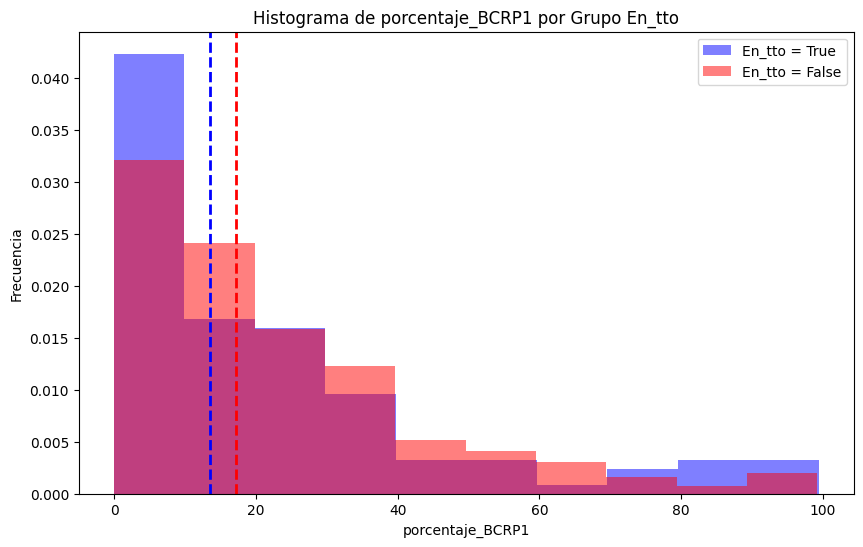

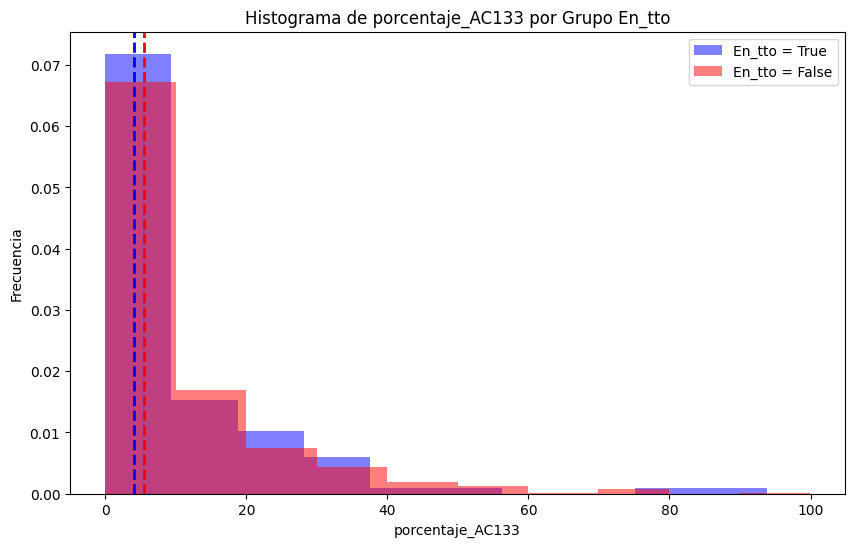

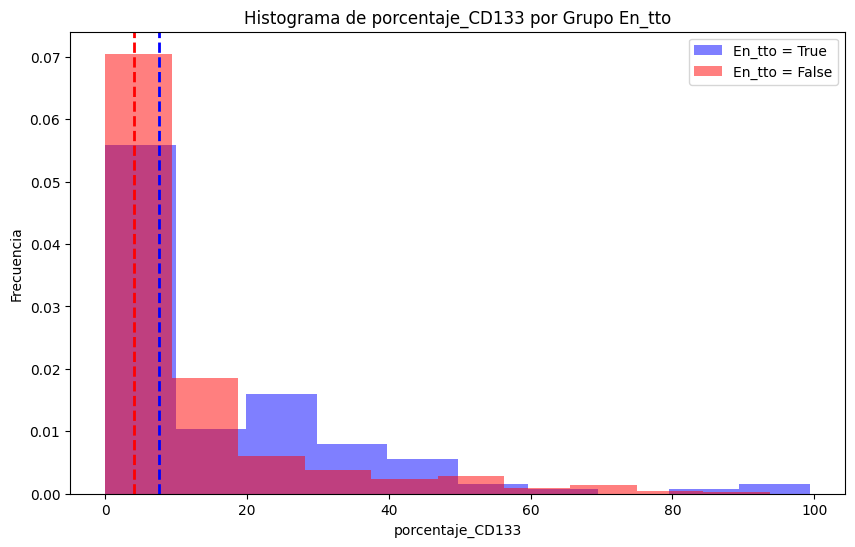

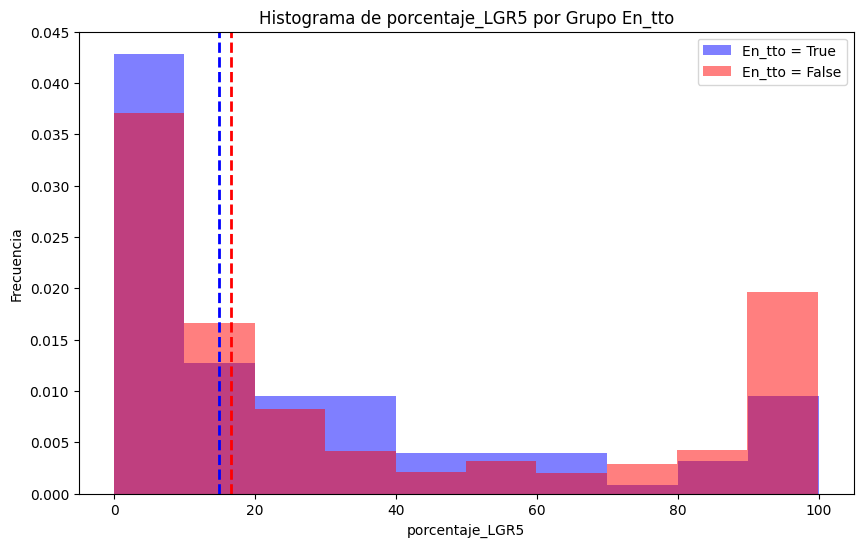

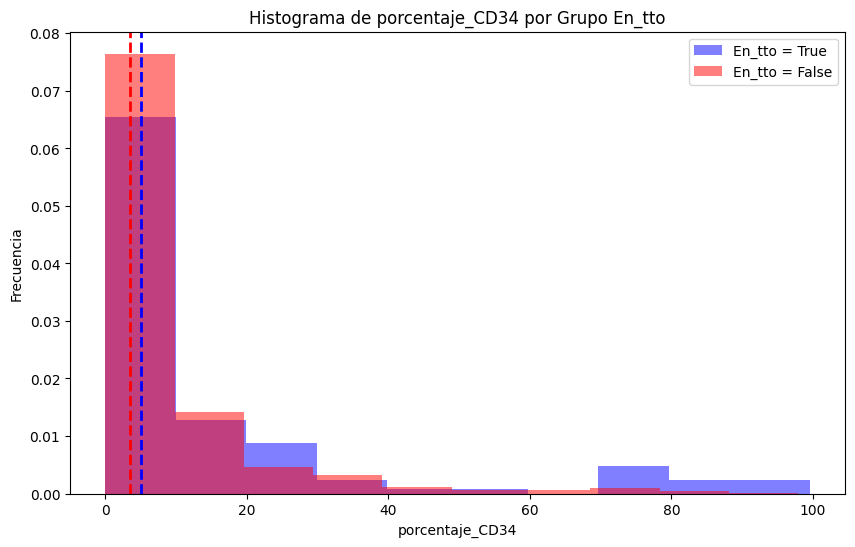

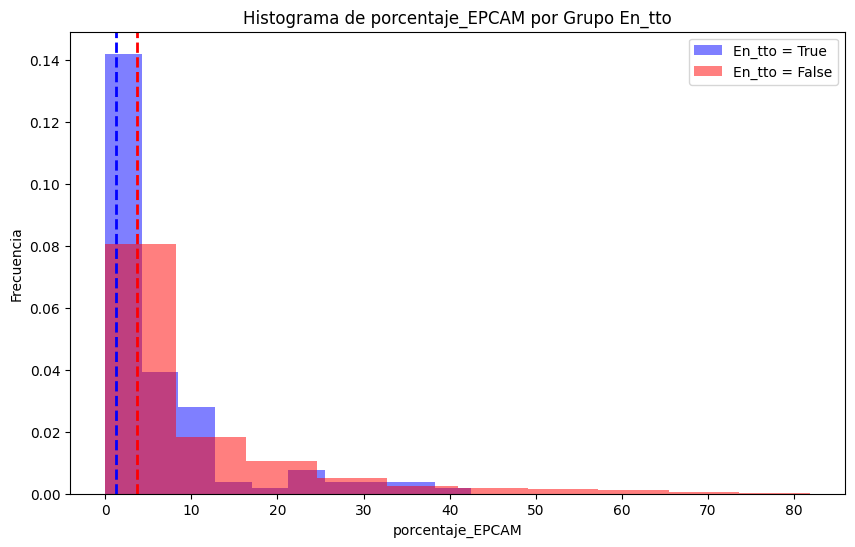

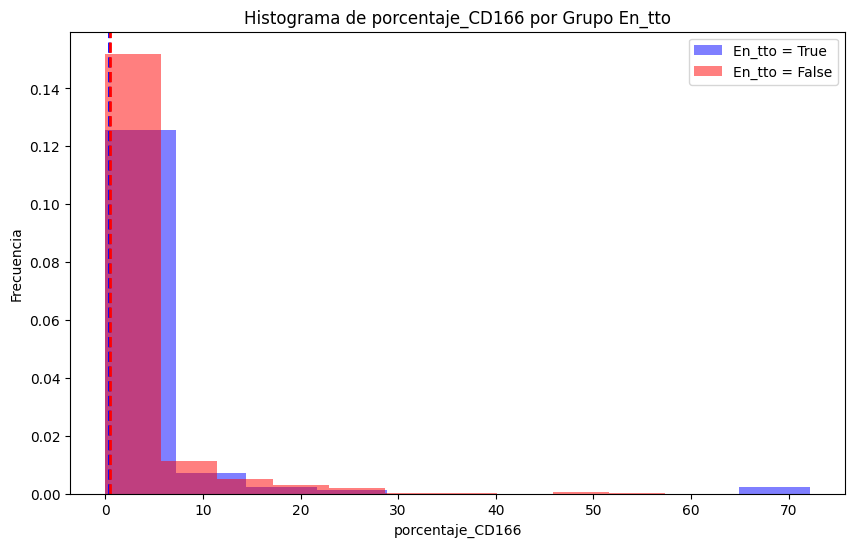

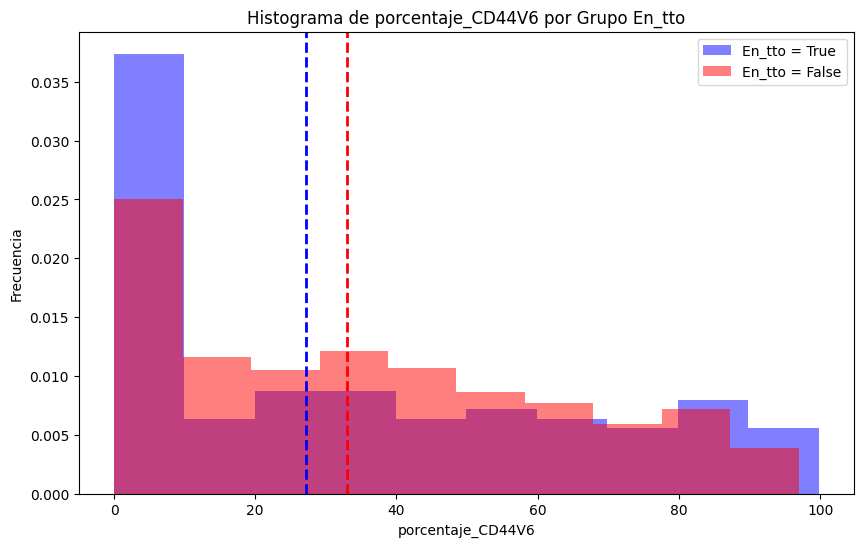

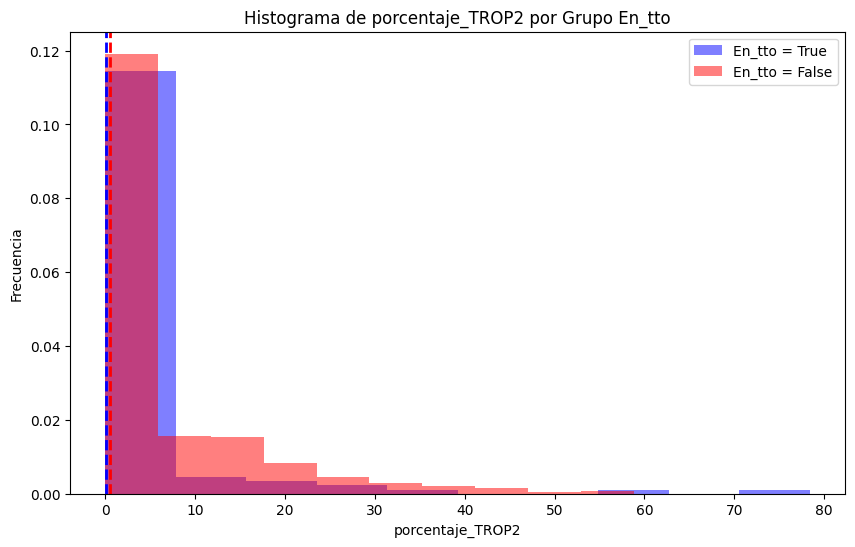

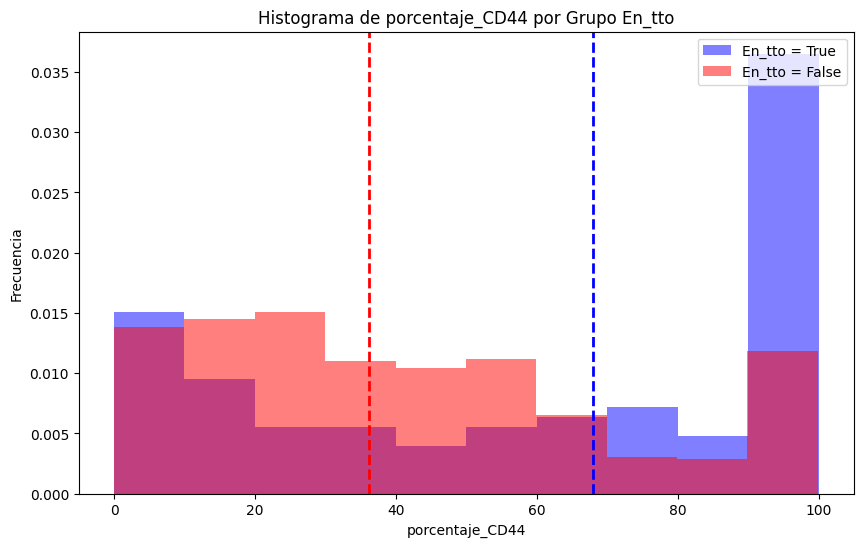

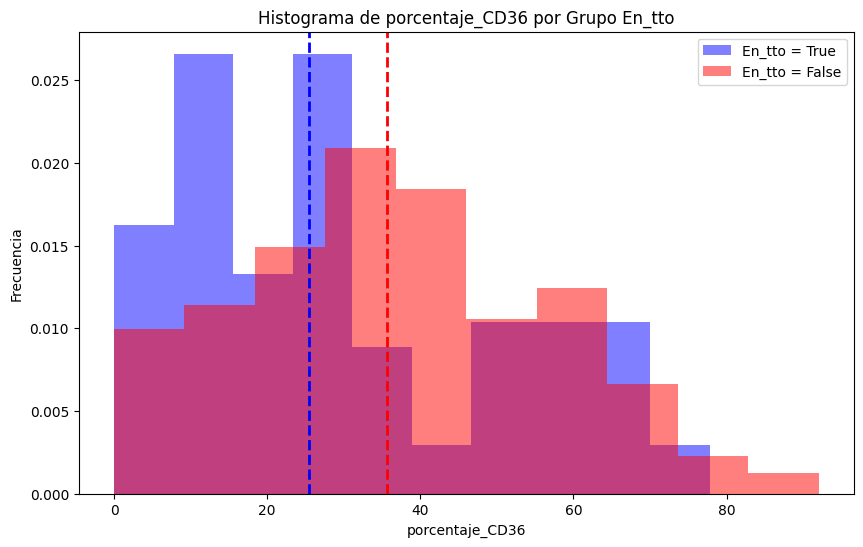

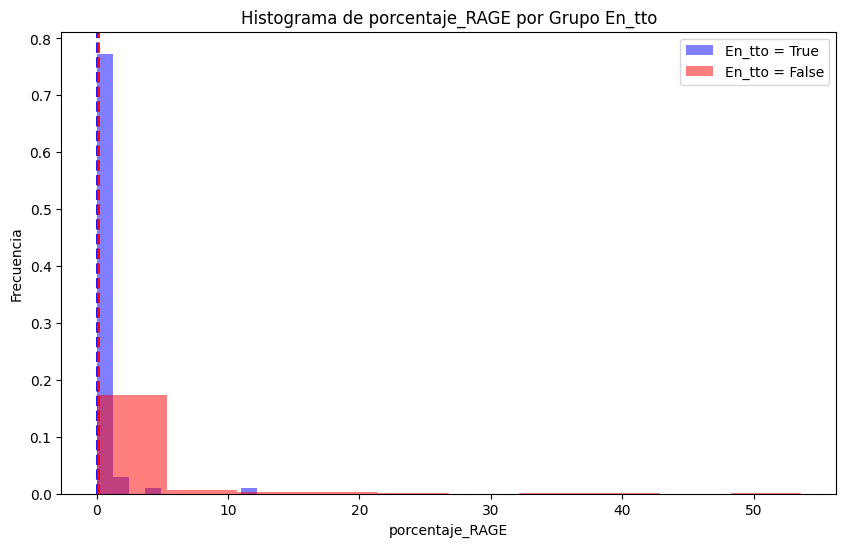

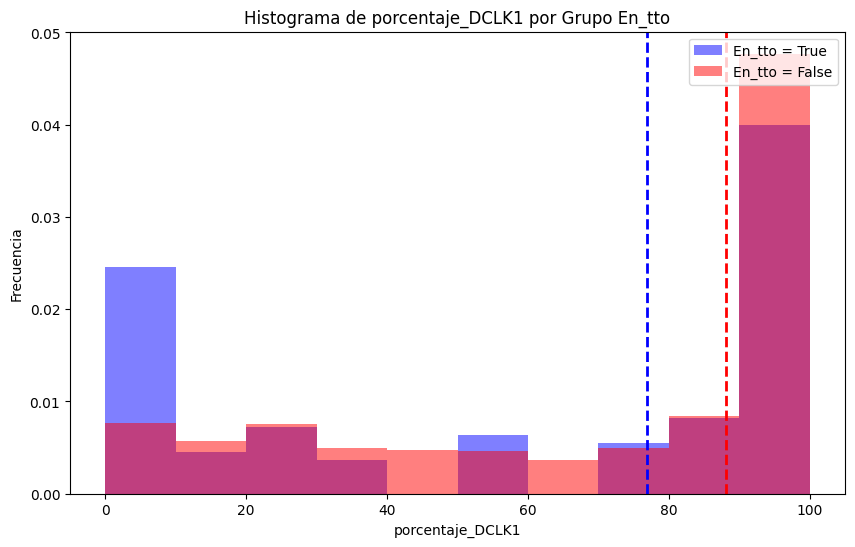

In [115]:
# crear un histograma con los datos de porcentaje_marcadores definidos en una lista de columnas para los dos grupos en la columna En_tto true/false

# Create a histogram for the specified columns for the two groups in 'En_tto' (True/False)
porcentaje_marcadores = ['porcentaje_BCRP1', 'porcentaje_AC133', 'porcentaje_CD133','porcentaje_LGR5', 'porcentaje_CD34', 'porcentaje_EPCAM', 'porcentaje_CD166', 'porcentaje_CD44V6','porcentaje_TROP2', 'porcentaje_CD44', 'porcentaje_CD36','porcentaje_RAGE', 'porcentaje_DCLK1']  # Replace with your actual column names

medianas = []

for marcador in porcentaje_marcadores:
  plt.figure(figsize=(10, 6))

  # Filter data for 'En_tto' == True
  df_true = dfdata_hist7[dfdata_hist7['En_tto'] == 'True']
  df_true_clean = df_true[marcador].dropna()

  median_value_true = np.median(df_true_clean)
  count_true = len(df_true_clean)

  plt.hist(df_true[marcador], bins=10, alpha=0.5, color= 'blue', label='En_tto = True', density=True)
  plt.axvline(median_value_true, color='blue', linestyle='dashed', linewidth=2)


  # Filter data for 'En_tto' == False
  df_false = dfdata_hist7[dfdata_hist7['En_tto'] == 'False']
  df_false_clean = df_false[marcador].dropna()

  median_value_false = np.median(df_false_clean)
  count_false = len(df_false_clean)

  plt.hist(df_false[marcador], bins=10, alpha=0.5, color= 'red', label='En_tto = False', density=True)
  plt.axvline(median_value_false, color='red', linestyle='dashed', linewidth=2)

  medianas.append({
        'Biomarcador': marcador,
        'Mediana_En_tto_True': median_value_true,
        'Cuenta_En_tto_True': count_true,
        'Mediana_En_tto_False': median_value_false,
        'Cuenta_En_tto_False': count_false
   })

  df_medianas = pd.DataFrame(medianas)


  df_medianas.to_excel('medianas_biomarcadores_tto_vs_notto.xlsx', index=False)

  plt.xlabel(marcador)
  plt.ylabel('Frecuencia')
  plt.title(f'Histograma de {marcador} por Grupo En_tto')
  plt.legend(loc='upper right')
  plt.show()


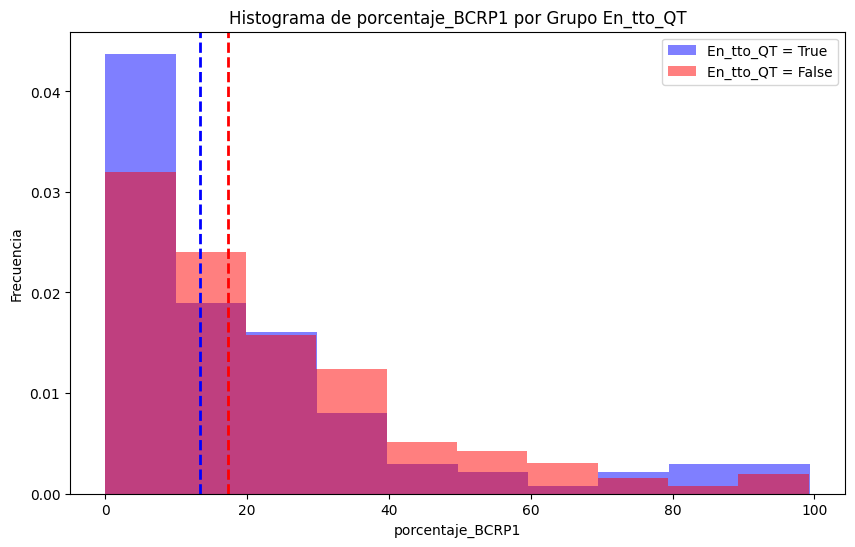

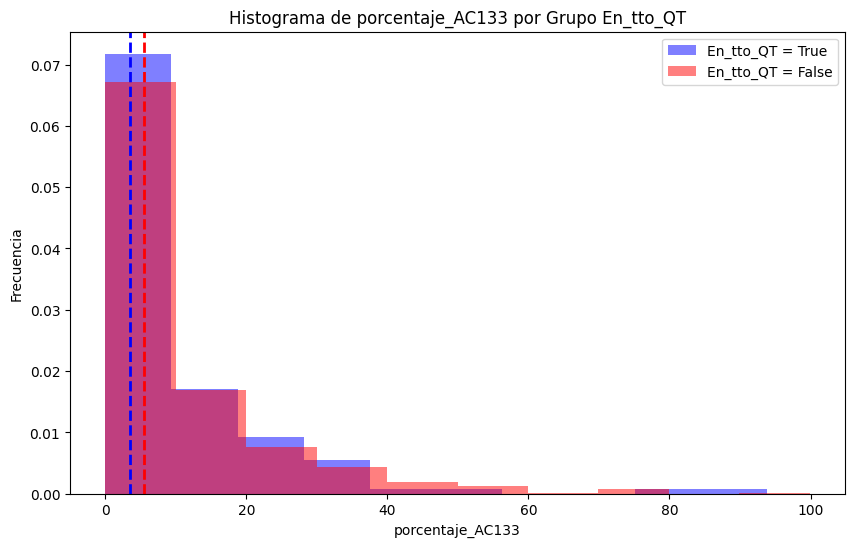

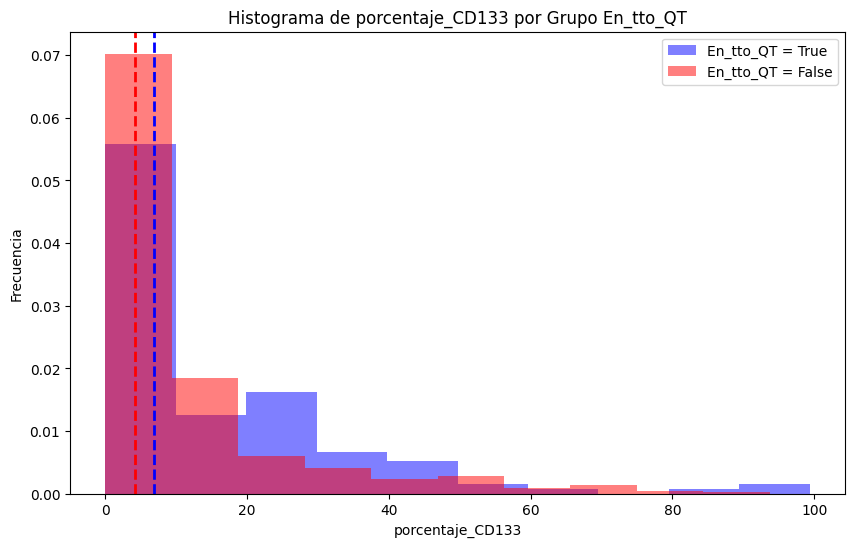

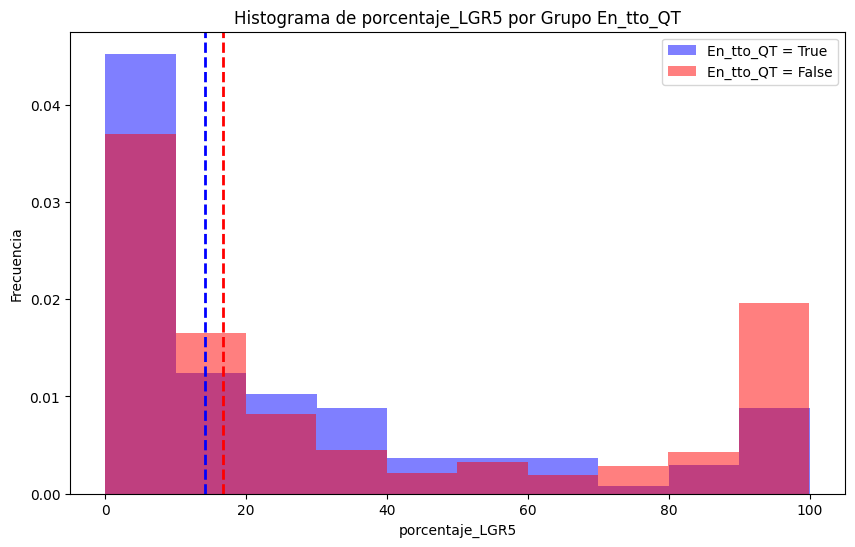

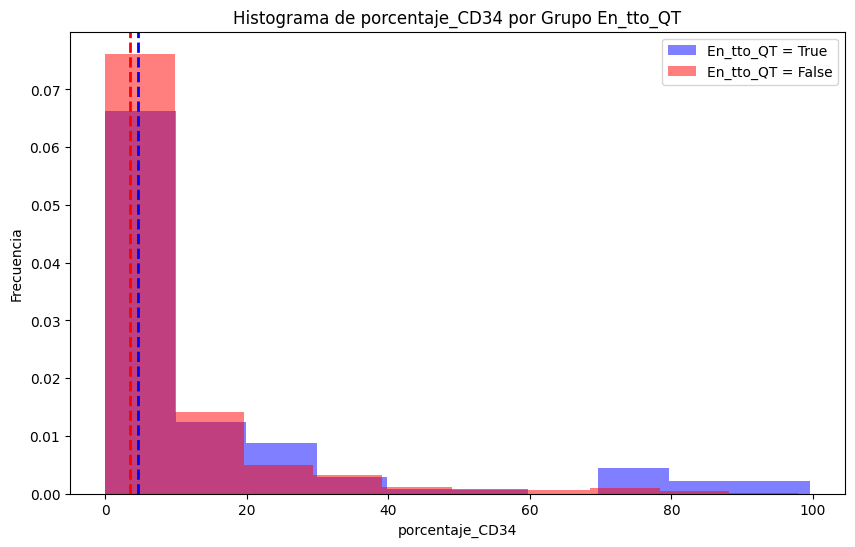

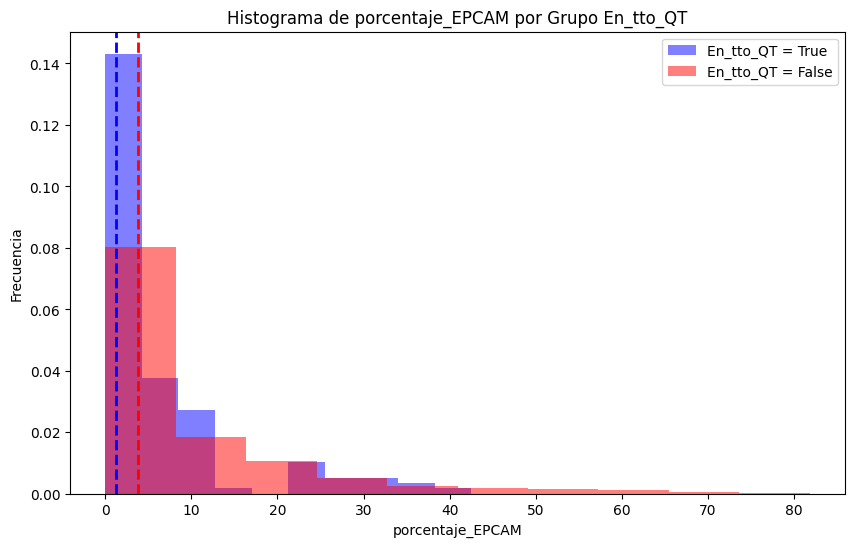

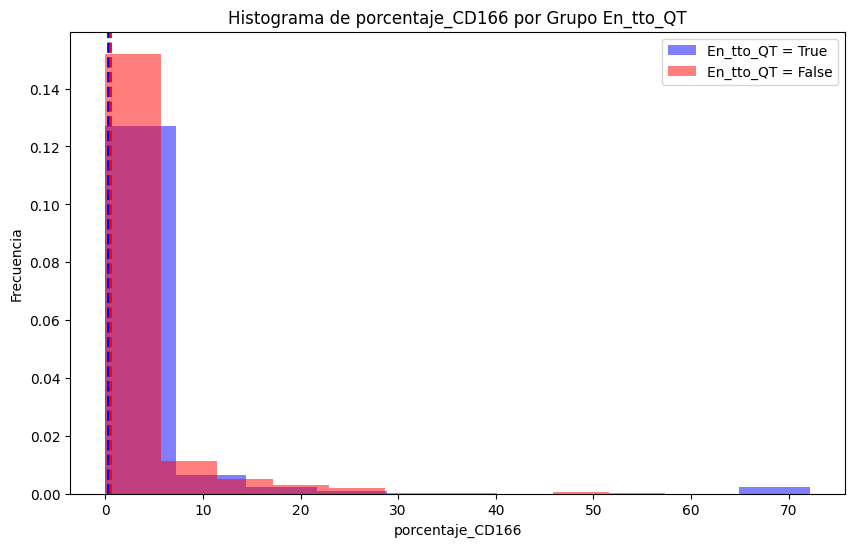

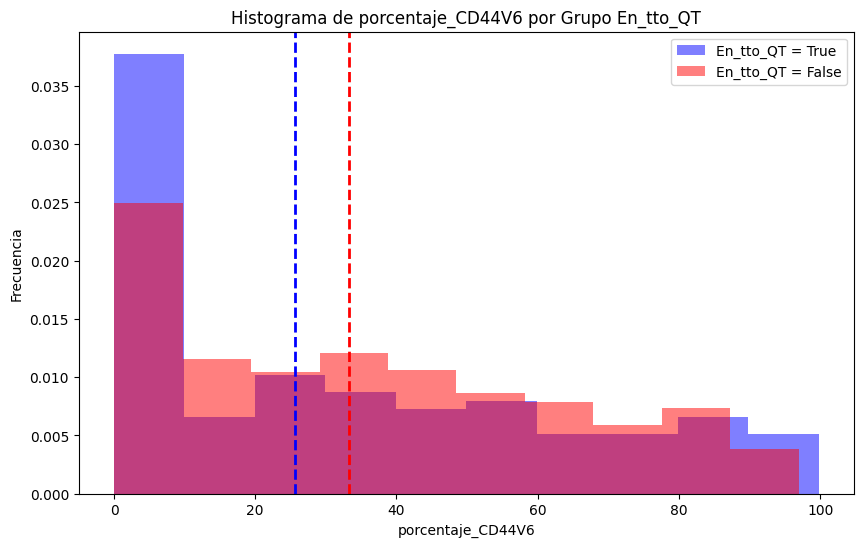

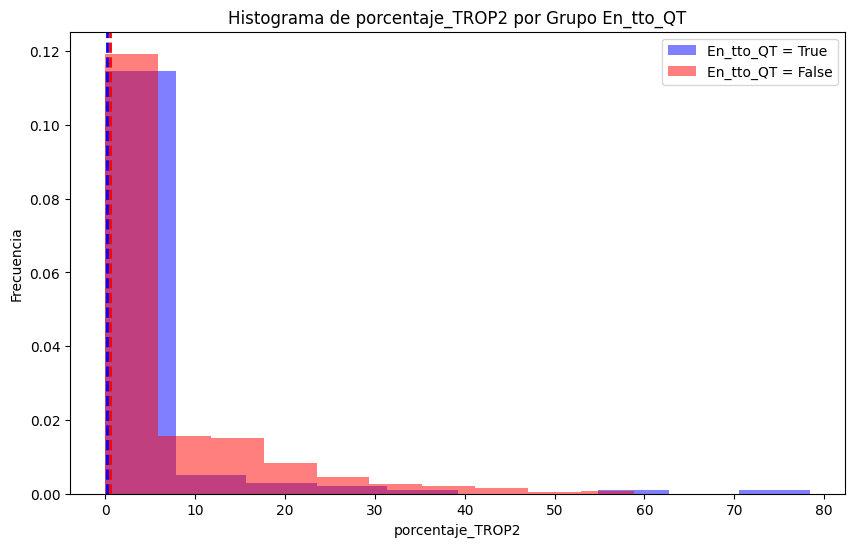

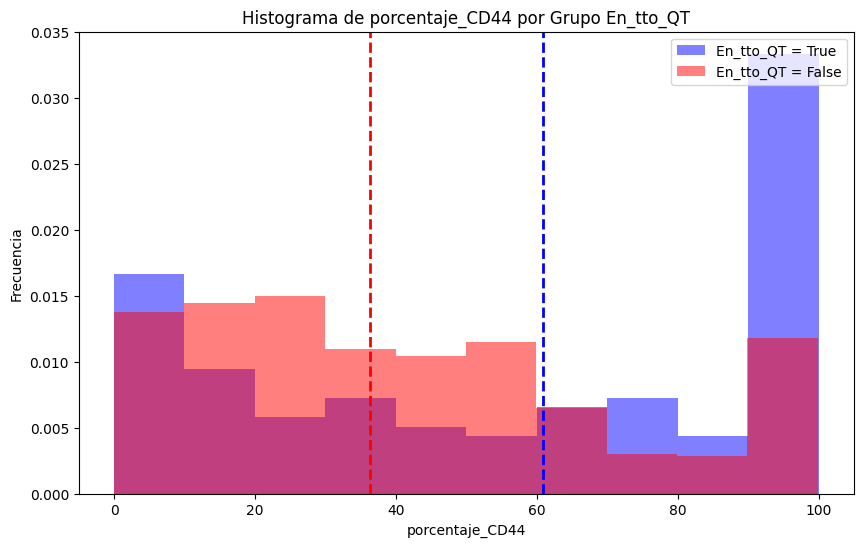

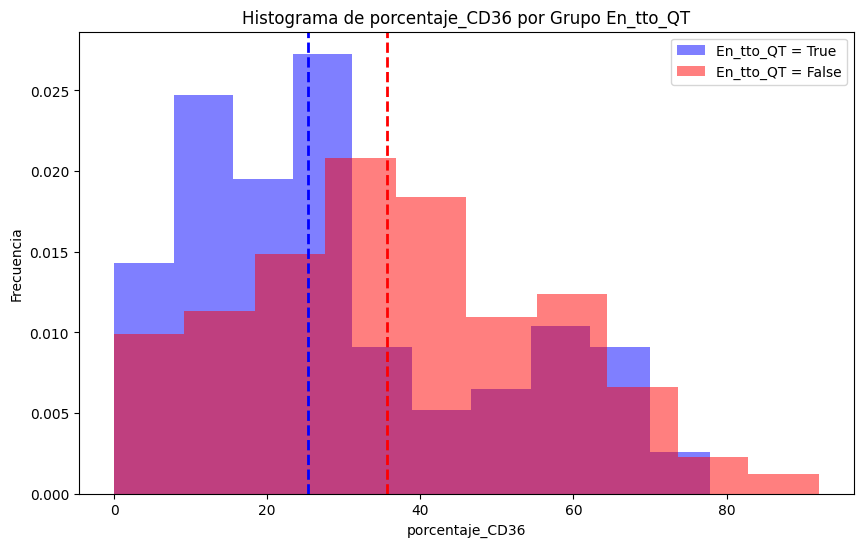

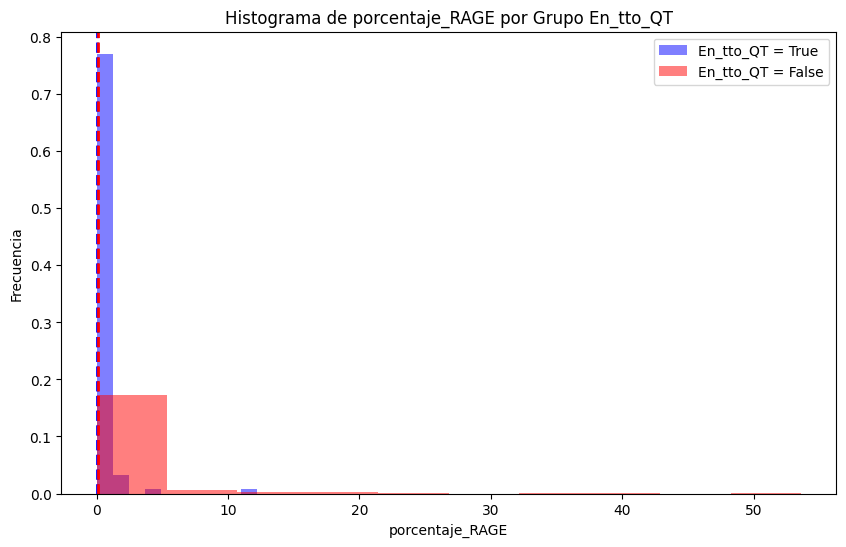

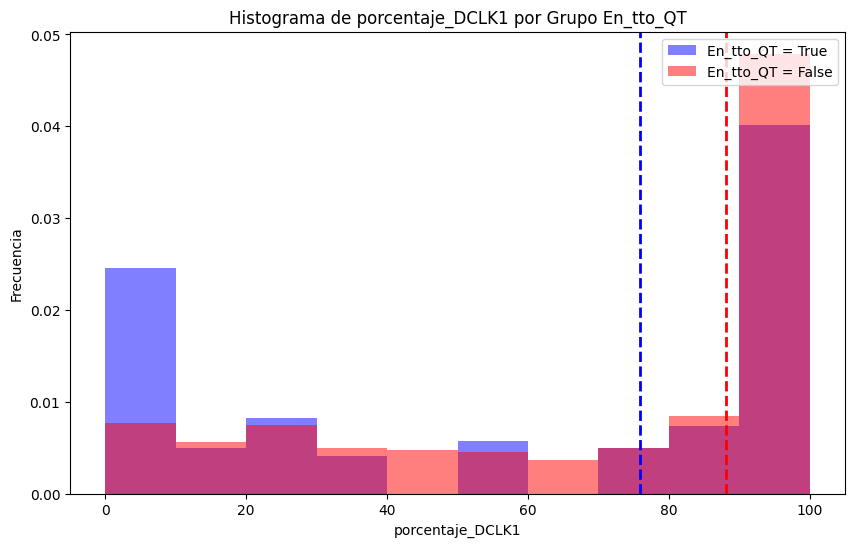

In [106]:
# crear un histograma con los datos de porcentaje_marcadores definidos en una lista de columnas para los dos grupos en la columna En_tto_QT true/false

# Create a histogram for the specified columns for the two groups in 'En_tto' (True/False)
porcentaje_marcadores = ['porcentaje_BCRP1', 'porcentaje_AC133', 'porcentaje_CD133','porcentaje_LGR5', 'porcentaje_CD34', 'porcentaje_EPCAM', 'porcentaje_CD166', 'porcentaje_CD44V6','porcentaje_TROP2', 'porcentaje_CD44', 'porcentaje_CD36','porcentaje_RAGE', 'porcentaje_DCLK1']  # Replace with your actual column names

for marcador in porcentaje_marcadores:
  plt.figure(figsize=(10, 6))

  # Filter data for 'En_tto' == True
  df_true = dfdata_hist7[dfdata_hist7['En_tto_QT'] == 'True']
  plt.hist(df_true[marcador], bins=10, alpha=0.5, color= 'blue', label='En_tto_QT = True', density=True)
  median_value1 = np.median(df_true[marcador].dropna())
  plt.axvline(median_value1, color='blue', linestyle='dashed', linewidth=2)

  # Filter data for 'En_tto' == False
  df_false = dfdata_hist7[dfdata_hist7['En_tto_QT'] == 'False']
  plt.hist(df_false[marcador], bins=10, alpha=0.5, color= 'red', label='En_tto_QT = False', density=True)
  median_value2 = np.median(df_false[marcador].dropna())
  plt.axvline(median_value2, color='red', linestyle='dashed', linewidth=2)

  plt.xlabel(marcador)
  plt.ylabel('Frecuencia')
  plt.title(f'Histograma de {marcador} por Grupo En_tto_QT')
  plt.legend(loc='upper right')
  plt.show()

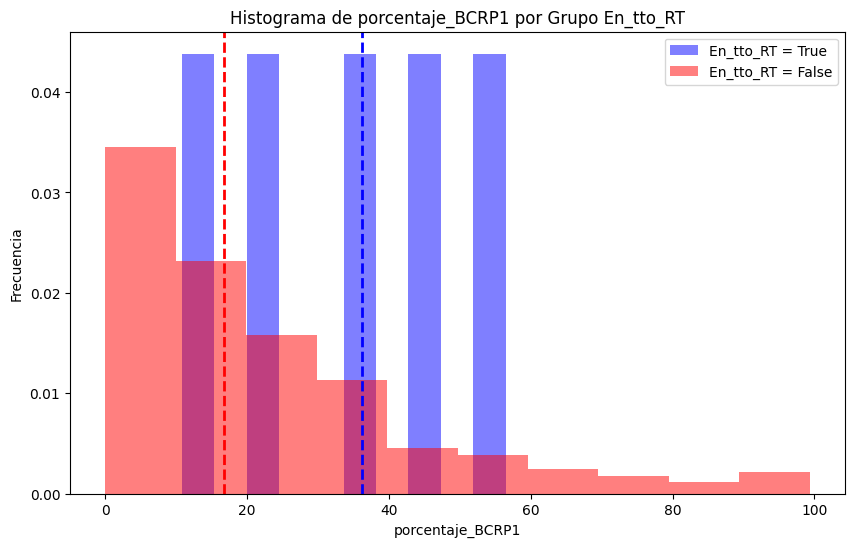

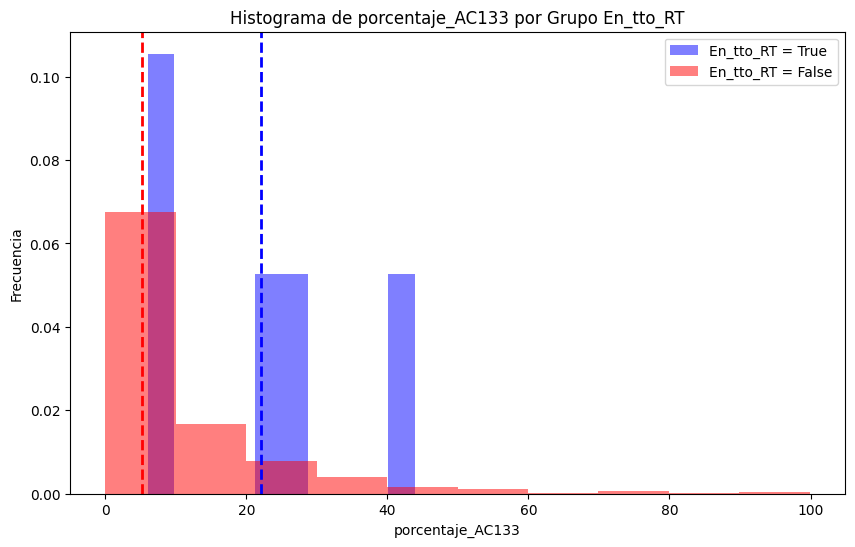

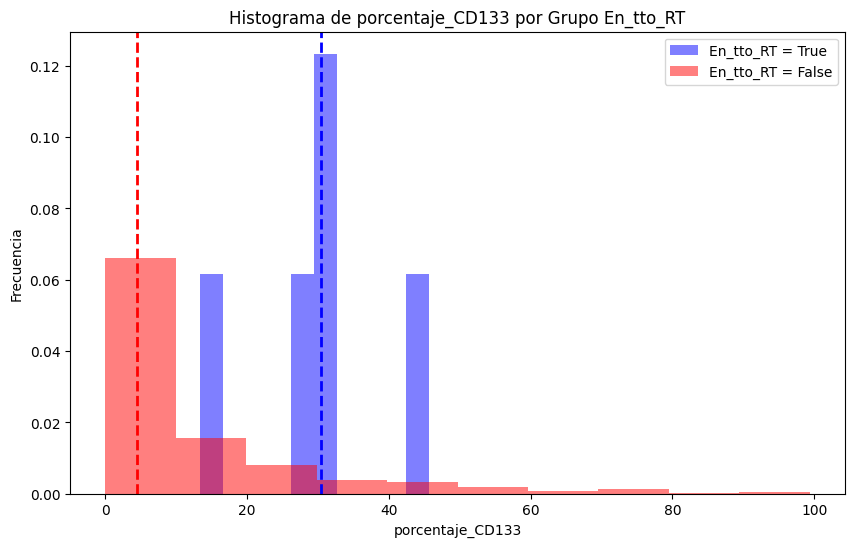

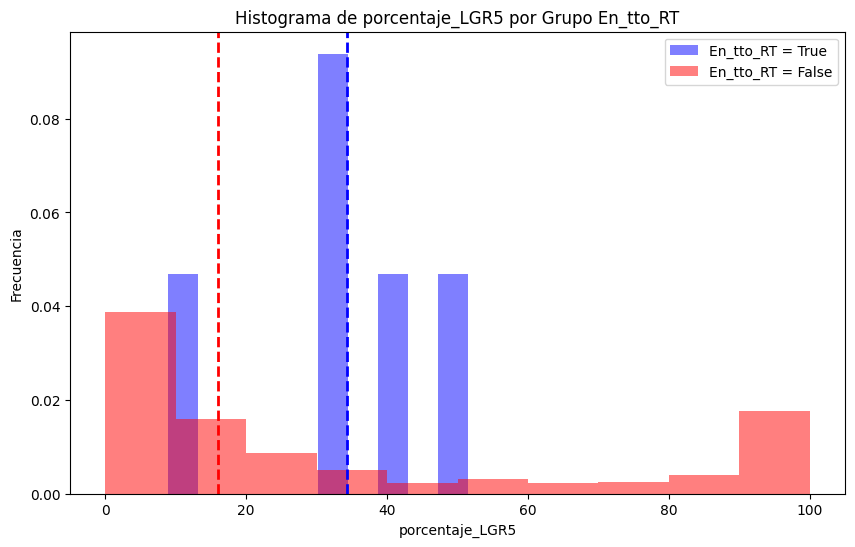

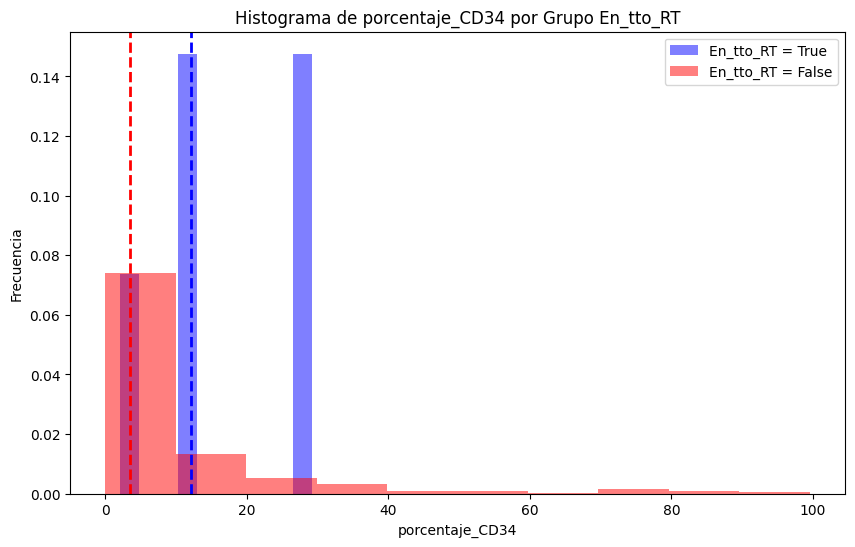

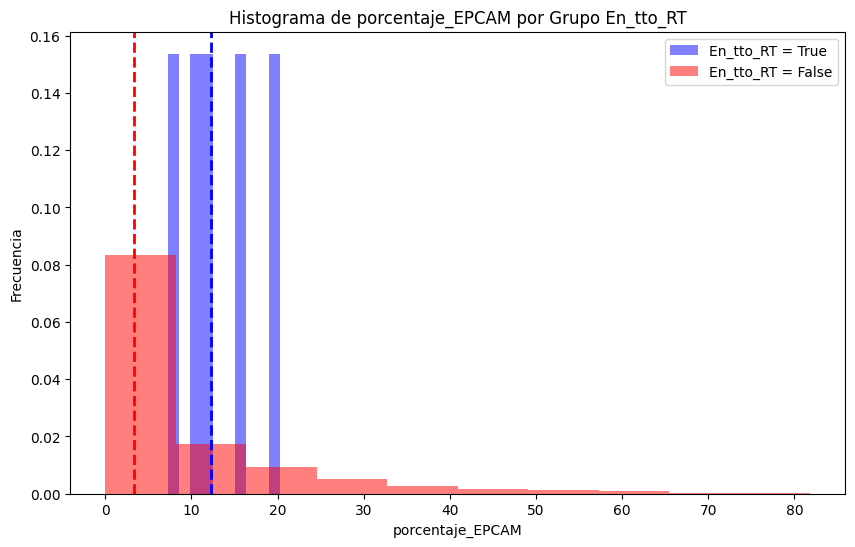

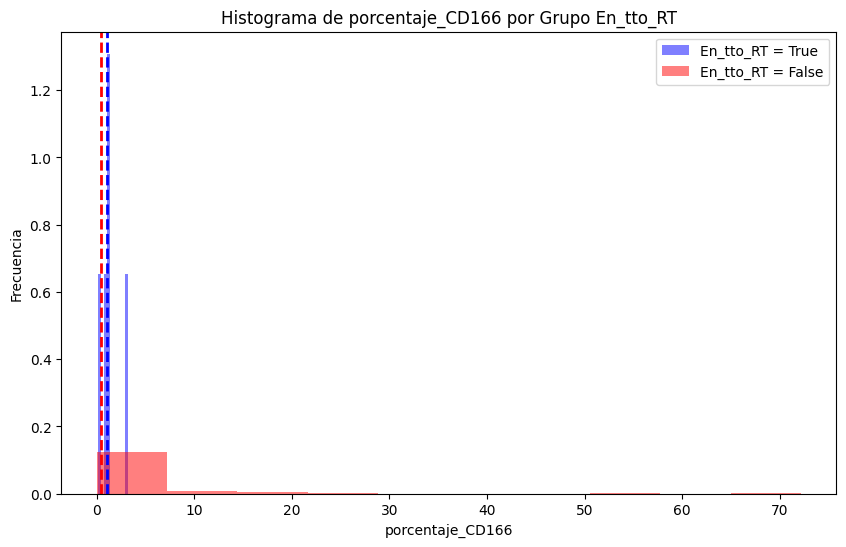

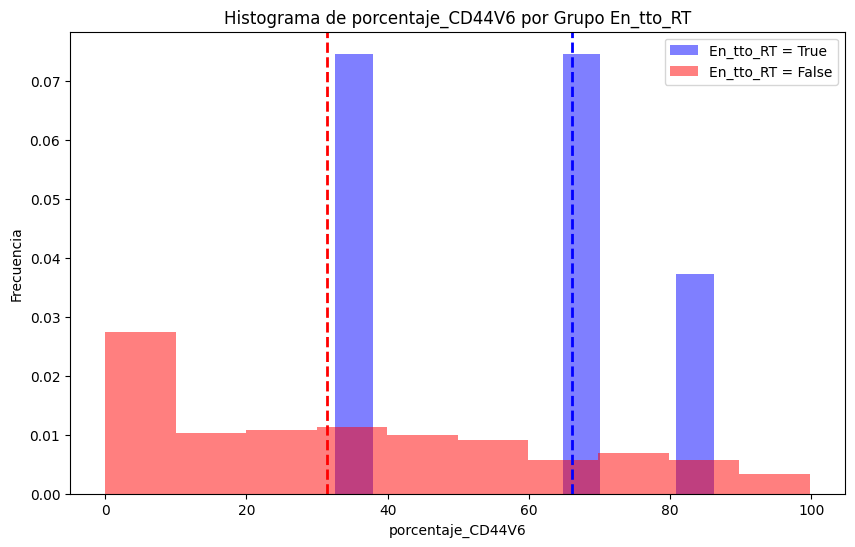

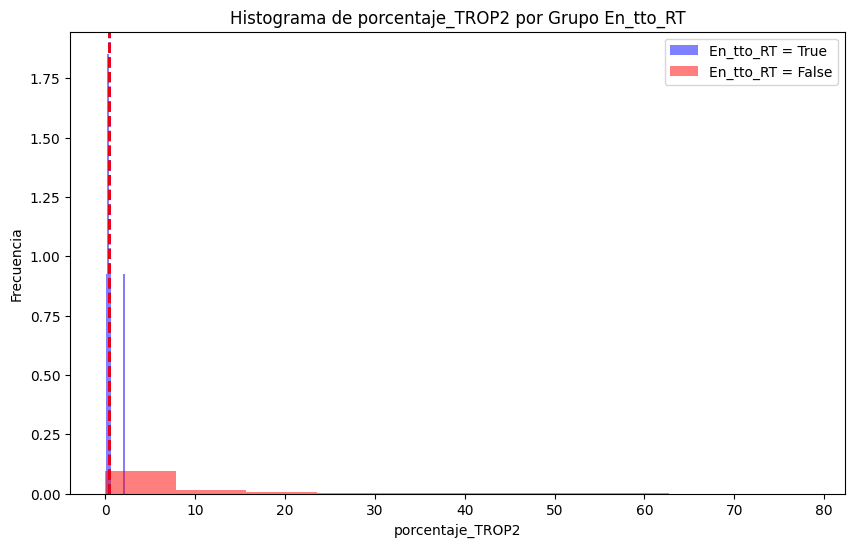

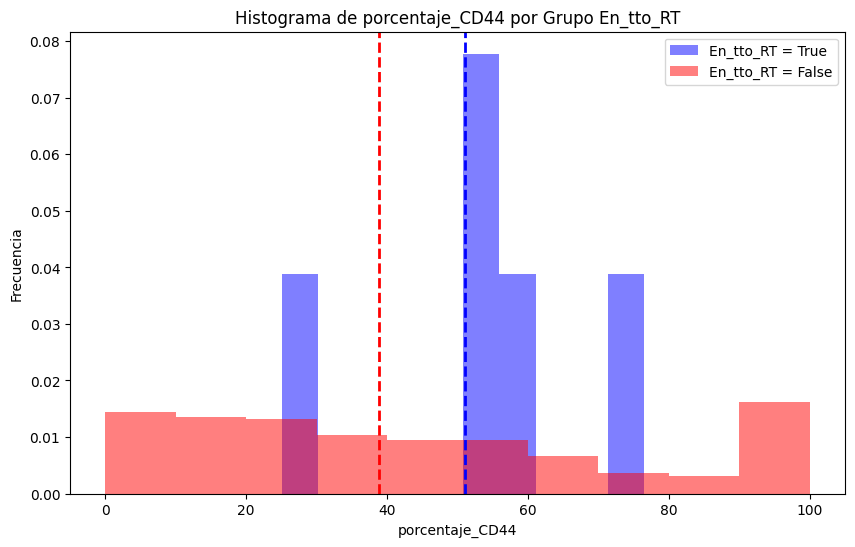

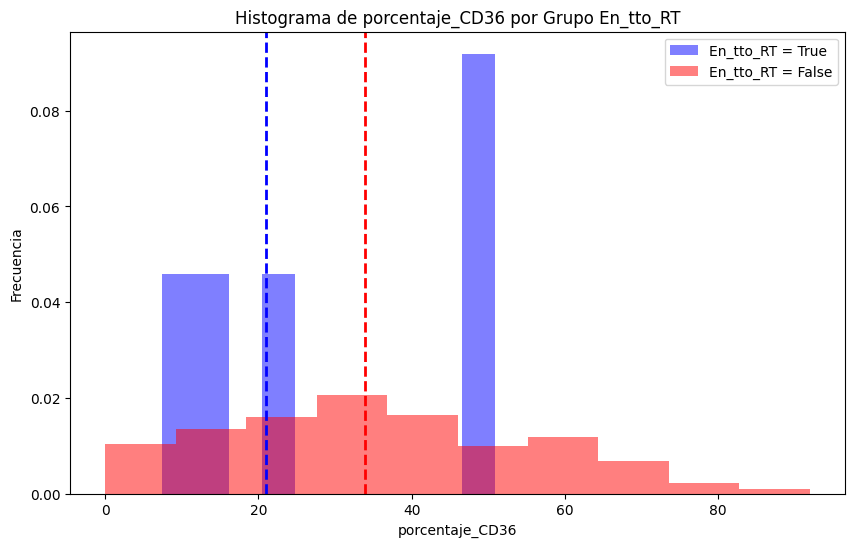

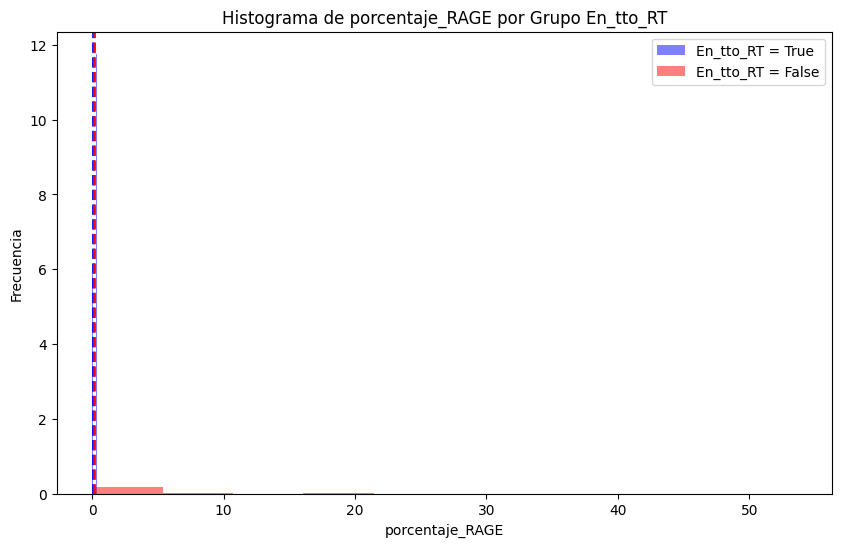

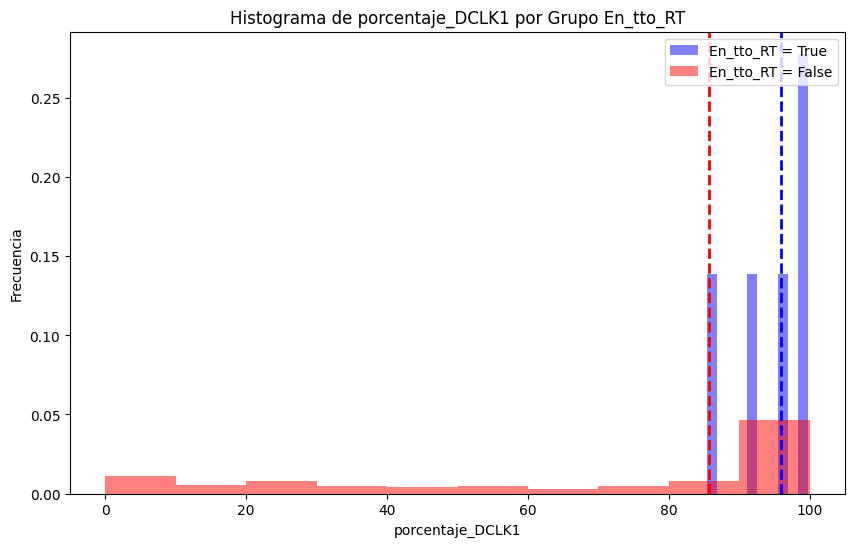

In [105]:
# crear un histograma con los datos de porcentaje_marcadores definidos en una lista de columnas para los dos grupos en la columna En_tto_RT true/false

# Create a histogram for the specified columns for the two groups in 'En_tto' (True/False)
porcentaje_marcadores = ['porcentaje_BCRP1', 'porcentaje_AC133', 'porcentaje_CD133','porcentaje_LGR5', 'porcentaje_CD34', 'porcentaje_EPCAM', 'porcentaje_CD166', 'porcentaje_CD44V6','porcentaje_TROP2', 'porcentaje_CD44', 'porcentaje_CD36','porcentaje_RAGE', 'porcentaje_DCLK1']  # Replace with your actual column names

for marcador in porcentaje_marcadores:
  plt.figure(figsize=(10, 6))

  # Filter data for 'En_tto' == True
  df_true = dfdata_hist7[dfdata_hist7['En_tto_RT'] == 'True']
  plt.hist(df_true[marcador], bins=10, alpha=0.5, color= 'blue', label='En_tto_RT = True', density=True)
  median_value1 = np.median(df_true[marcador].dropna())
  plt.axvline(median_value1, color='blue', linestyle='dashed', linewidth=2)

  # Filter data for 'En_tto' == False
  df_false = dfdata_hist7[dfdata_hist7['En_tto_RT'] == 'False']
  plt.hist(df_false[marcador], bins=10, alpha=0.5, color= 'red', label='En_tto_RT = False', density=True)
  median_value2 = np.median(df_false[marcador].dropna())
  plt.axvline(median_value2, color='red', linestyle='dashed', linewidth=2)

  plt.xlabel(marcador)
  plt.ylabel('Frecuencia')
  plt.title(f'Histograma de {marcador} por Grupo En_tto_RT')
  plt.legend(loc='upper right')
  plt.show()

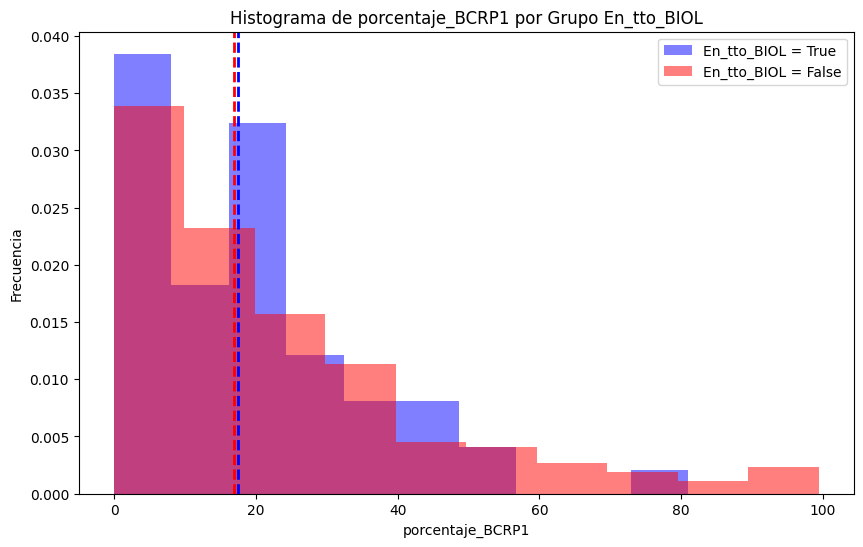

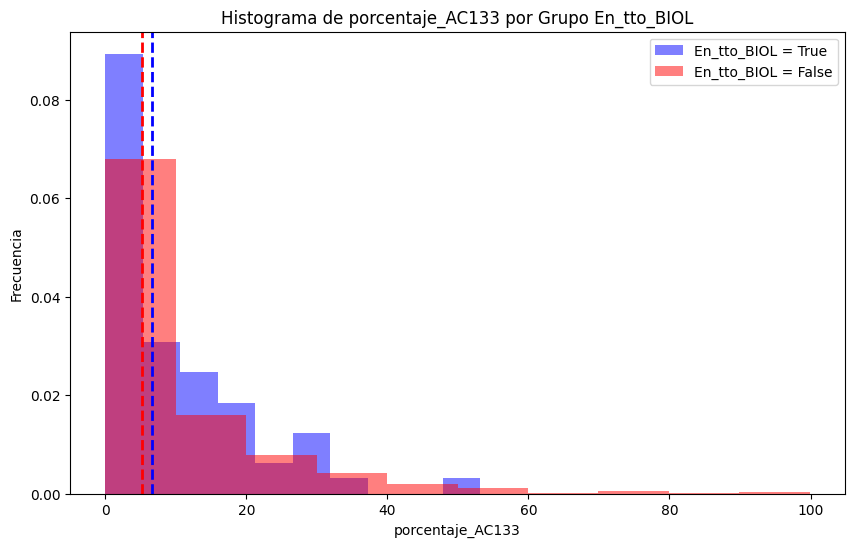

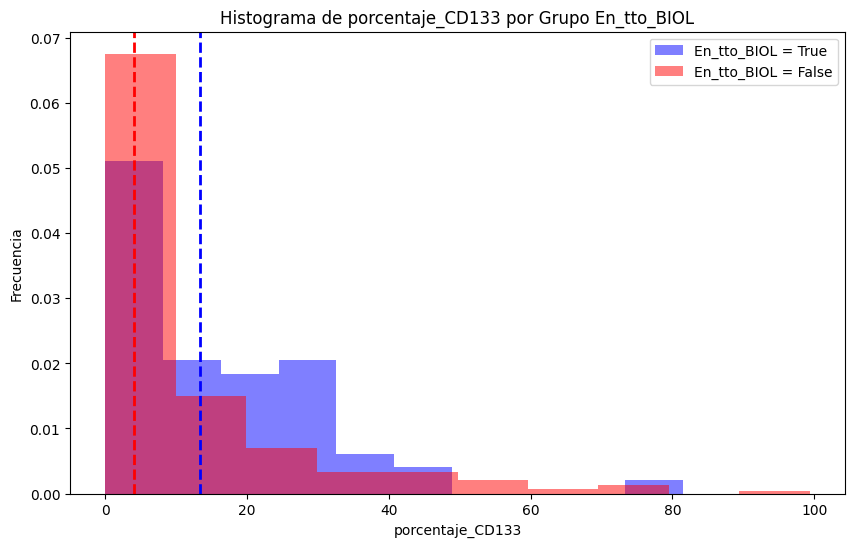

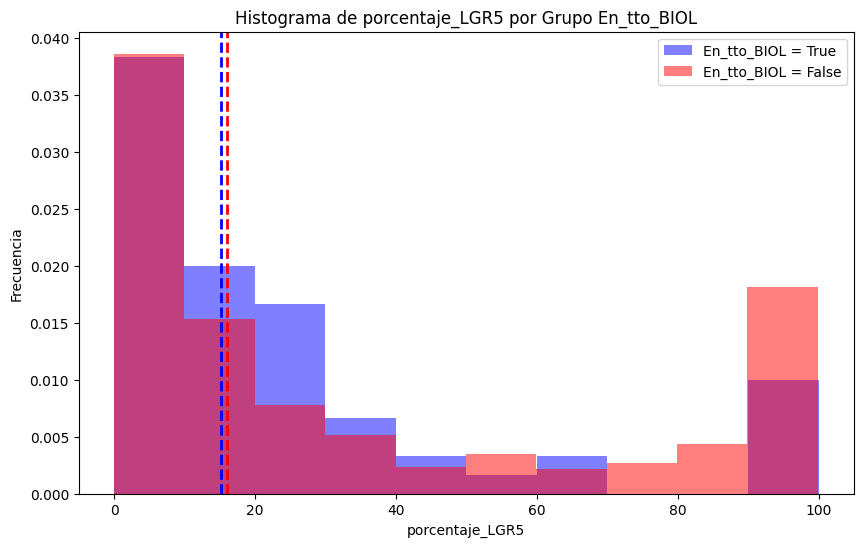

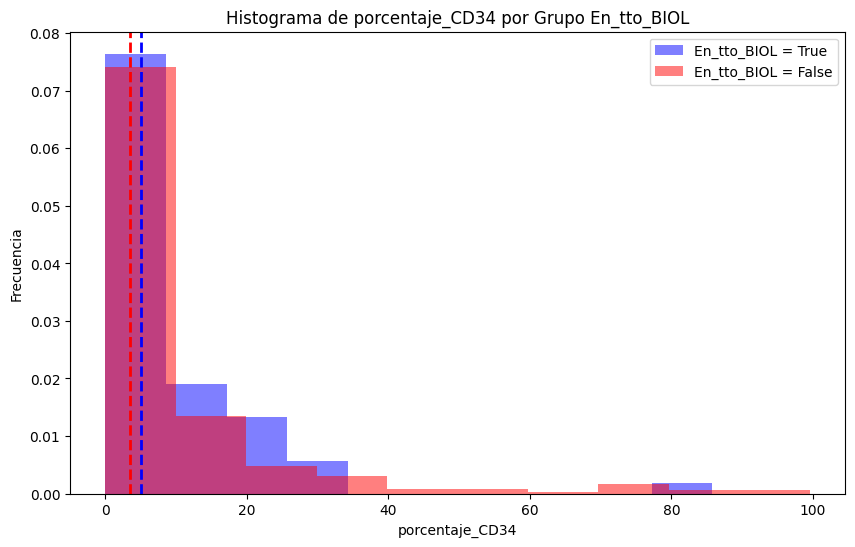

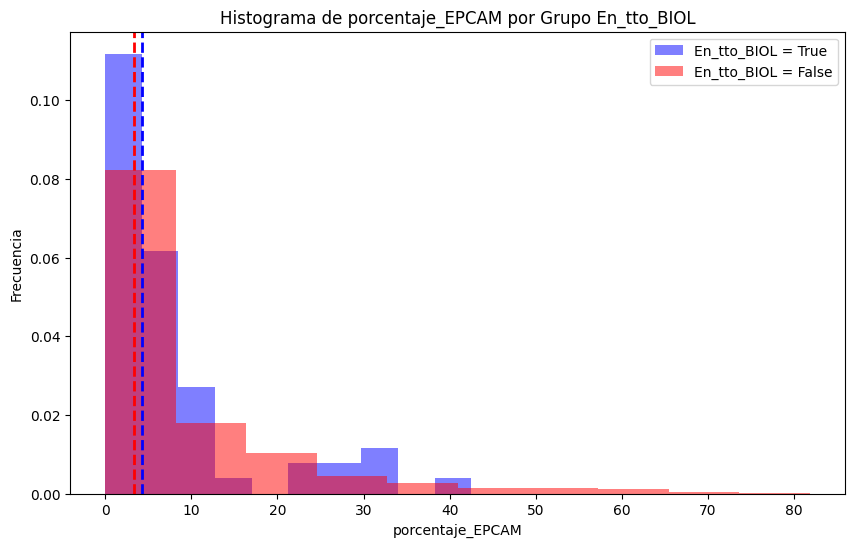

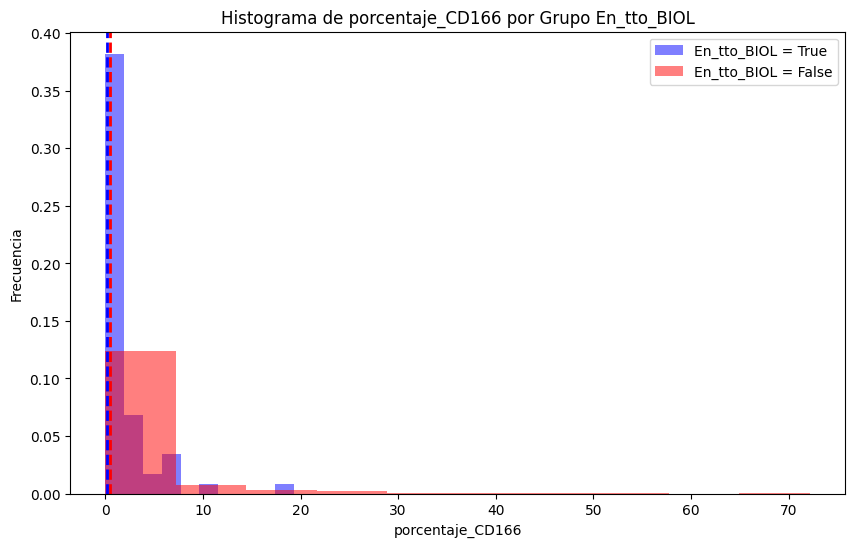

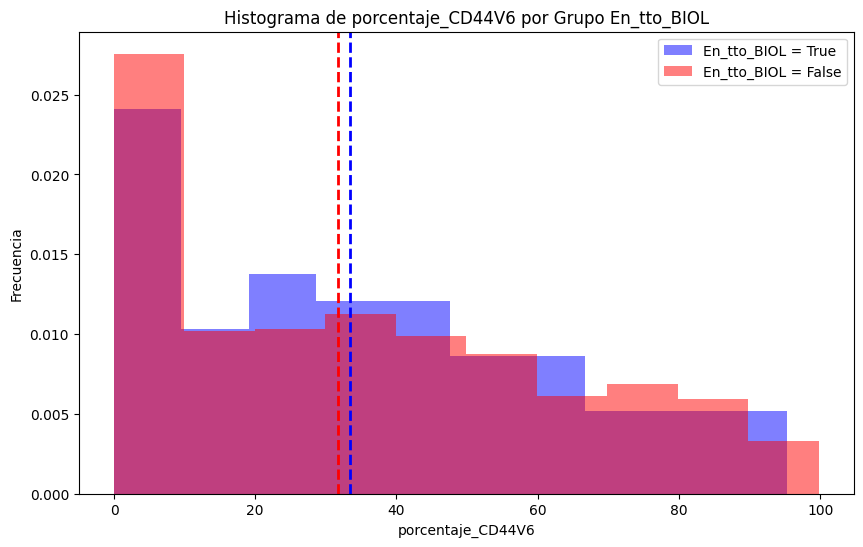

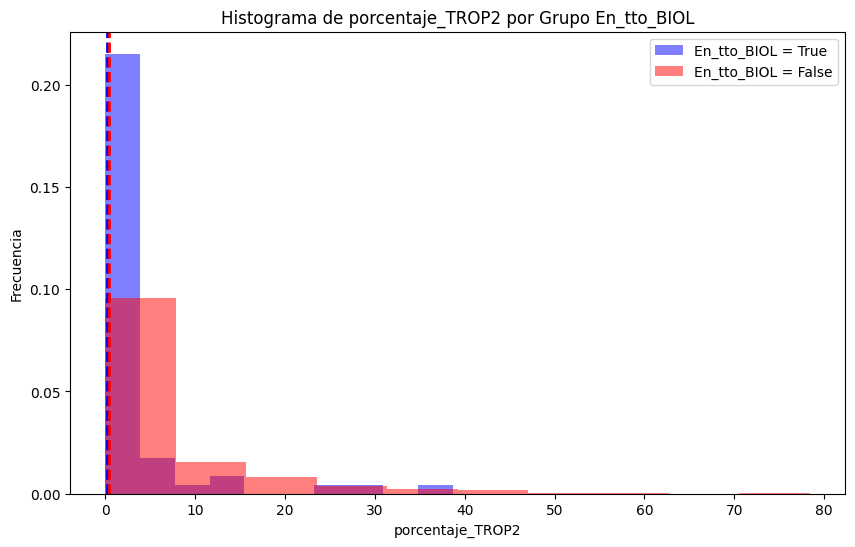

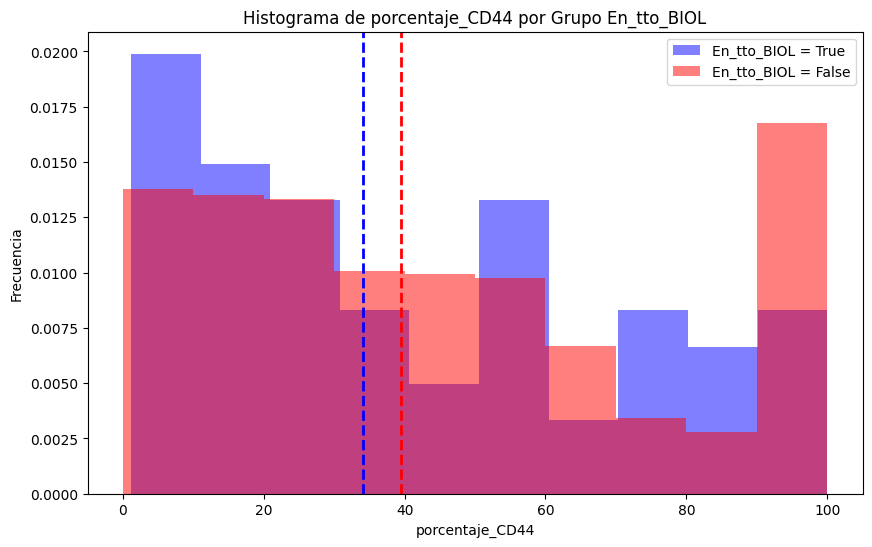

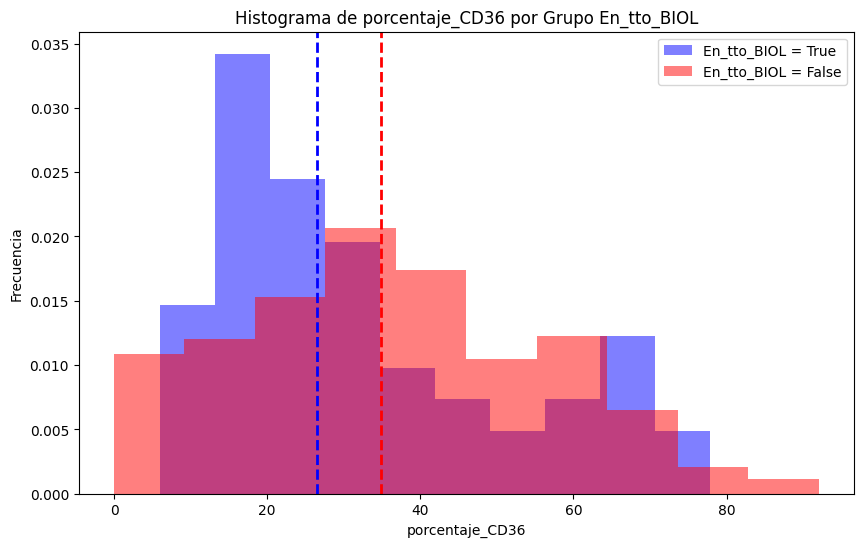

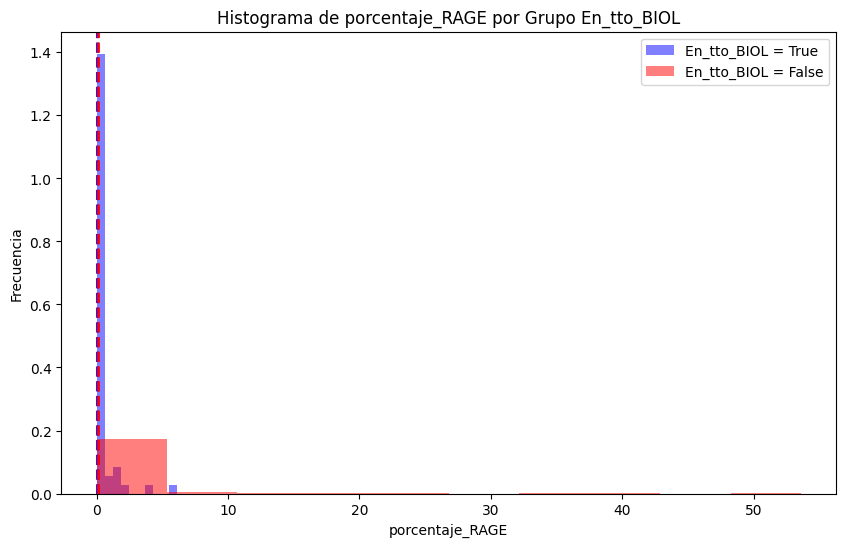

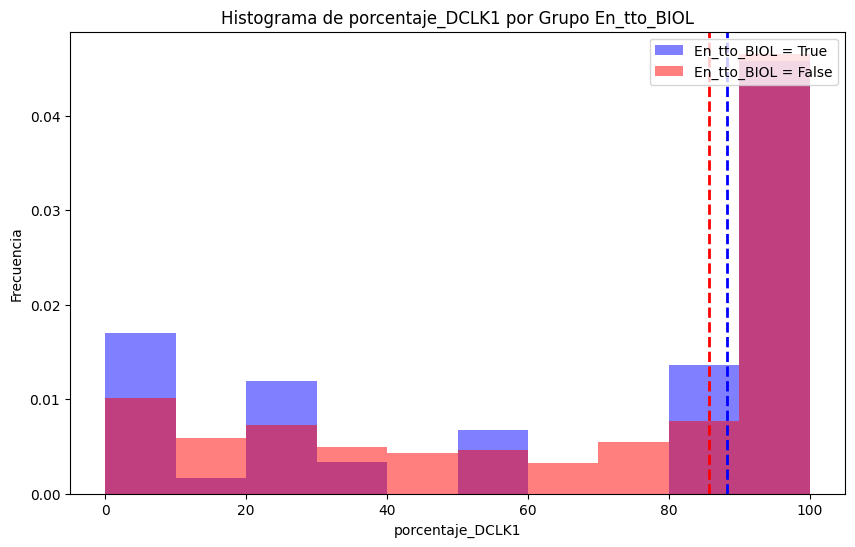

In [104]:
# crear un histograma con los datos de porcentaje_marcadores definidos en una lista de columnas para los dos grupos en la columna En_tto_BIOL true/false

# Create a histogram for the specified columns for the two groups in 'En_tto' (True/False)
porcentaje_marcadores = ['porcentaje_BCRP1', 'porcentaje_AC133', 'porcentaje_CD133','porcentaje_LGR5', 'porcentaje_CD34', 'porcentaje_EPCAM', 'porcentaje_CD166', 'porcentaje_CD44V6','porcentaje_TROP2', 'porcentaje_CD44', 'porcentaje_CD36','porcentaje_RAGE', 'porcentaje_DCLK1']  # Replace with your actual column names

for marcador in porcentaje_marcadores:
  plt.figure(figsize=(10, 6))

  # Filter data for 'En_tto' == True
  df_true = dfdata_hist7[dfdata_hist7['En_tto_BIOL'] == 'True']
  plt.hist(df_true[marcador], bins=10, alpha=0.5, color= 'blue', label='En_tto_BIOL = True', density=True)
  median_value1 = np.median(df_true[marcador].dropna())
  plt.axvline(median_value1, color='blue', linestyle='dashed', linewidth=2)

  # Filter data for 'En_tto' == False
  df_false = dfdata_hist7[dfdata_hist7['En_tto_BIOL'] == 'False']
  plt.hist(df_false[marcador], bins=10, alpha=0.5, color= 'red', label='En_tto_BIOL = False', density=True)
  median_value2 = np.median(df_false[marcador].dropna())
  plt.axvline(median_value2, color='red', linestyle='dashed', linewidth=2)

  plt.xlabel(marcador)
  plt.ylabel('Frecuencia')
  plt.title(f'Histograma de {marcador} por Grupo En_tto_BIOL')
  plt.legend(loc='upper right')
  plt.show()